In [1]:
import pandas as pd
import numpy as np
from functools import reduce
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import pylab as pl


# Data Import

In [2]:
australia = pd.read_csv("australia_scraped.csv", delimiter = '|')
belgium = pd.read_csv("belgium_scraped.csv", delimiter = '|')
dutch = pd.read_csv("dutch_scraped.csv", delimiter = '|')
korea = pd.read_csv("korea_scraped.csv", delimiter = '|')
EFL_d2 = pd.read_csv("men's efl_div2.csv")
euros = pd.read_csv("men's euros.csv")
liga = pd.read_csv("men's liga mx.csv")
mls = pd.read_csv("men's mls.csv")
wc = pd.read_csv("men's wc.csv")
nwsl = pd.read_csv("NWSL.csv")
russia = pd.read_csv("russia_scraped.csv", delimiter = '|')
sl = pd.read_csv("Super_League.csv")
w_cl = pd.read_csv("UEFA_womens_CL.csv")
w_euros = pd.read_csv("UEFA_womens_Euro.csv")


D:\Justin\anapy\lib\site-packages\IPython\core\interactiveshell.py:3146: DtypeWarning: Columns (146) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
ligue = pd.read_csv("Ligue1.csv")
pl = pd.read_csv("Premier_League.csv")
bundesliga = pd.read_csv("Bundesliga.csv")
laliga = pd.read_csv("Laliga.csv")

In [4]:
df_dict = {'australia': australia, 
           "belgium": belgium,
           "dutch": dutch, 
           "korea": korea, 
           "russia": russia,
           "EFL_d2": EFL_d2, 
           "euros": euros,
           "liga": liga, "mls": mls, "wc": wc, 
           "ligue": ligue, "pl": pl, "bundesliga":bundesliga, "laliga": laliga,
           "nwsl": nwsl, "russia":russia, "super": sl, "womens cl": w_cl, "womens euros": w_euros}

## Combines all leagues into 1 data frame

In [5]:
def combine(df_dict):
    df_list = []
    for df in df_dict.values():
        df_list.append(df)
    final_df = pd.concat(df_list, sort = False)
    return final_df

combined = combine(df_dict)
combined

,Rk,Player,Nation,Pos,Squad,Age,Born,"('Playing Time', 'MP')","('Playing Time', 'Starts')","('Playing Time', 'Min')",...,"('Per 90 Minutes', 'npxG+xA')","('Standard', 'FK')","('Expected', 'npxG/Sh')","('Expected', 'G-xG')","('Expected', 'np:G-xG')",xA,"('Performance', 'Recov')","('Aerial Duels', 'Won')","('Aerial Duels', 'Lost')","('Aerial Duels', 'Won%')"
0,1,Idrus Abdulahi,au AUS,DF,Melb City,15.0,2003.0,1,0.0,7.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,Yarad Abetew,au AUS,DF,Adelaide,20.0,1999.0,1,1.0,45.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3,Matt Acton,au AUS,GK,Melb Victory,27.0,1992.0,5,5.0,450.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,4,Mohamed Adam,au AUS,"FW,MF",W Sydney,18.0,2000.0,19,5.0,606.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,5,Rahmat Akbari,au AUS,MF,Brisbane,19.0,2000.0,5,2.0,194.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
979,283,Cinzia Zehnder,NaN,MF,ch Switzerland,19.0,1997.0,2,2.0,169.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
980,284,Aline Zeler,NaN,DF,be Belgium,33.0,1983.0,3,3.0,270.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
981,285,Manuela Zinsberger,NaN,GK,at Austria,21.0,1995.0,5,5.0,510.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
982,286,Elvira Ziyastinova,NaN,DF,ru Russia,25.0,1991.0,3,3.0,270.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# Attribute Evaluation

In [6]:
## Calculates % missing for every attribute across every league
def null_count(df_dict):
    return_list = []
    for name, df in df_dict.items():        
        df = pd.DataFrame(df.isnull().sum()/len(df), columns = [name])
        df.reset_index(inplace=True)
        return_list.append(df)
    null_df = reduce(lambda  left,right: pd.merge(left,right,on=['index'], how='outer'), return_list).fillna(1.0)
    return null_df

## Heat map visulaization of % missing
def null_heatmap(null_df):
    null_df = null_df.set_index('index')
    null_df = null_df[null_df.columns].astype(float)
    fig, ax = plt.subplots(figsize=(15,40))
    sns.heatmap(null_df, linewidths=.5, annot = True)
    plt.show()

## Returns list of top attributes
def top_attributes(null_df):
    null_df = null_df.set_index('index')
    null_df = null_df[null_df.columns].astype(float)
    attribute_list = []
    null_df['total'] = null_df.apply(lambda row: sum(row), axis=1)
    for index, row in null_df.iterrows():
        if nulls.loc[ index, 'total'] <= 5:
            attribute_list.append(index)

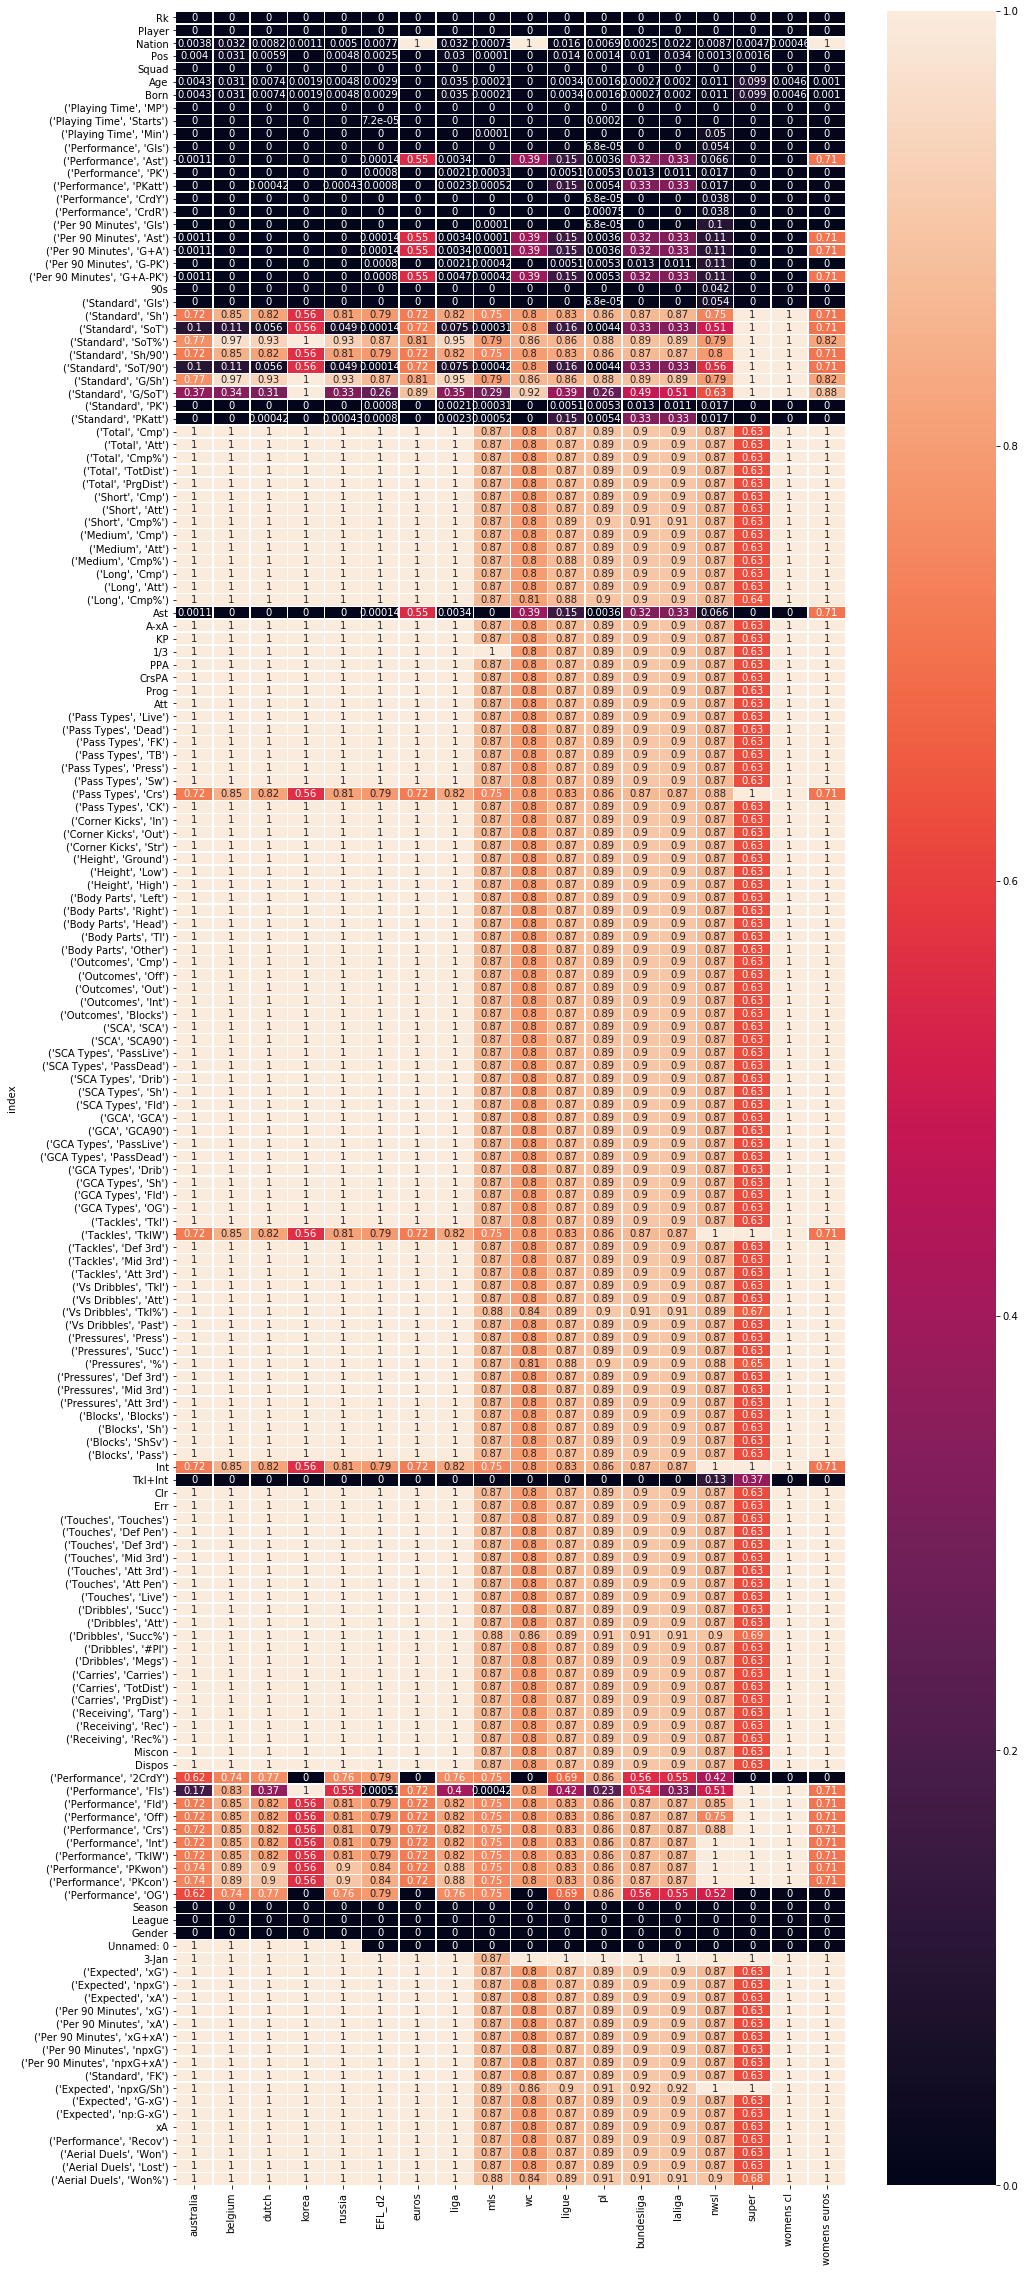

In [7]:
nulls = null_count(df_dict)
null_heatmap(nulls)

## Finds Top Attributes

In [8]:
def get_top_attr(null_df):
    attribute_list = []
    null_df = null_df.set_index('index')
    null_df = null_df[null_df.columns].astype(float)
    null_df['total'] = null_df.apply(lambda row: np.mean(row), axis=1)
    for index, row in null_df.iterrows():
        if null_df.loc[ index, 'total'] <= .2:
            attribute_list.append(index)
    return attribute_list

attributes_list = get_top_attr(nulls)
attributes_list

['Rk',
 'Player',
 'Nation',
 'Pos',
 'Squad',
 'Age',
 'Born',
 "('Playing Time', 'MP')",
 "('Playing Time', 'Starts')",
 "('Playing Time', 'Min')",
 "('Performance', 'Gls')",
 "('Performance', 'Ast')",
 "('Performance', 'PK')",
 "('Performance', 'PKatt')",
 "('Performance', 'CrdY')",
 "('Performance', 'CrdR')",
 "('Per 90 Minutes', 'Gls')",
 "('Per 90 Minutes', 'Ast')",
 "('Per 90 Minutes', 'G+A')",
 "('Per 90 Minutes', 'G-PK')",
 "('Per 90 Minutes', 'G+A-PK')",
 '90s',
 "('Standard', 'Gls')",
 "('Standard', 'PK')",
 "('Standard', 'PKatt')",
 'Ast',
 'Tkl+Int',
 'Season',
 'League',
 'Gender']

# Exploratory Data Analysis

In [9]:
## Subset of attributes_list that removes duplicates and attributes from calculations
top_attributes = ['Age', "('Playing Time', 'MP')", "('Playing Time', 'Starts')",  "('Performance', 'Gls')",
                 "('Performance', 'Ast')", "('Performance', 'CrdY')",
                 "('Performance', 'CrdR')", 'Tkl+Int', '90s']


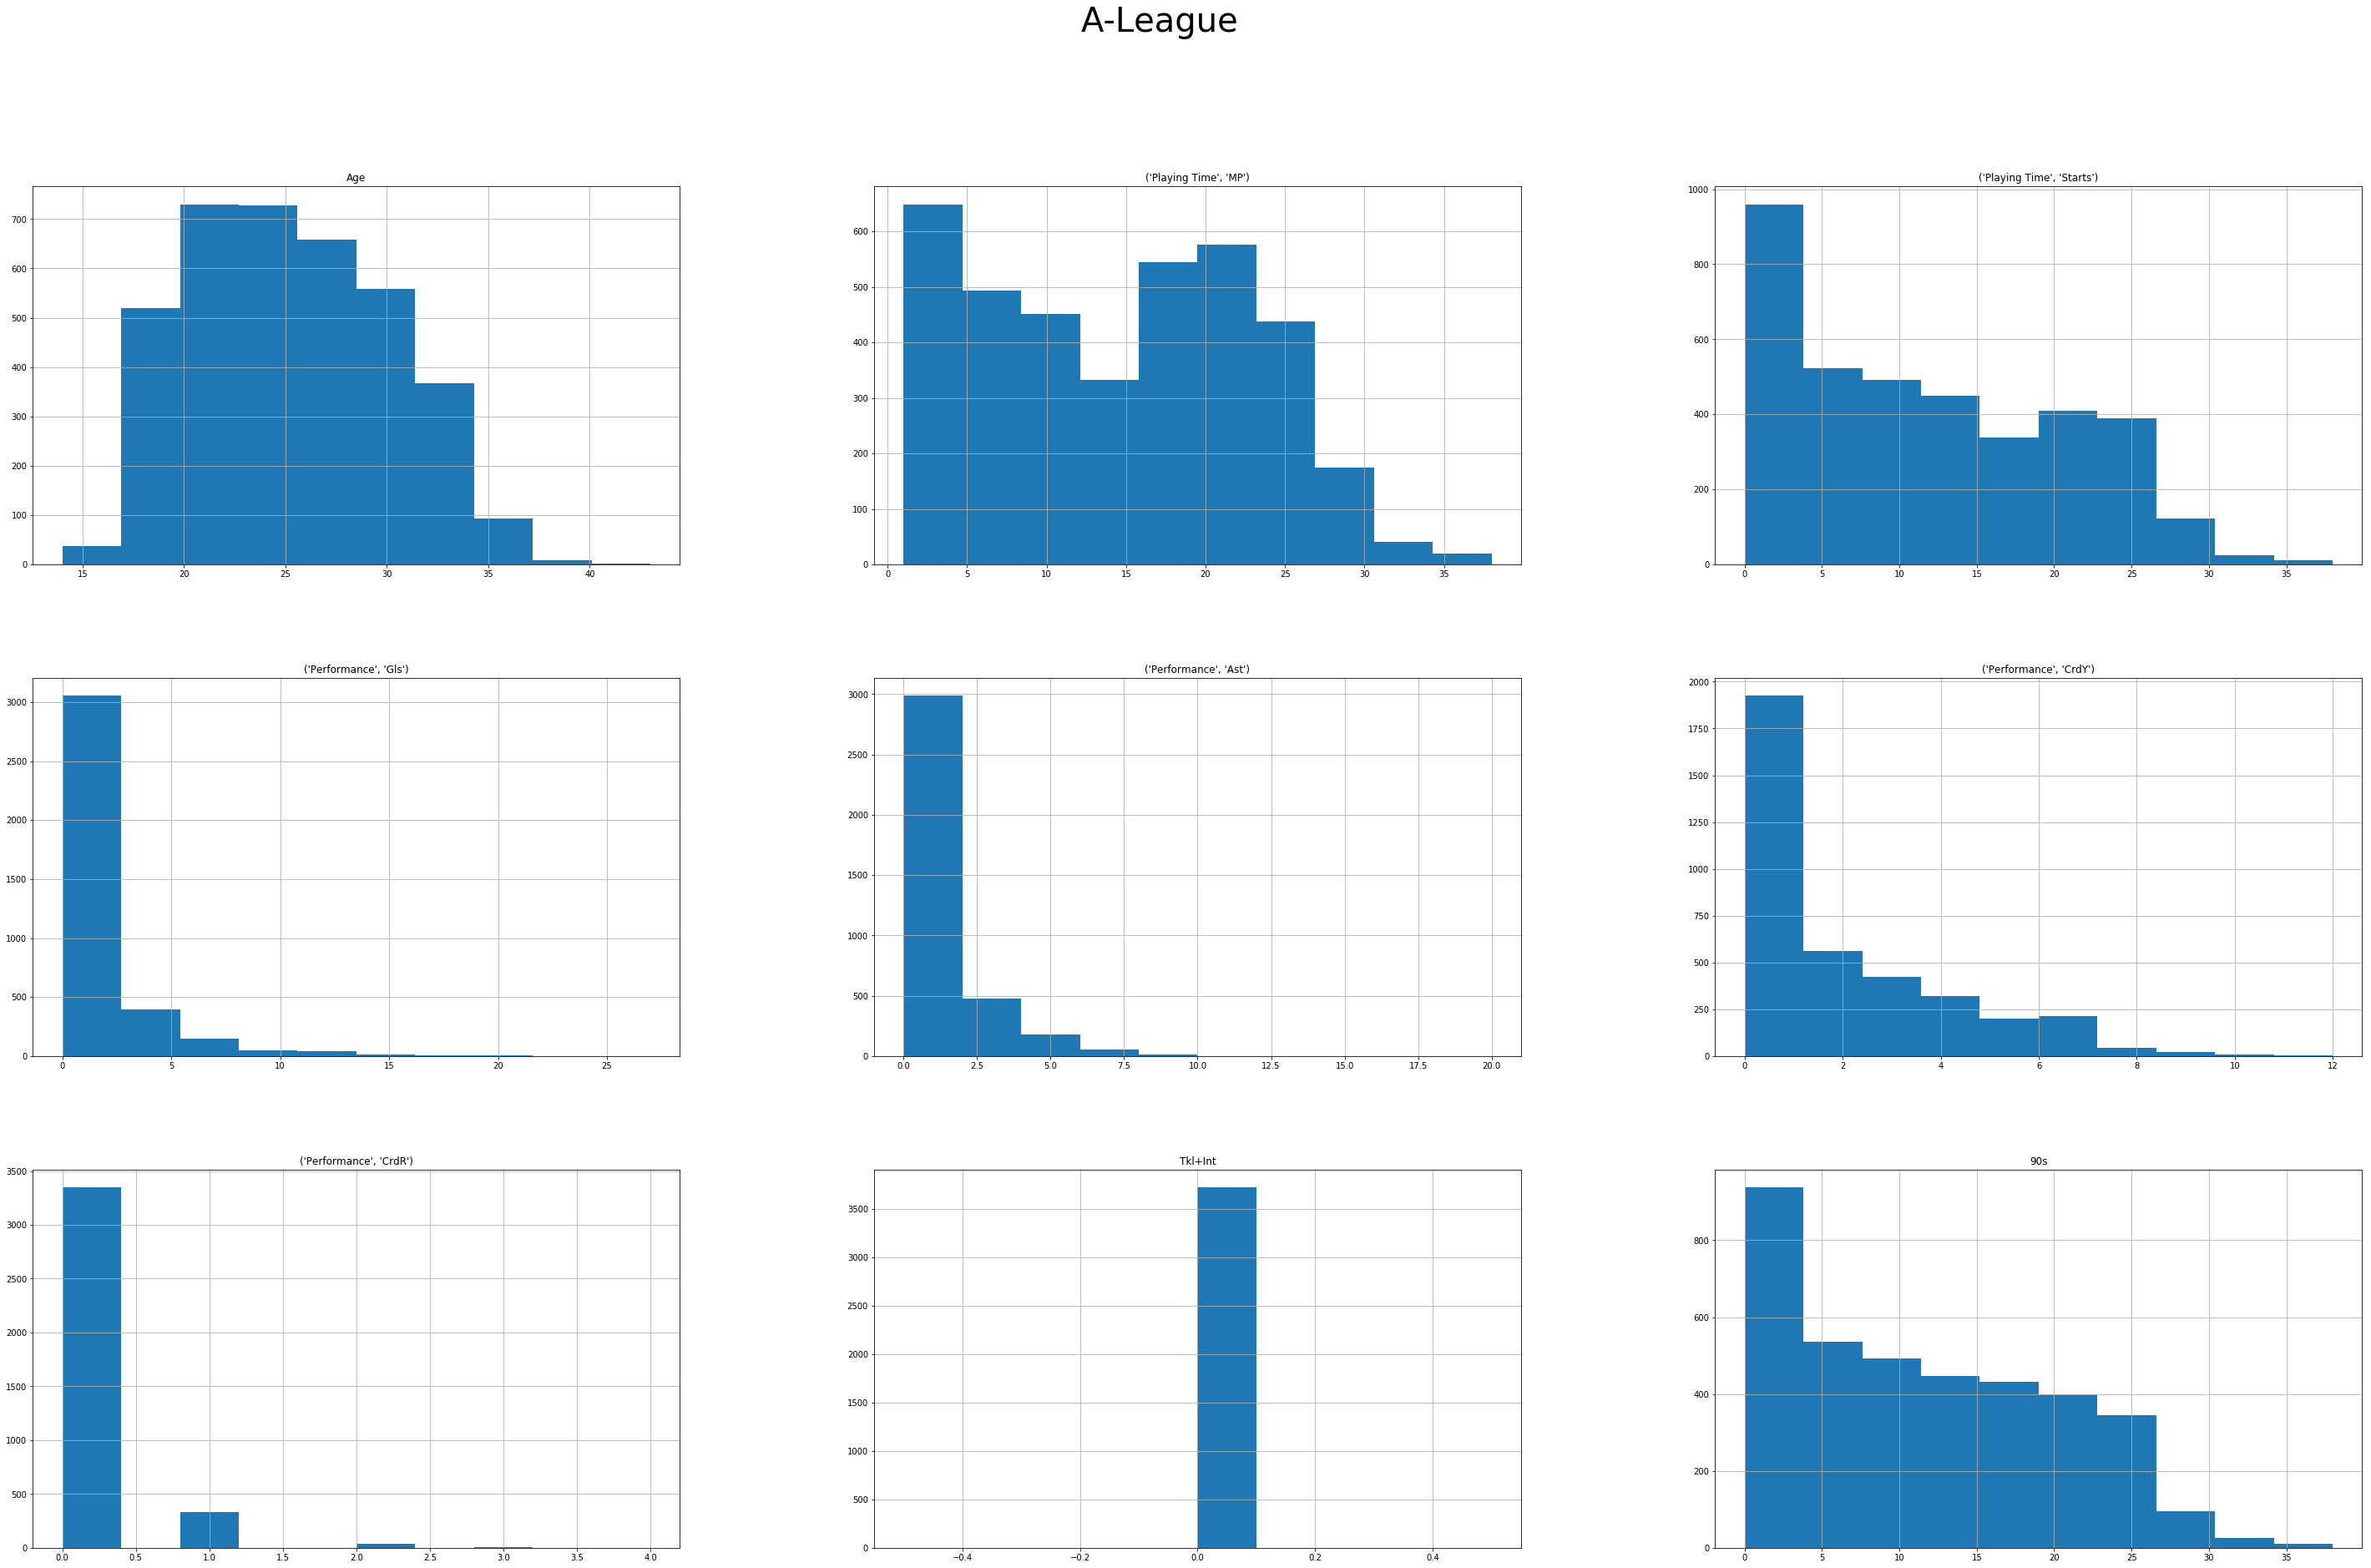

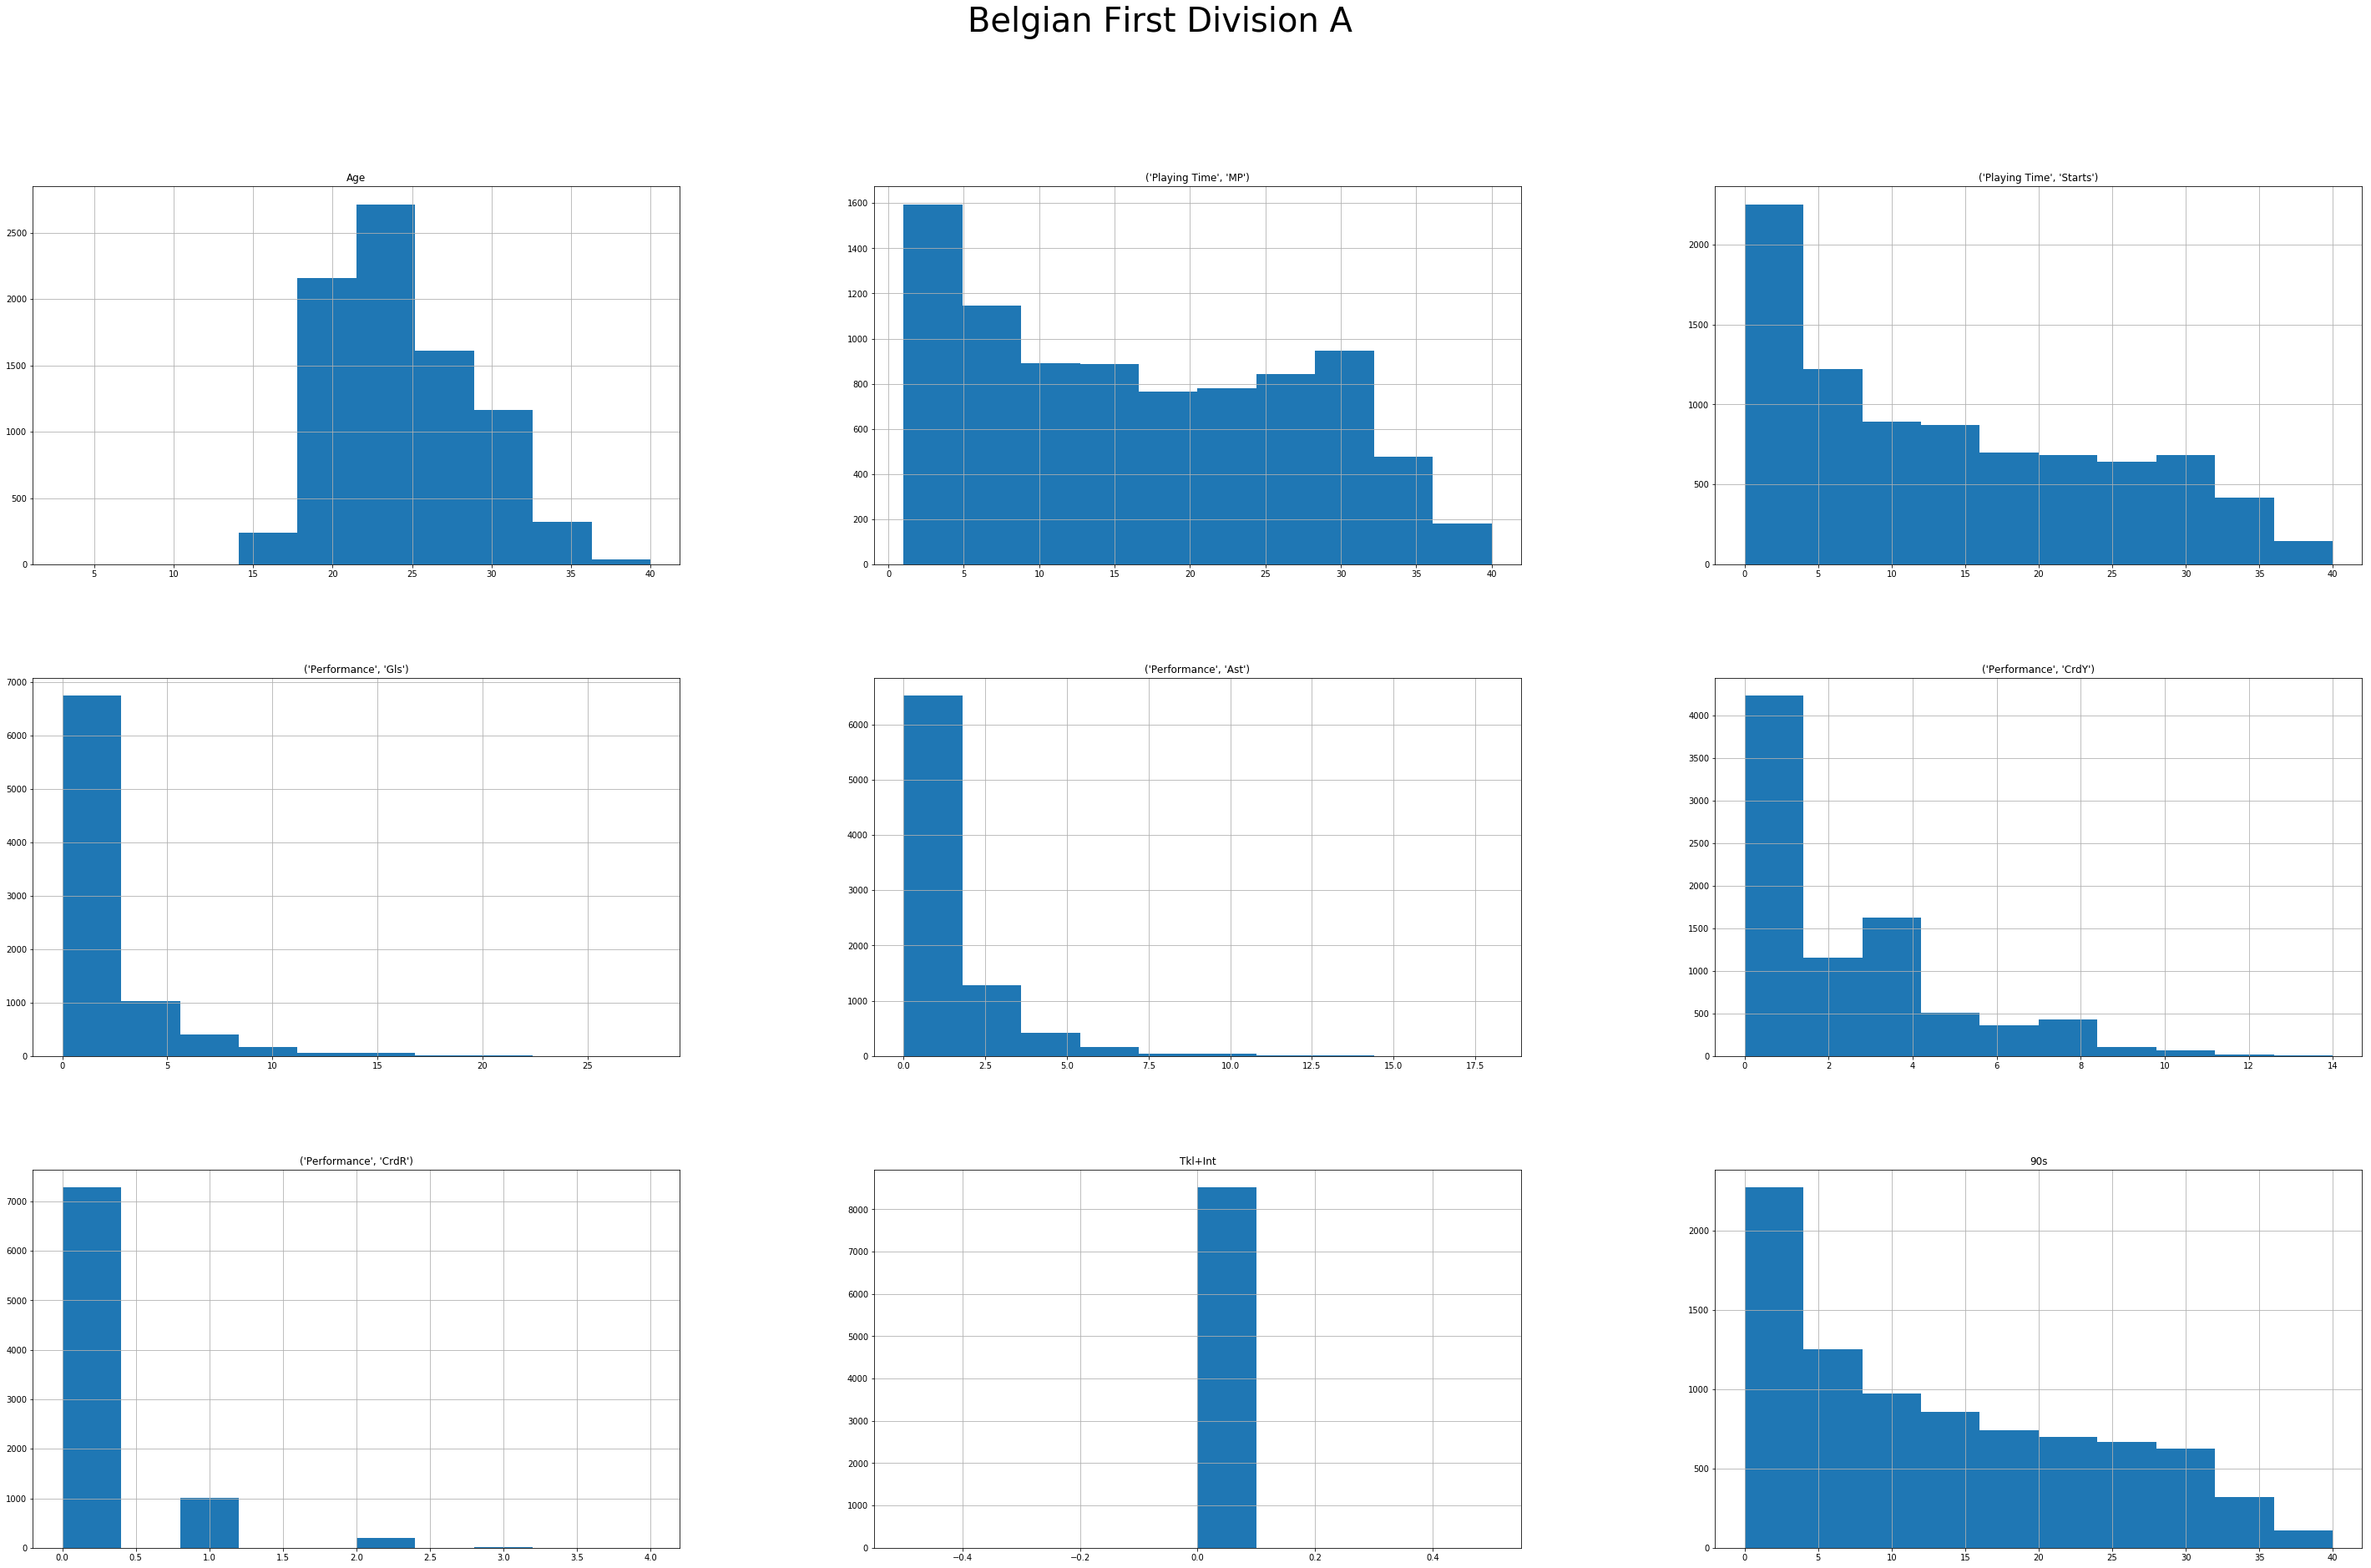

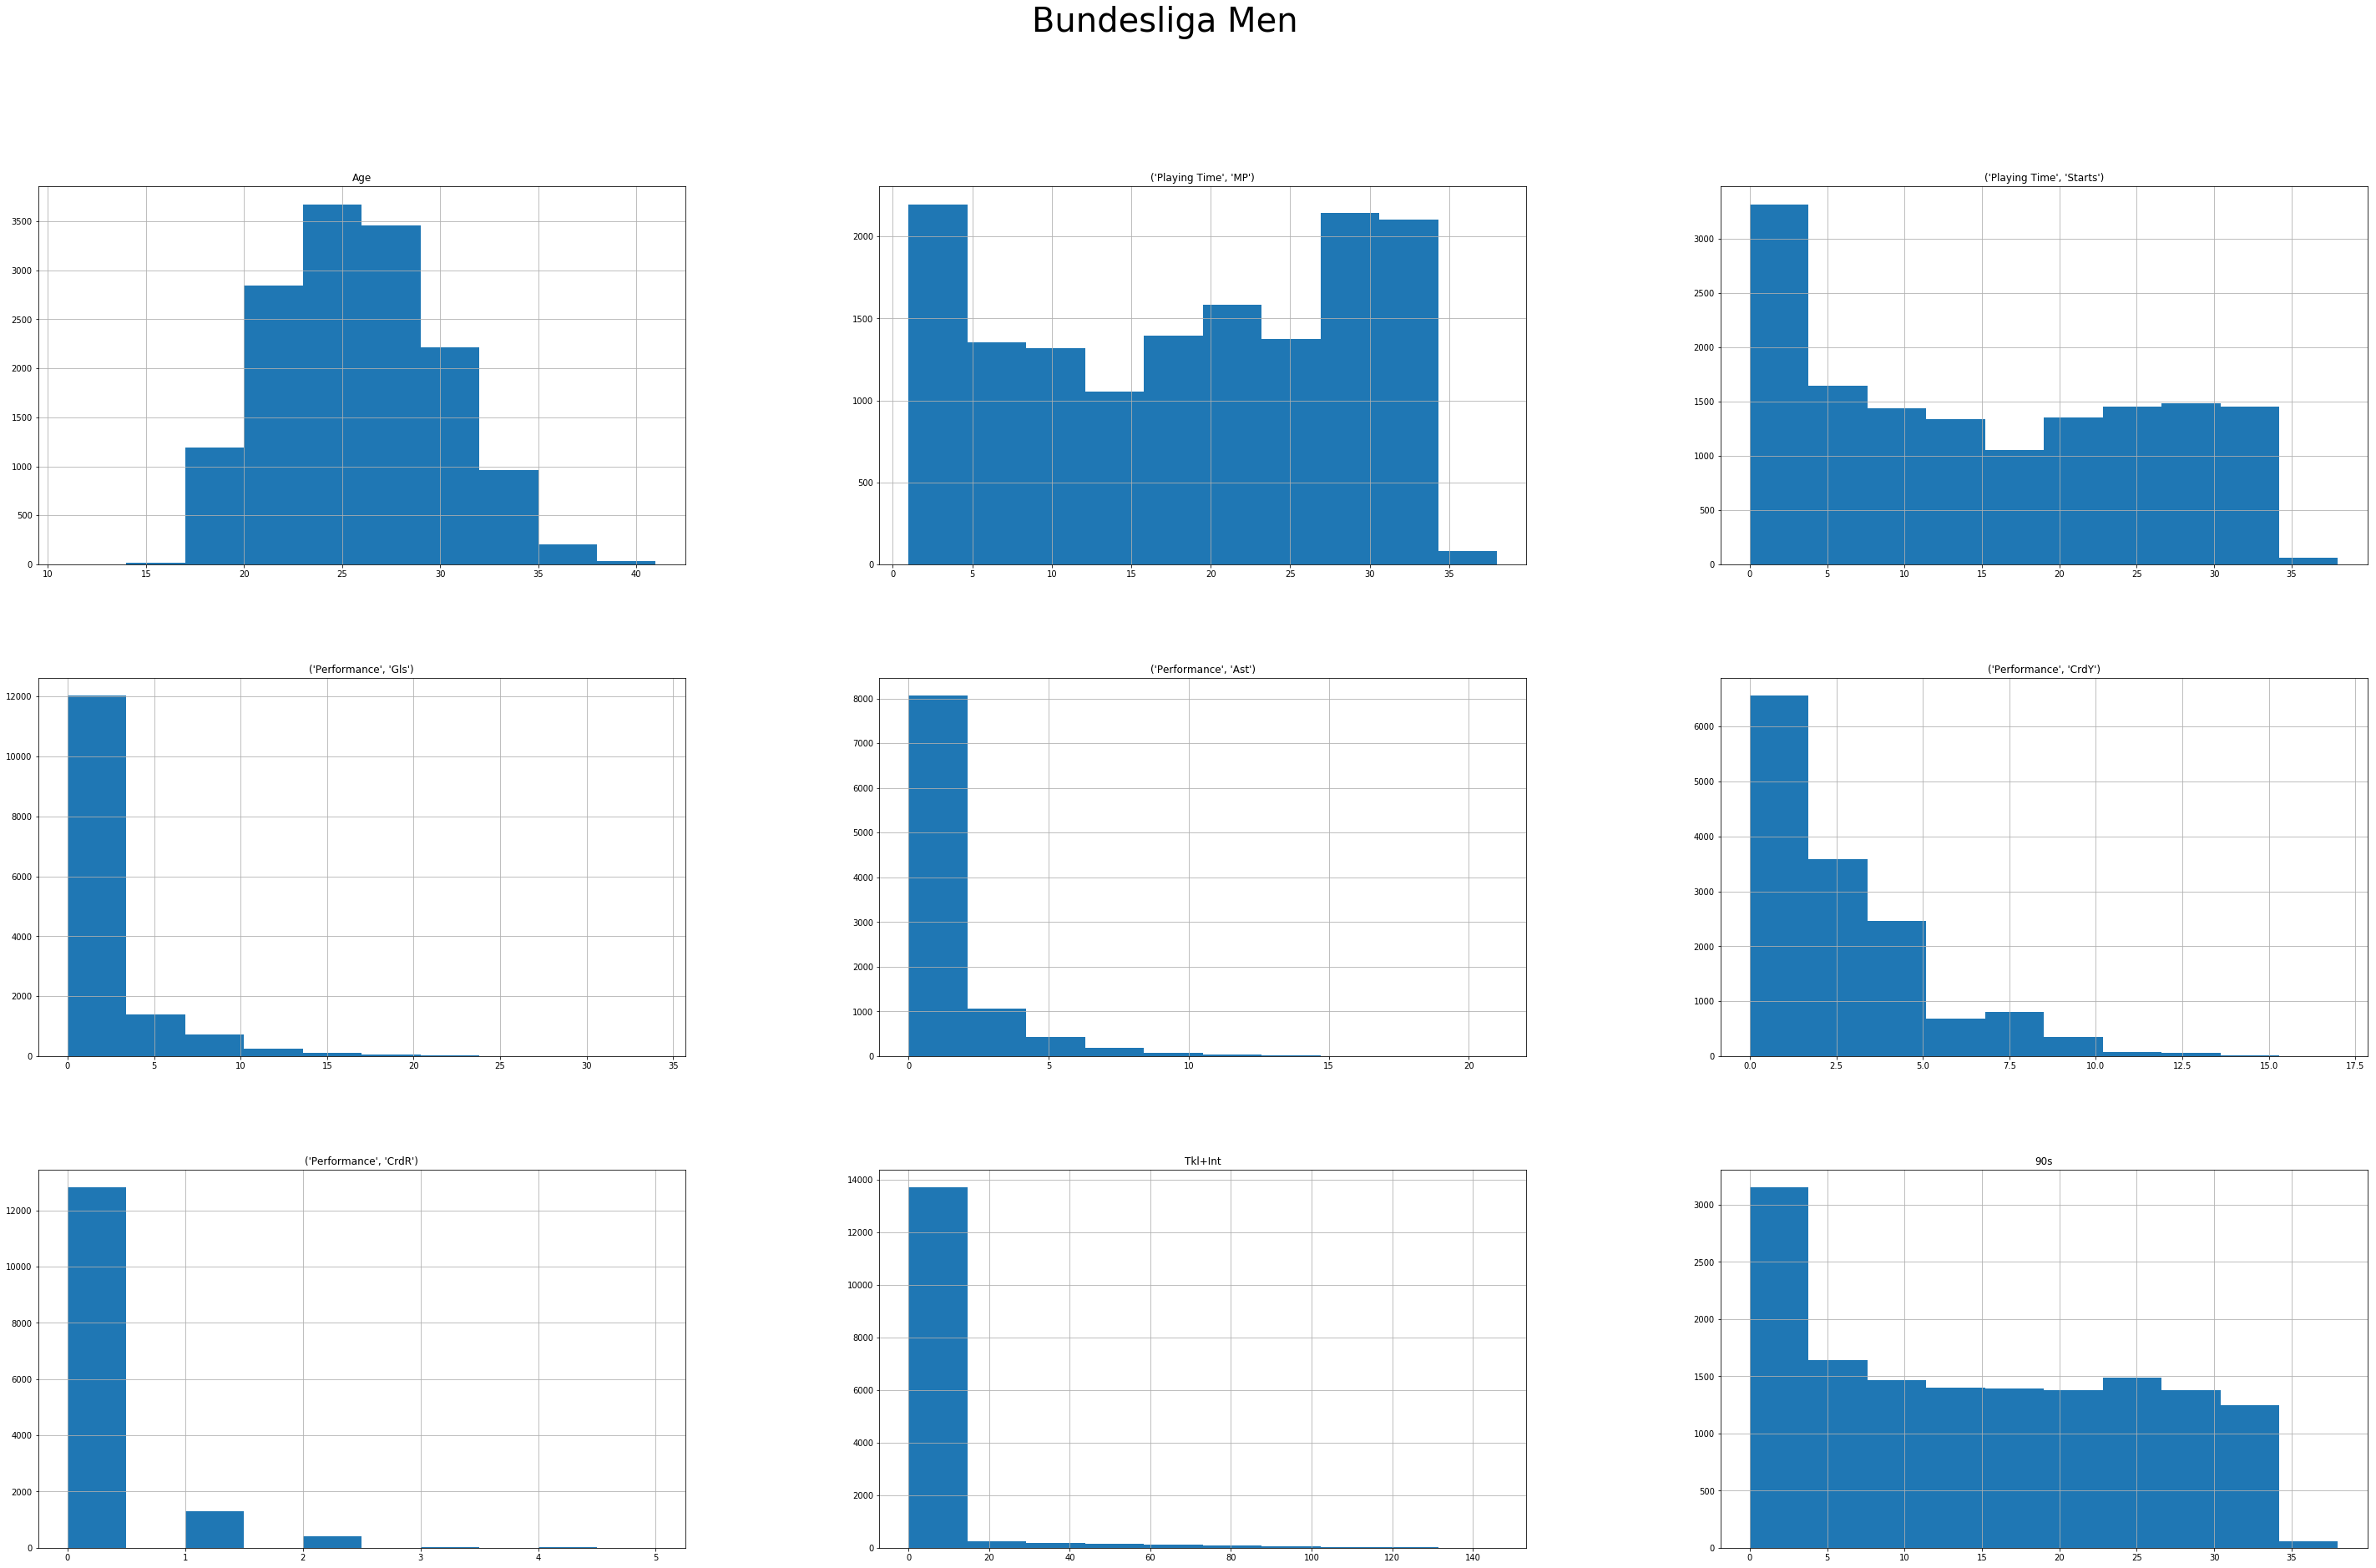

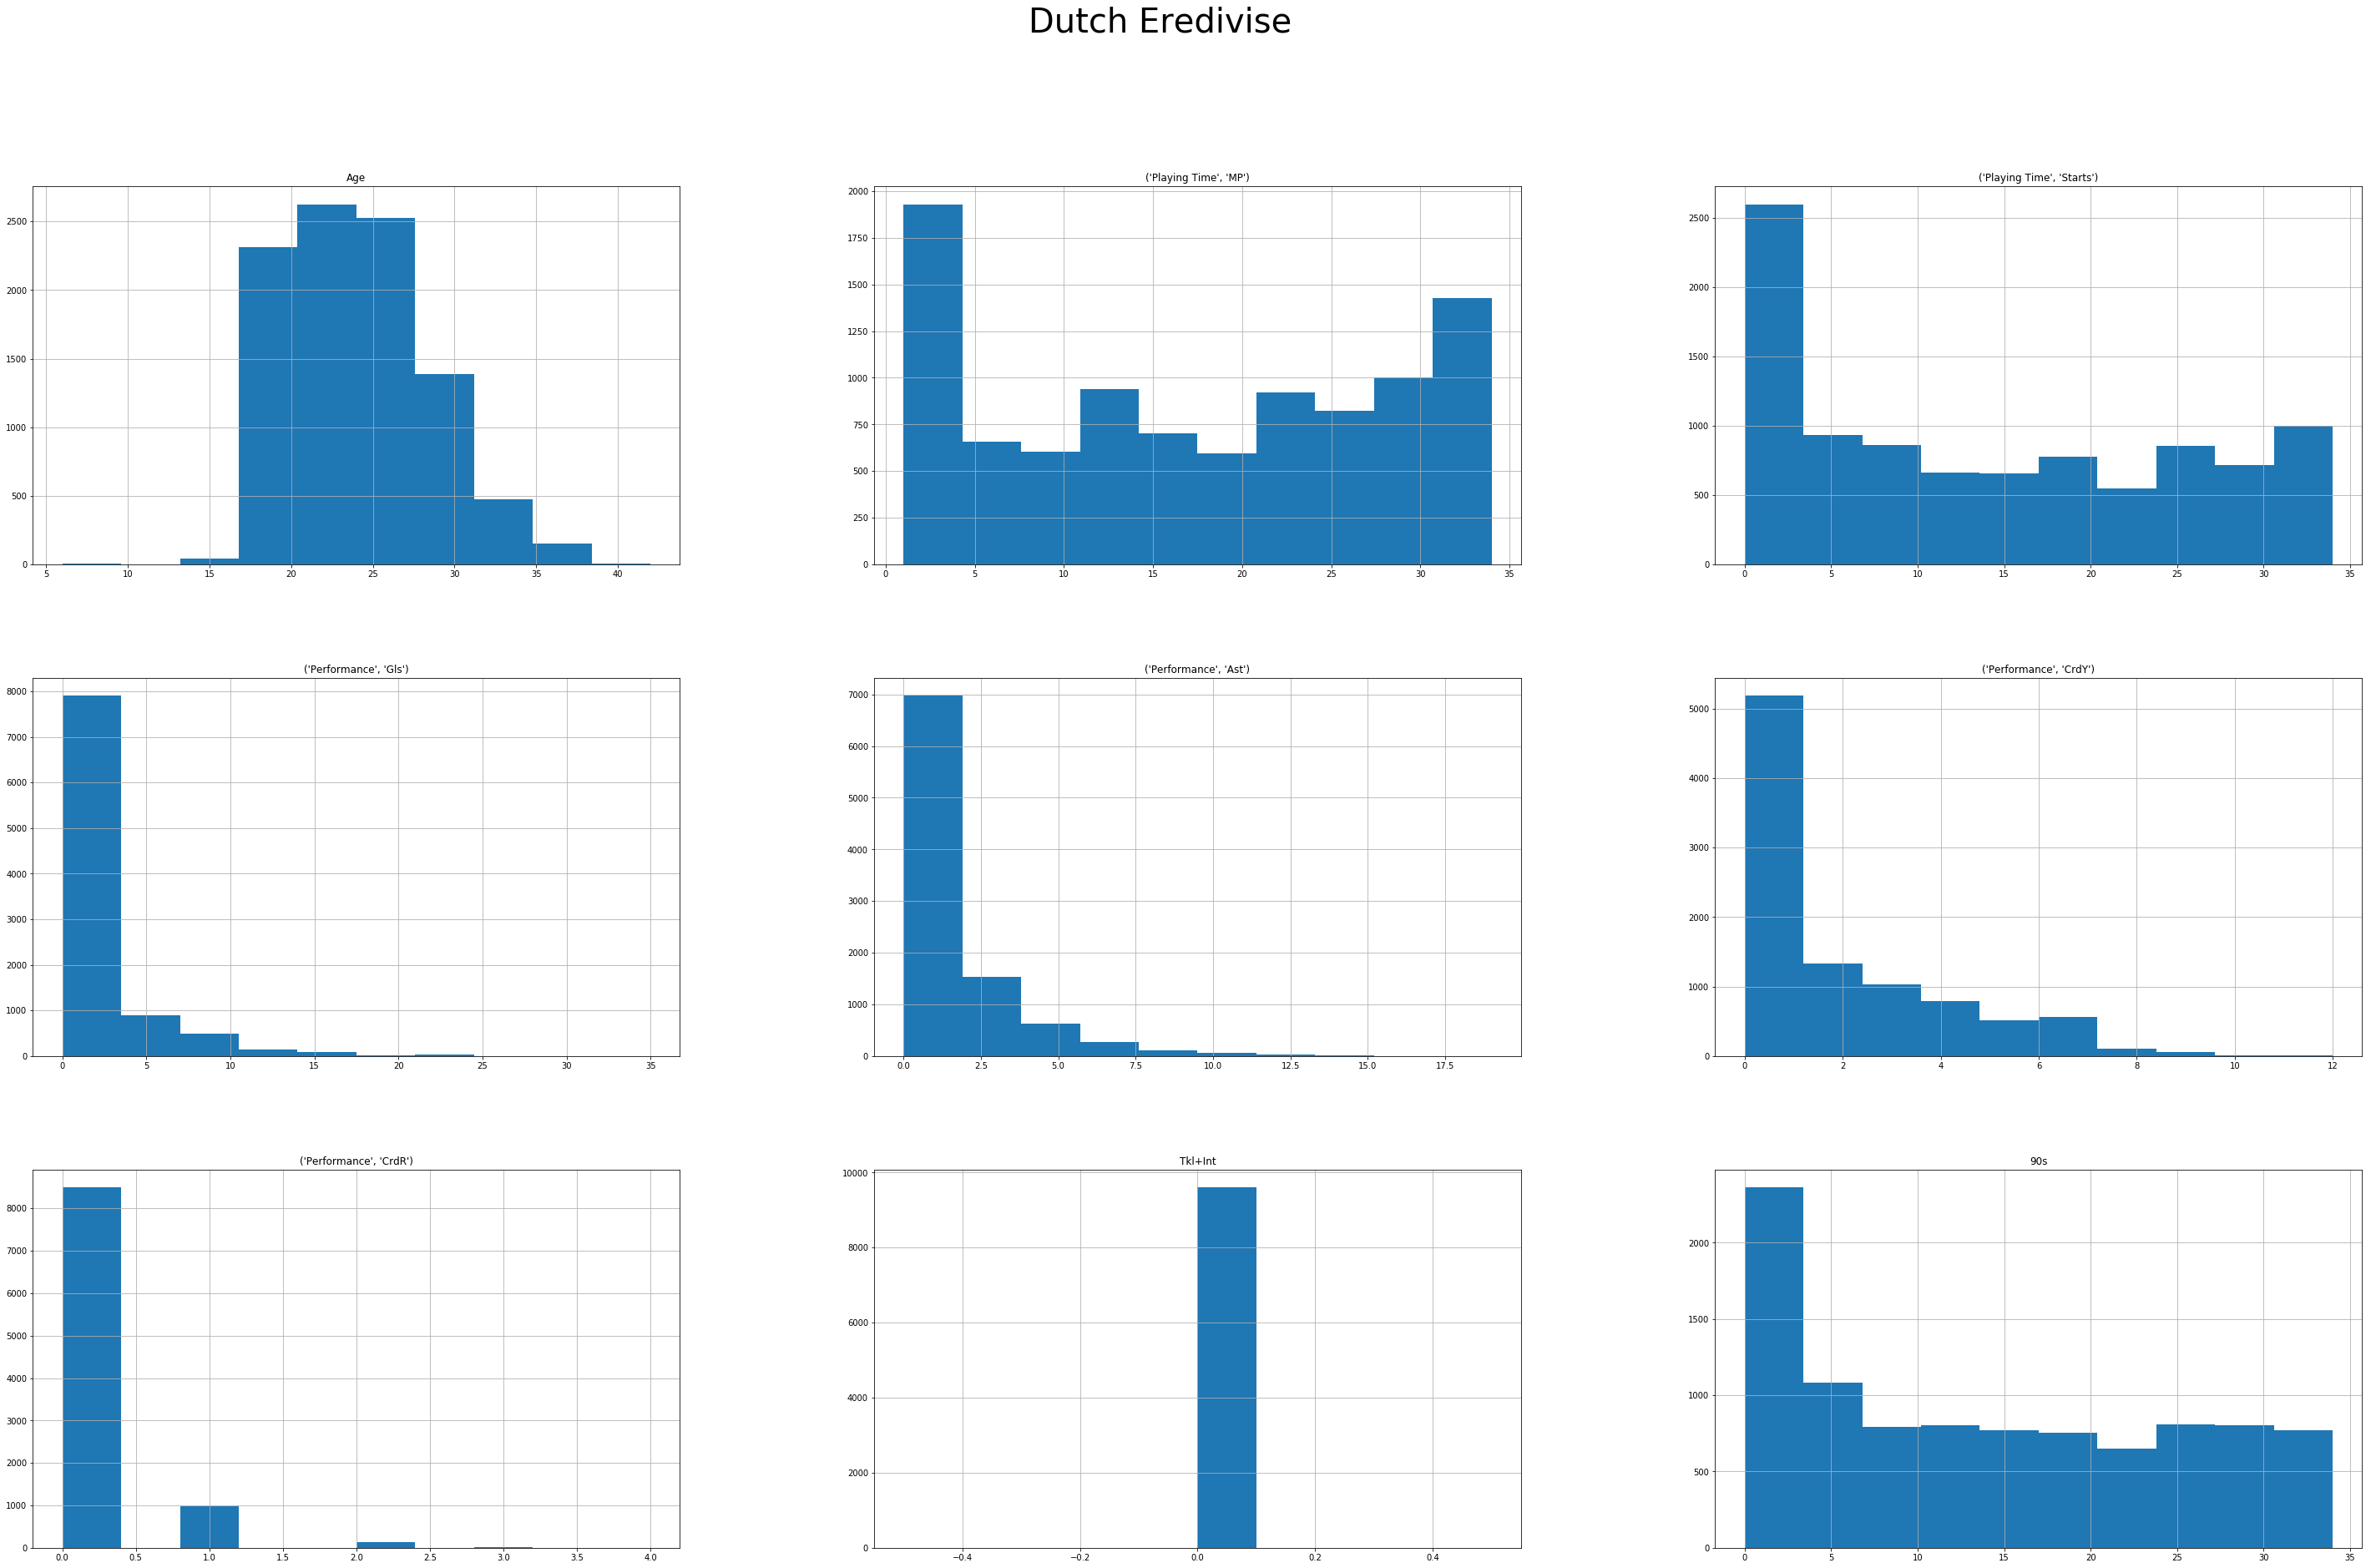

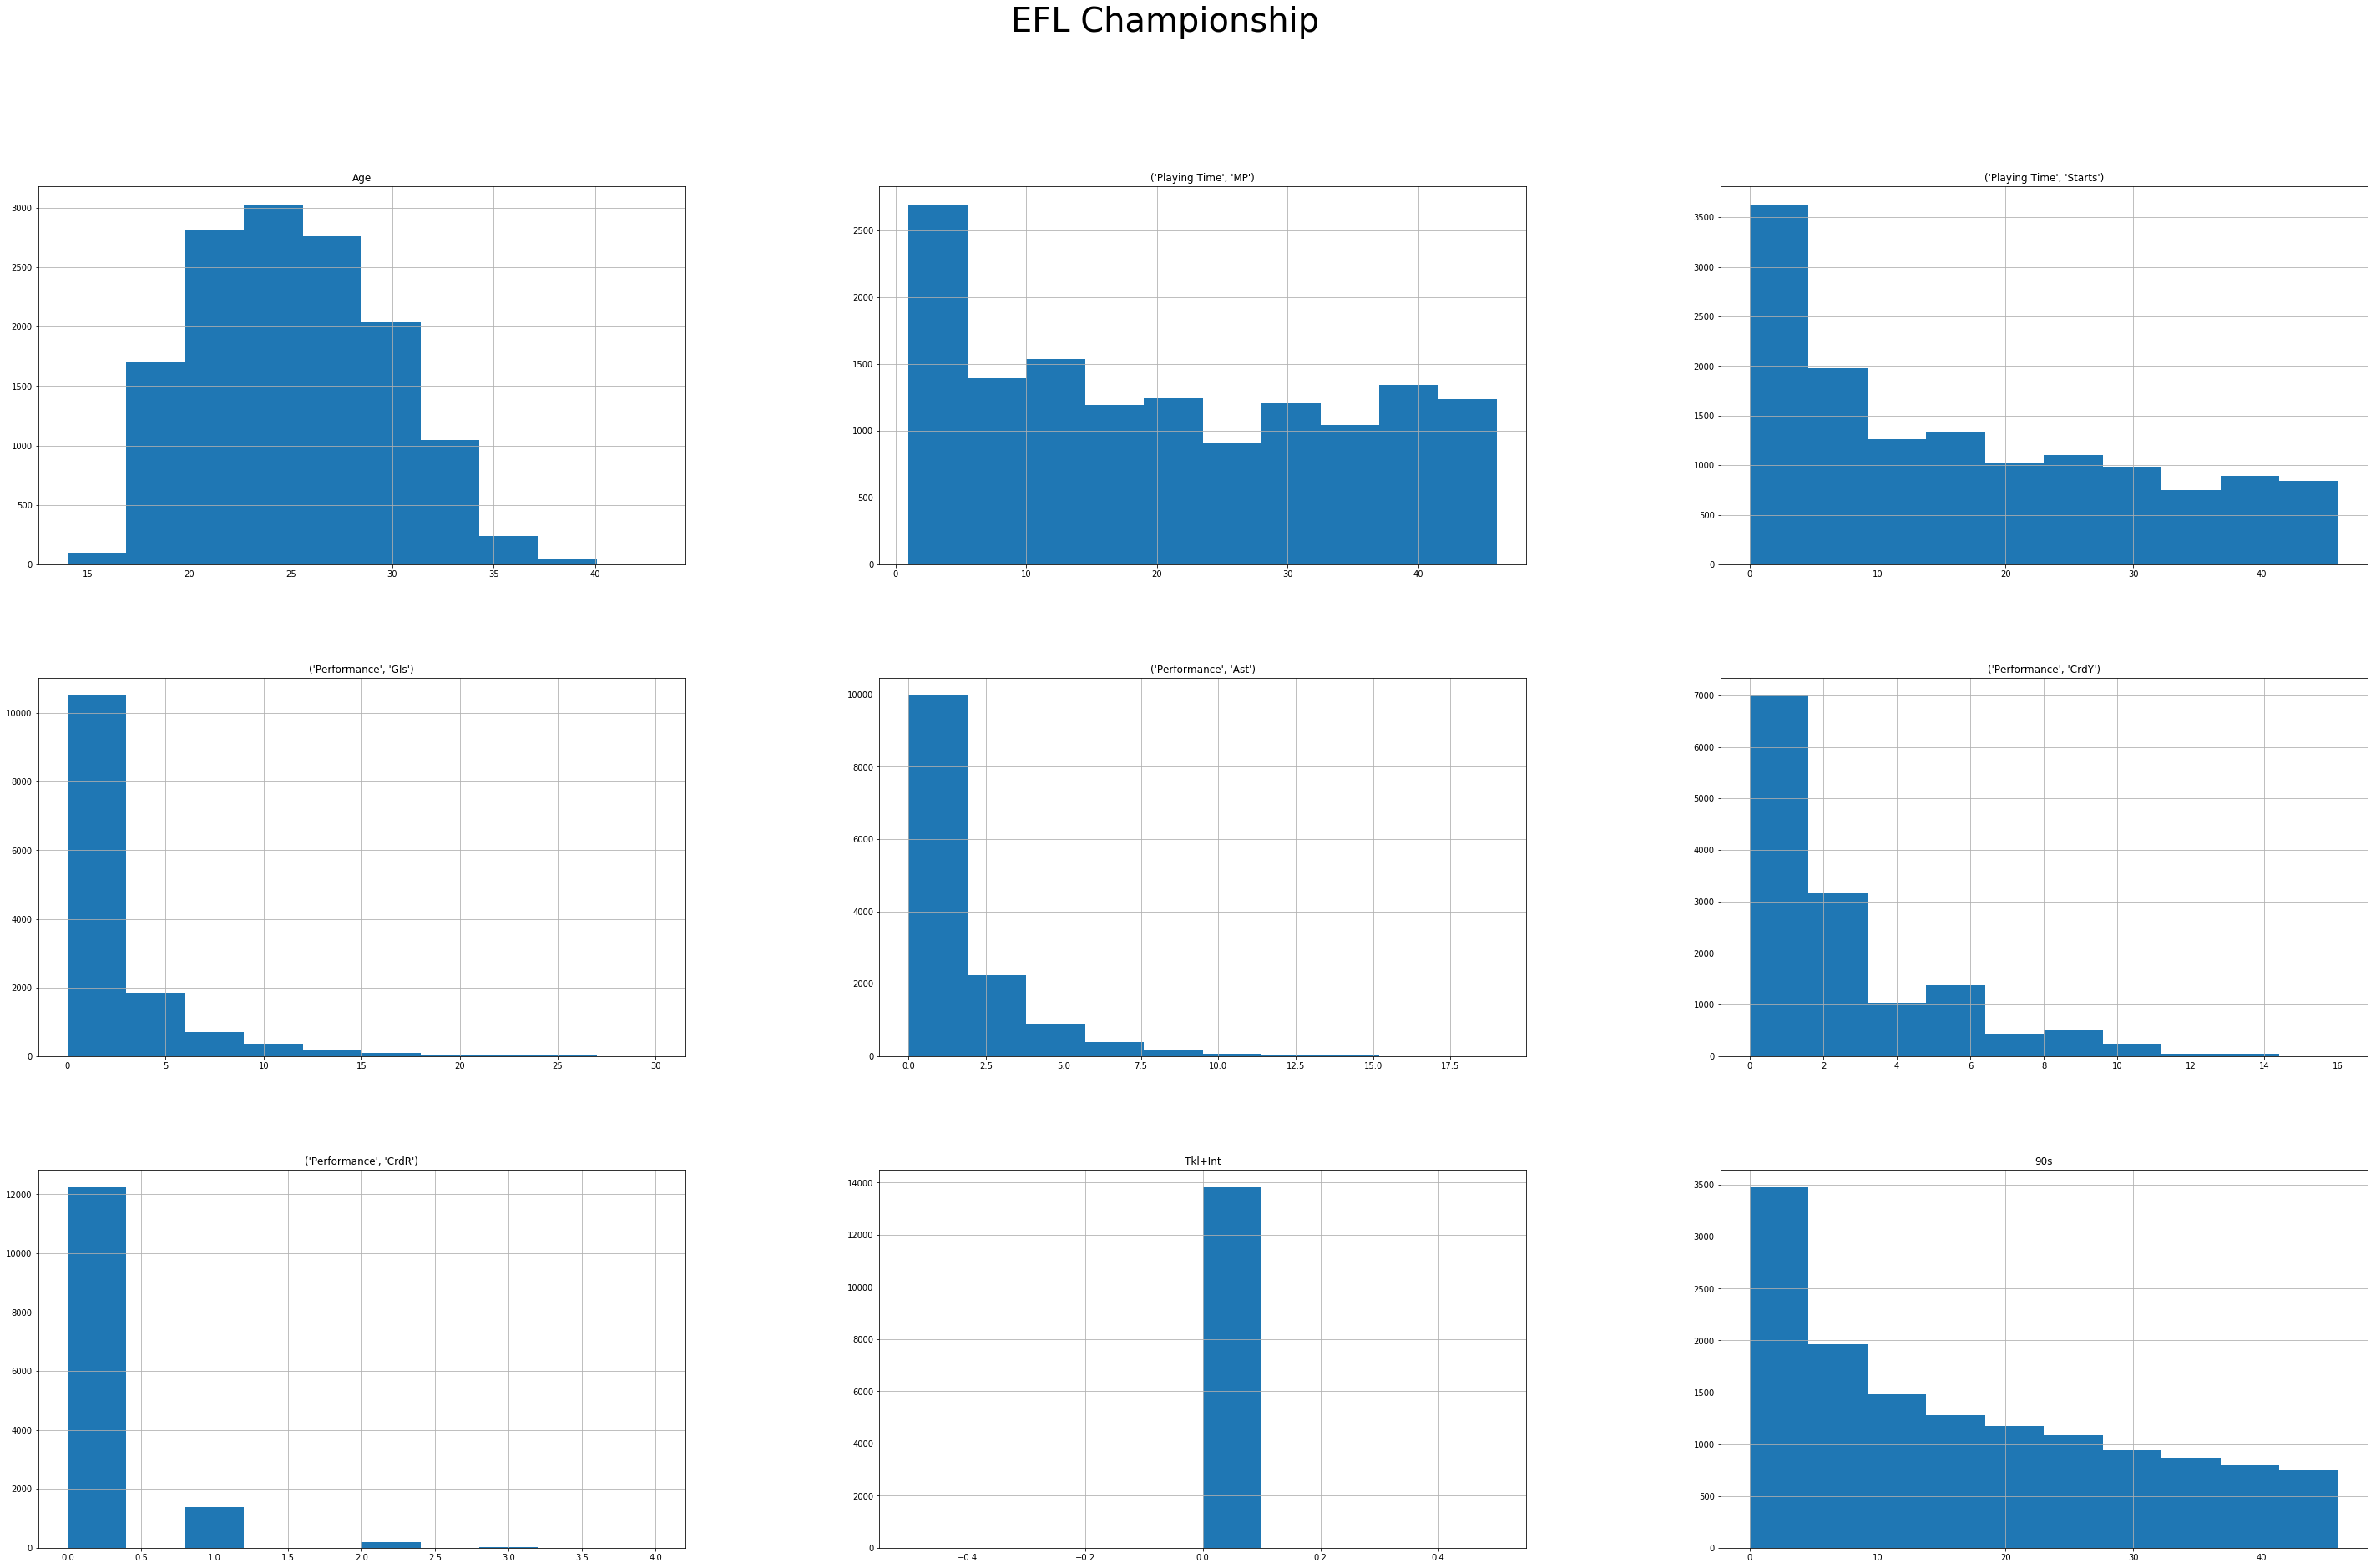

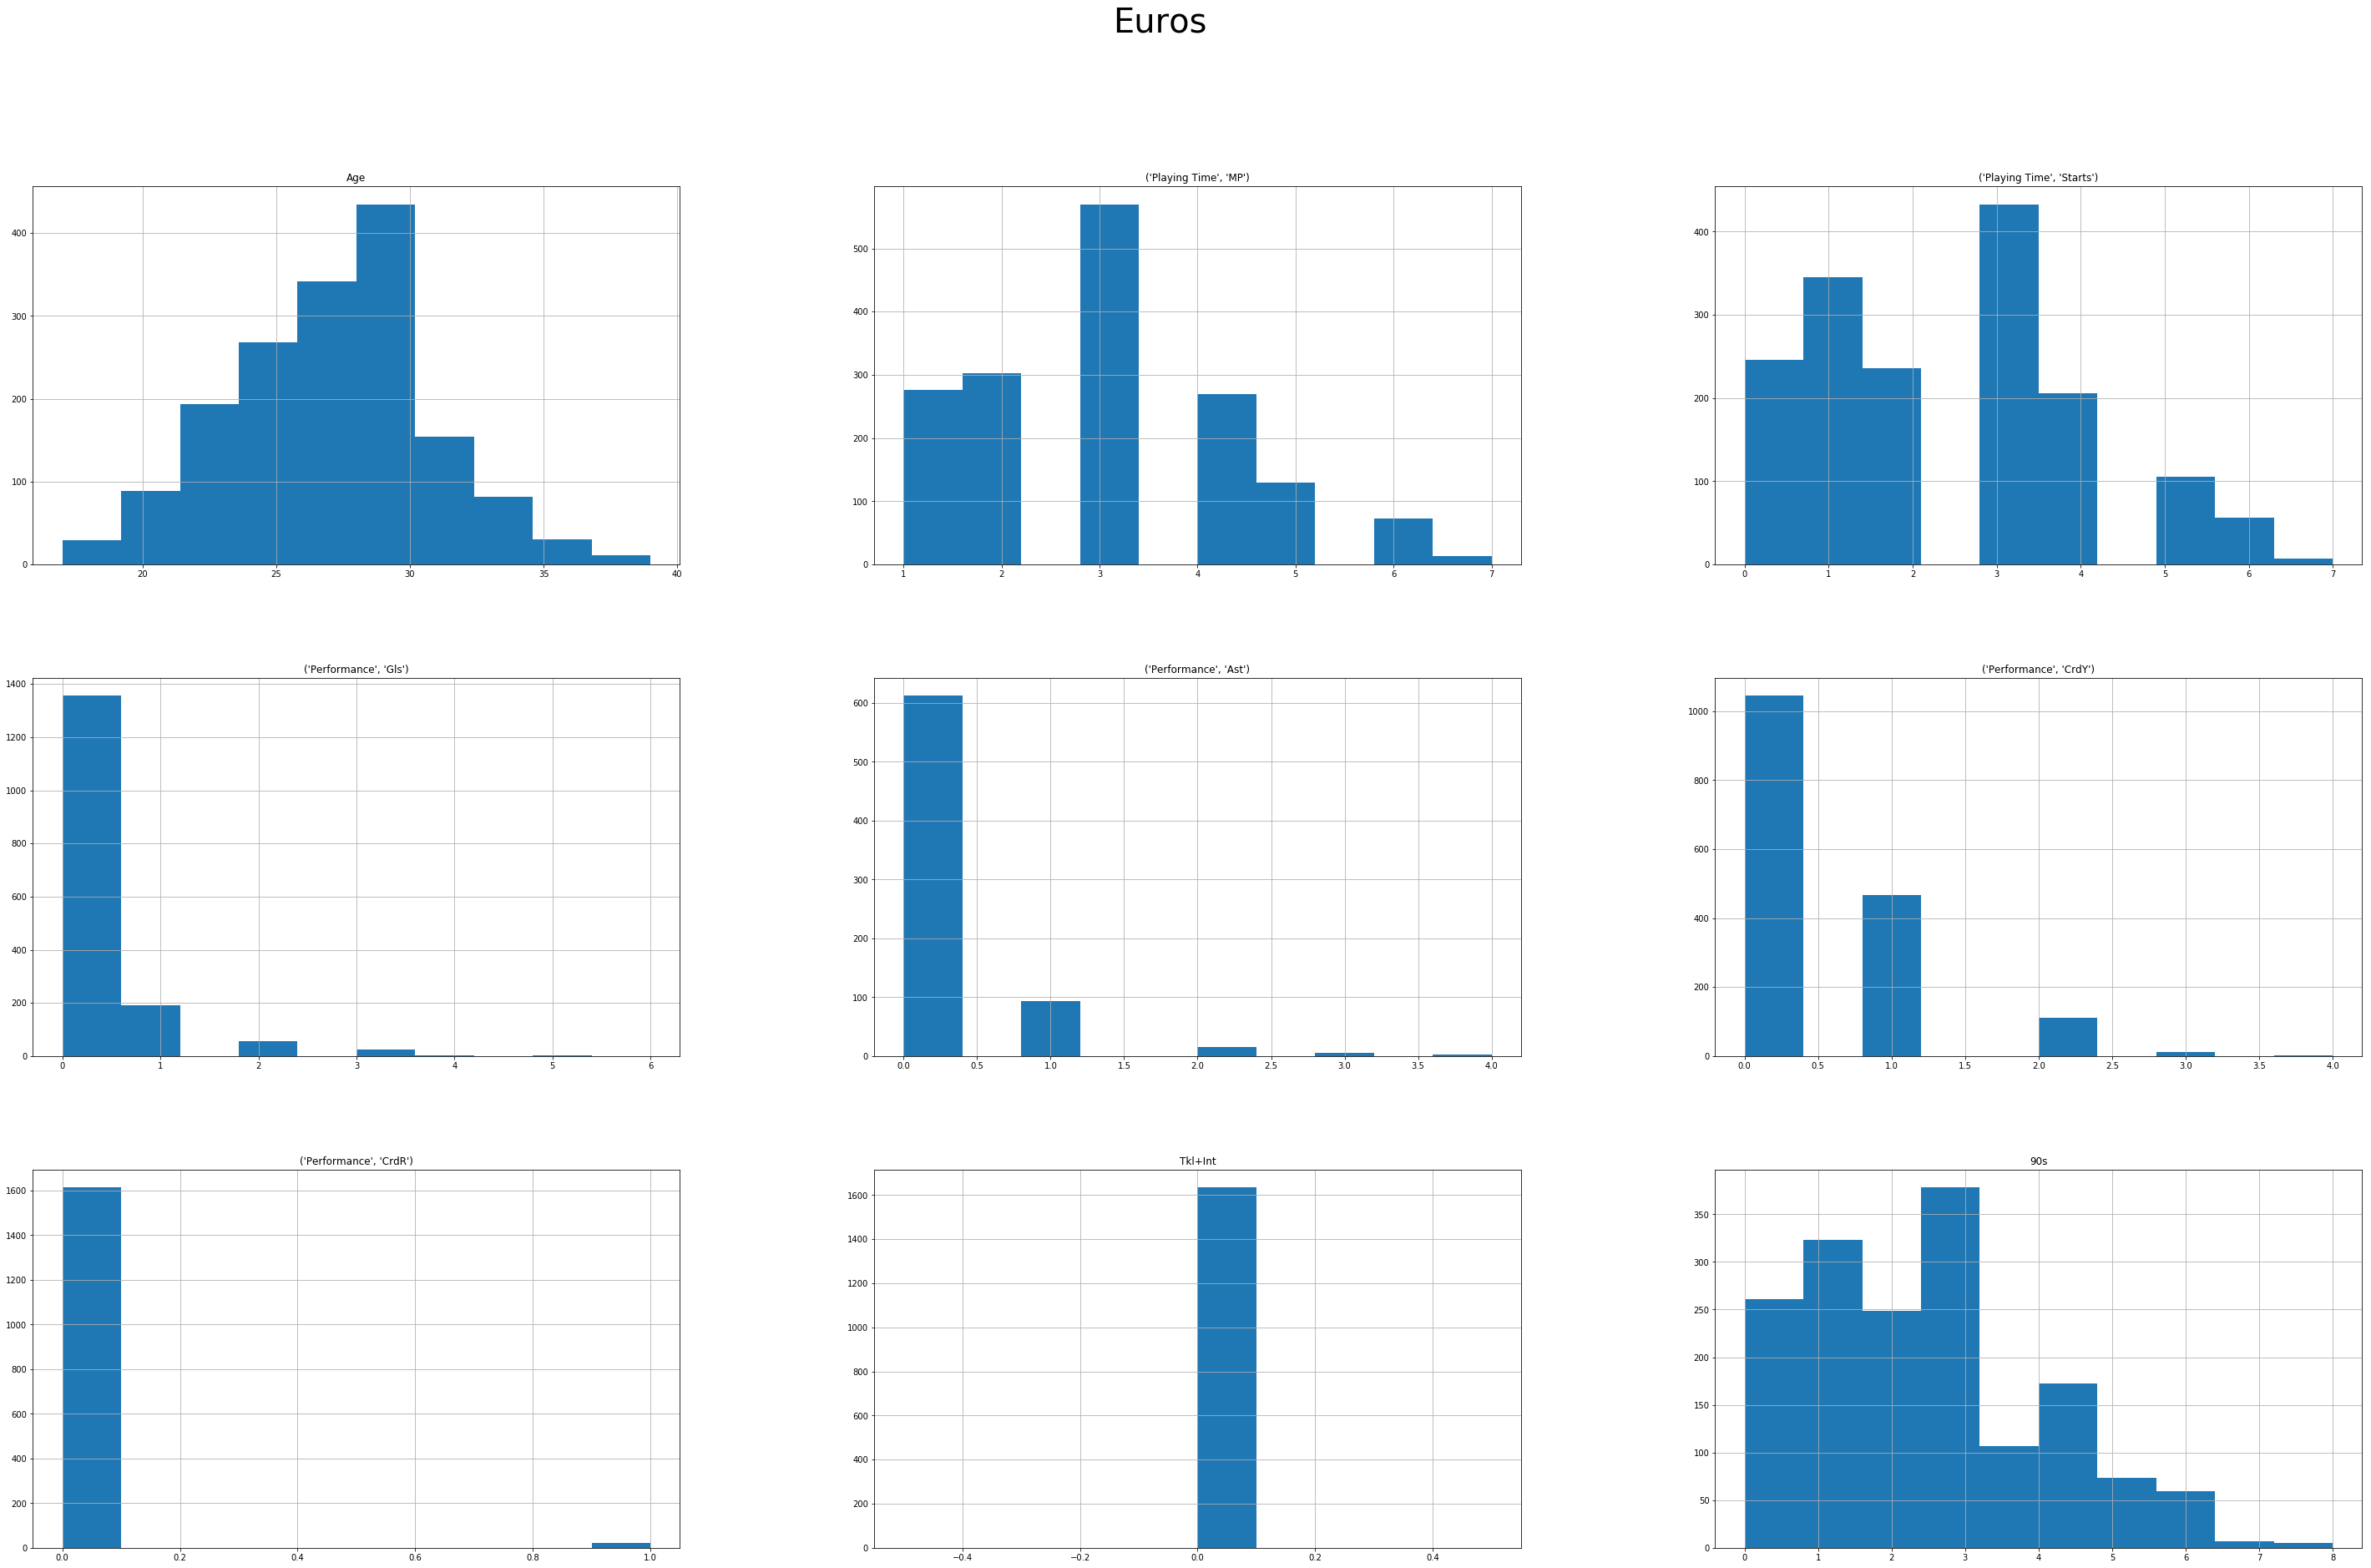

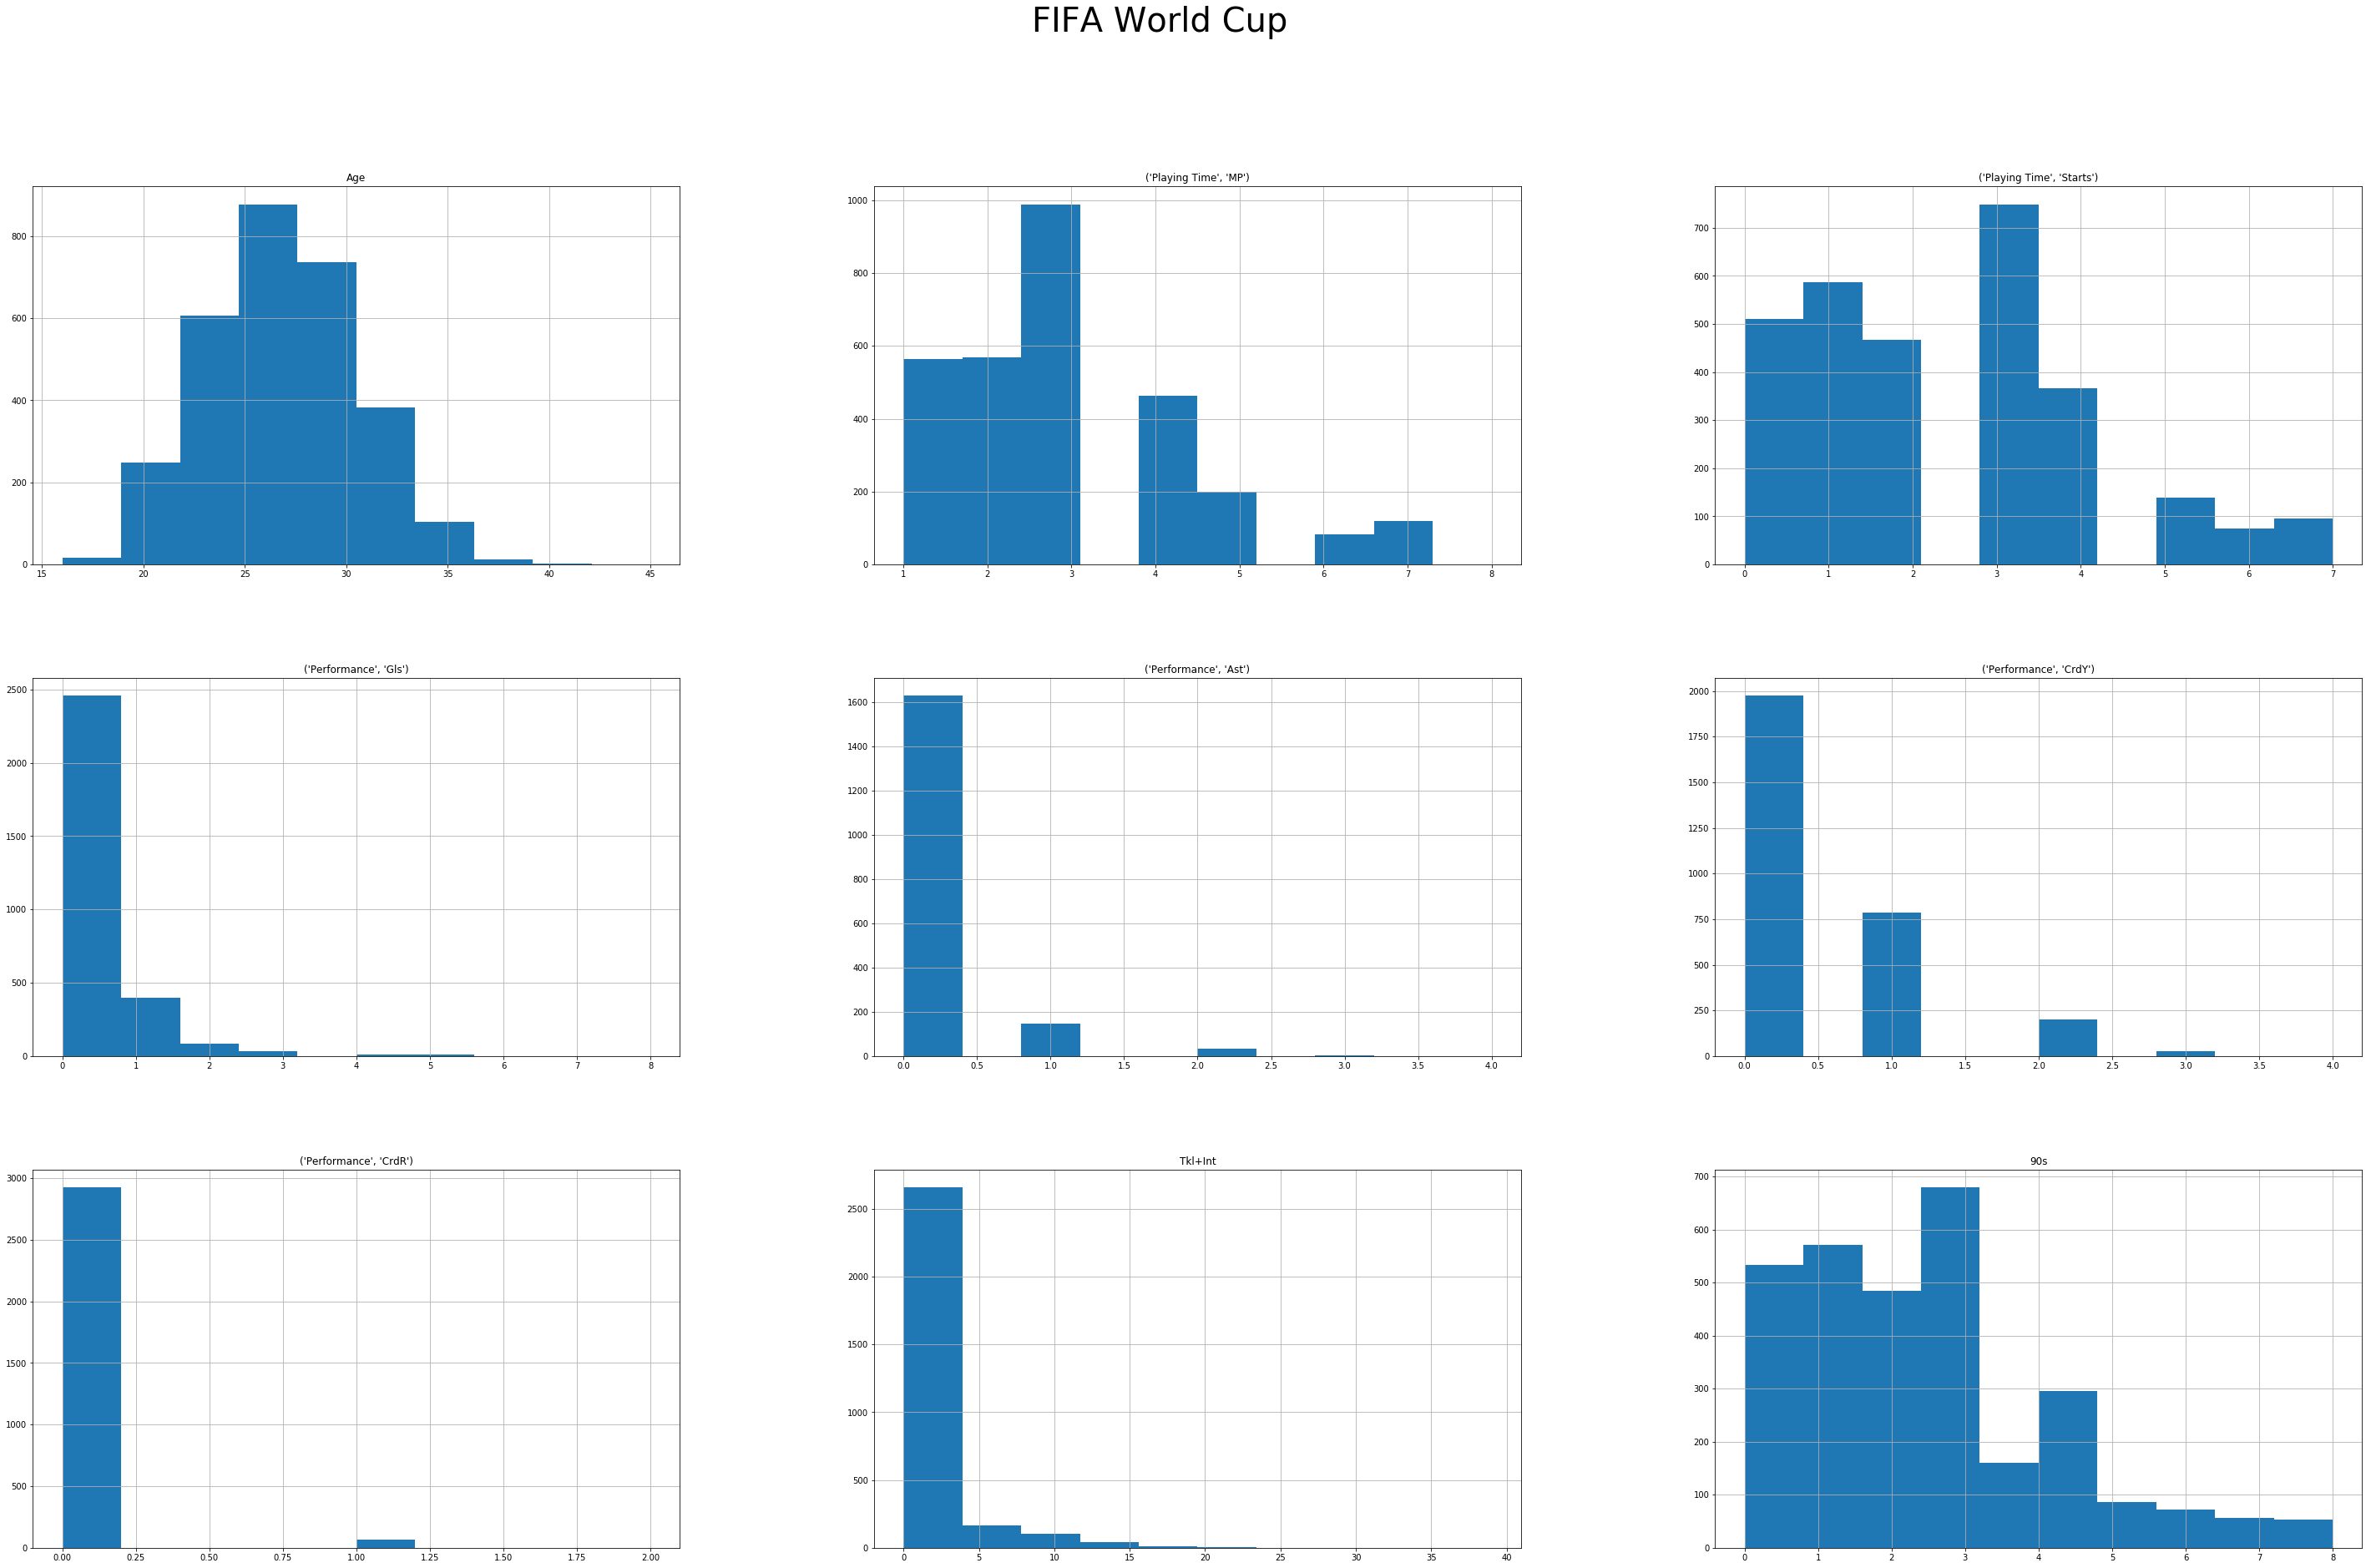

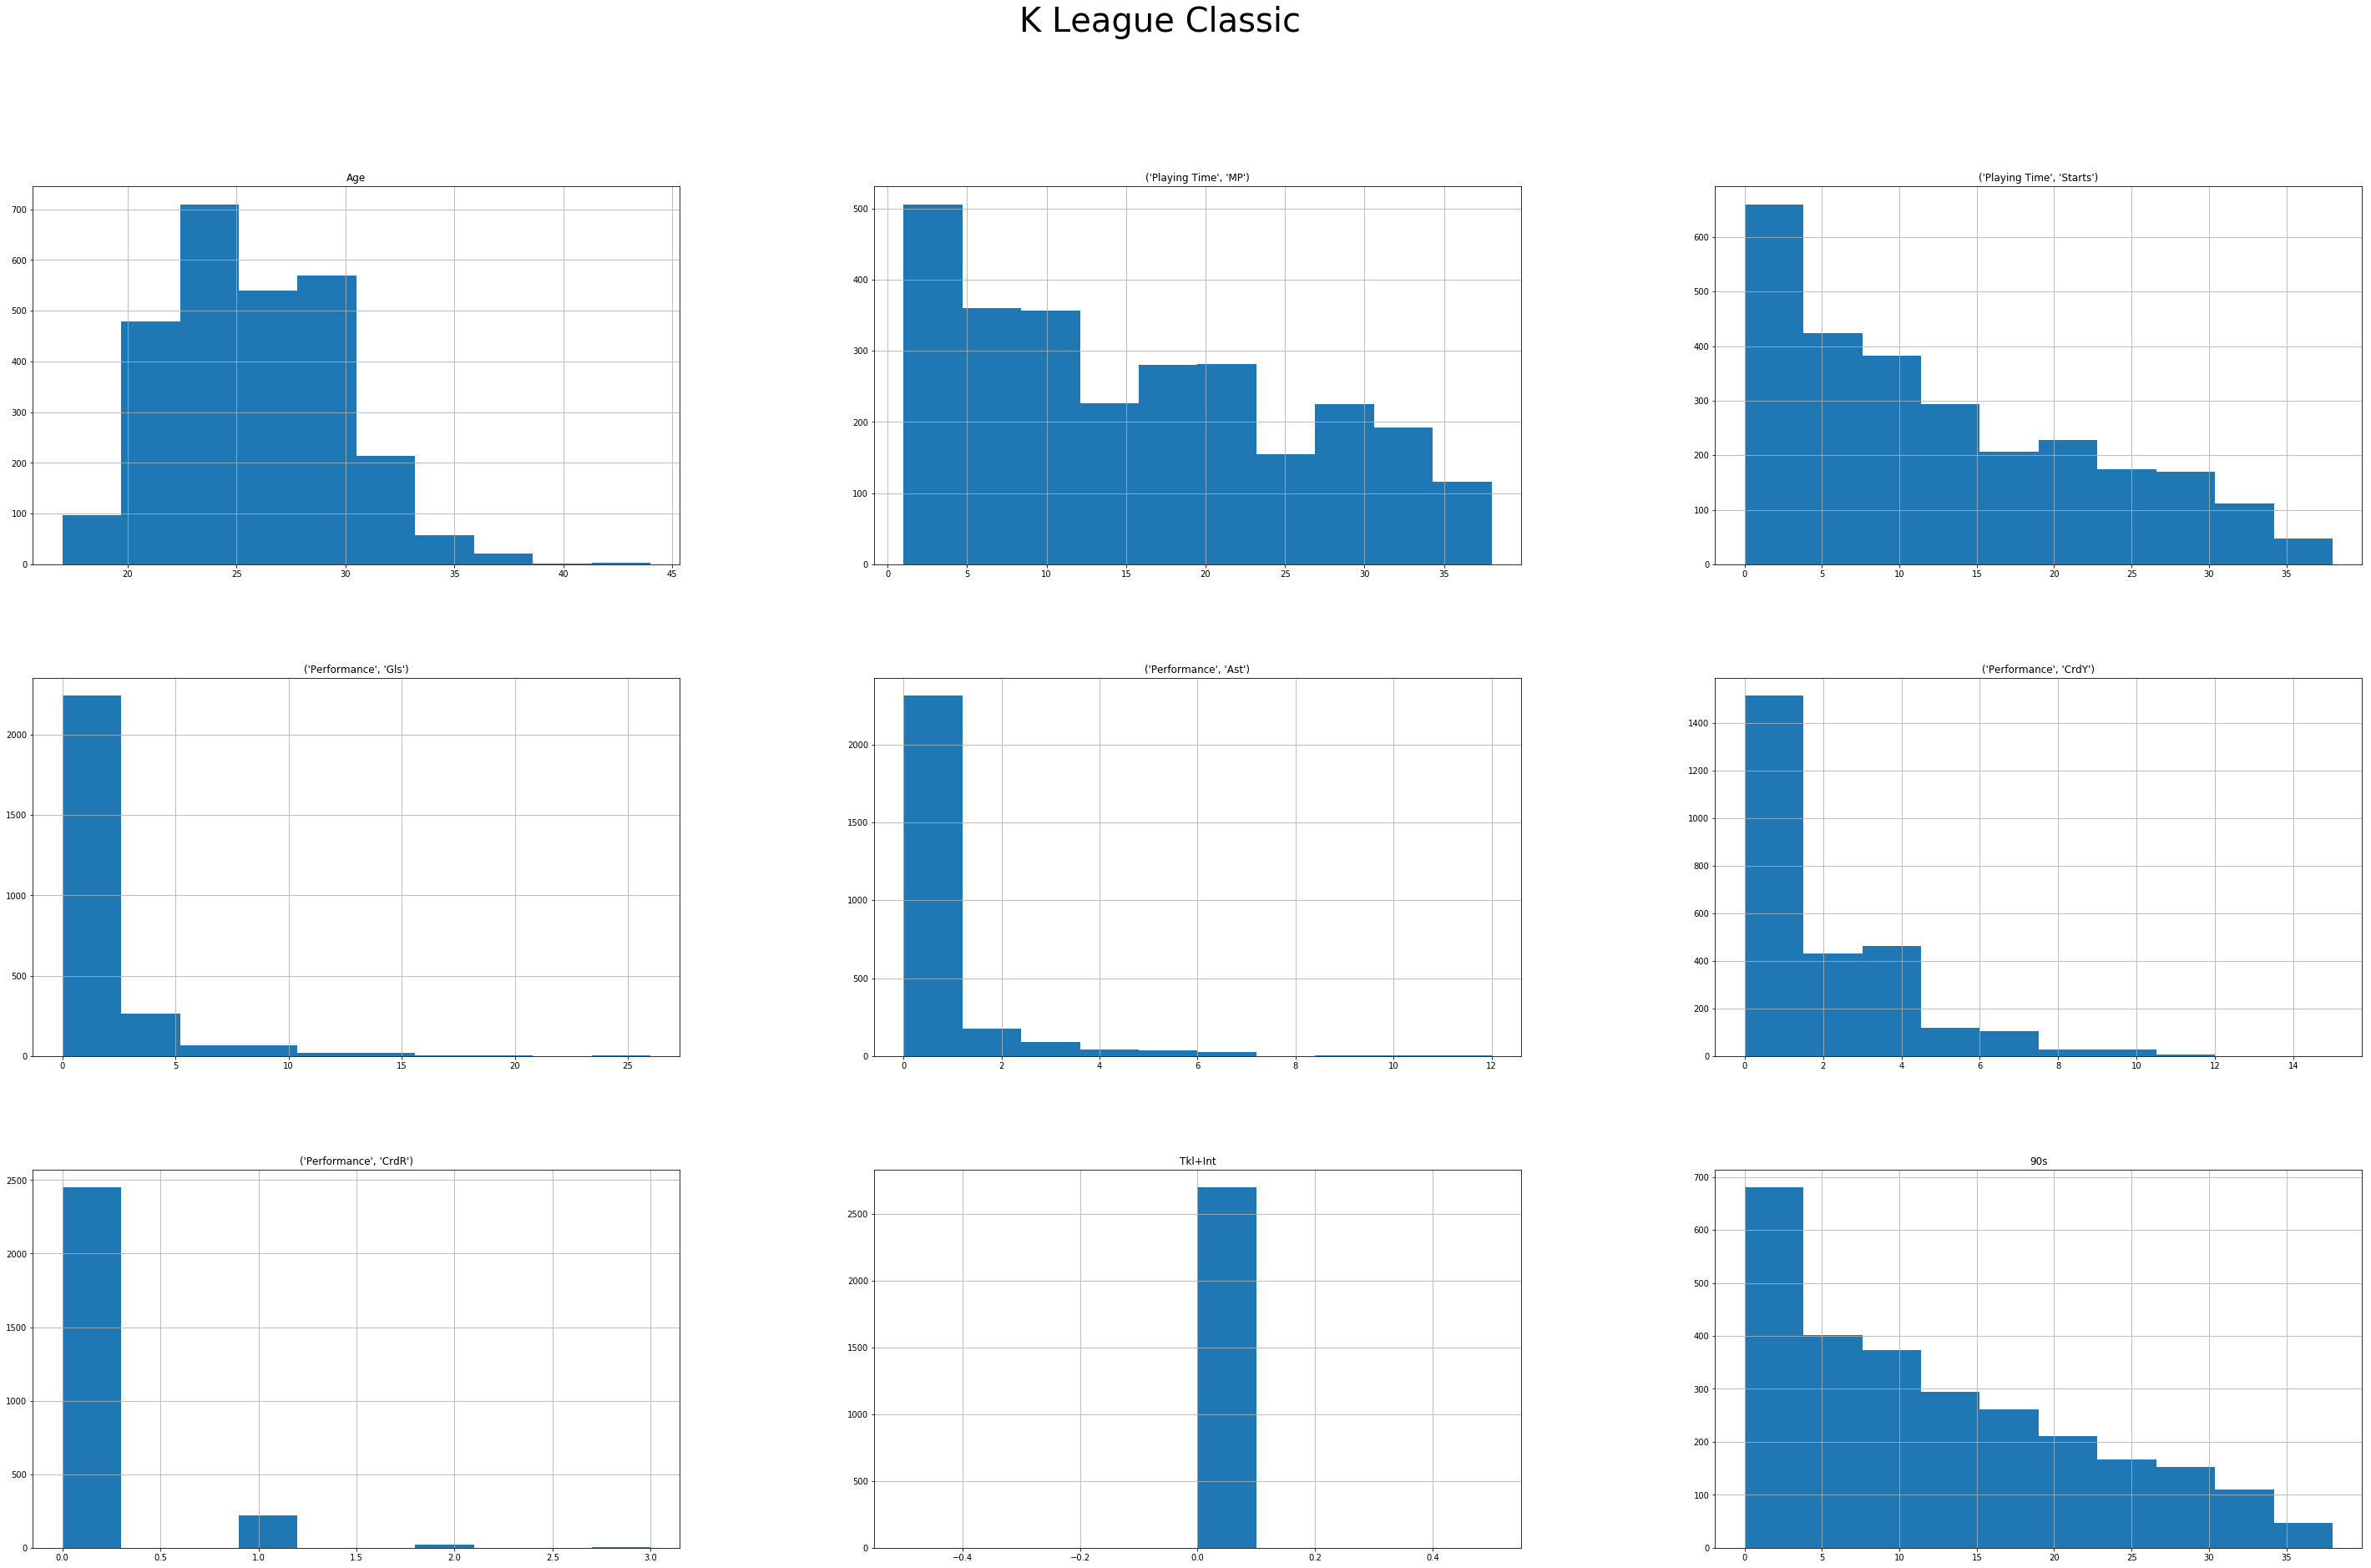

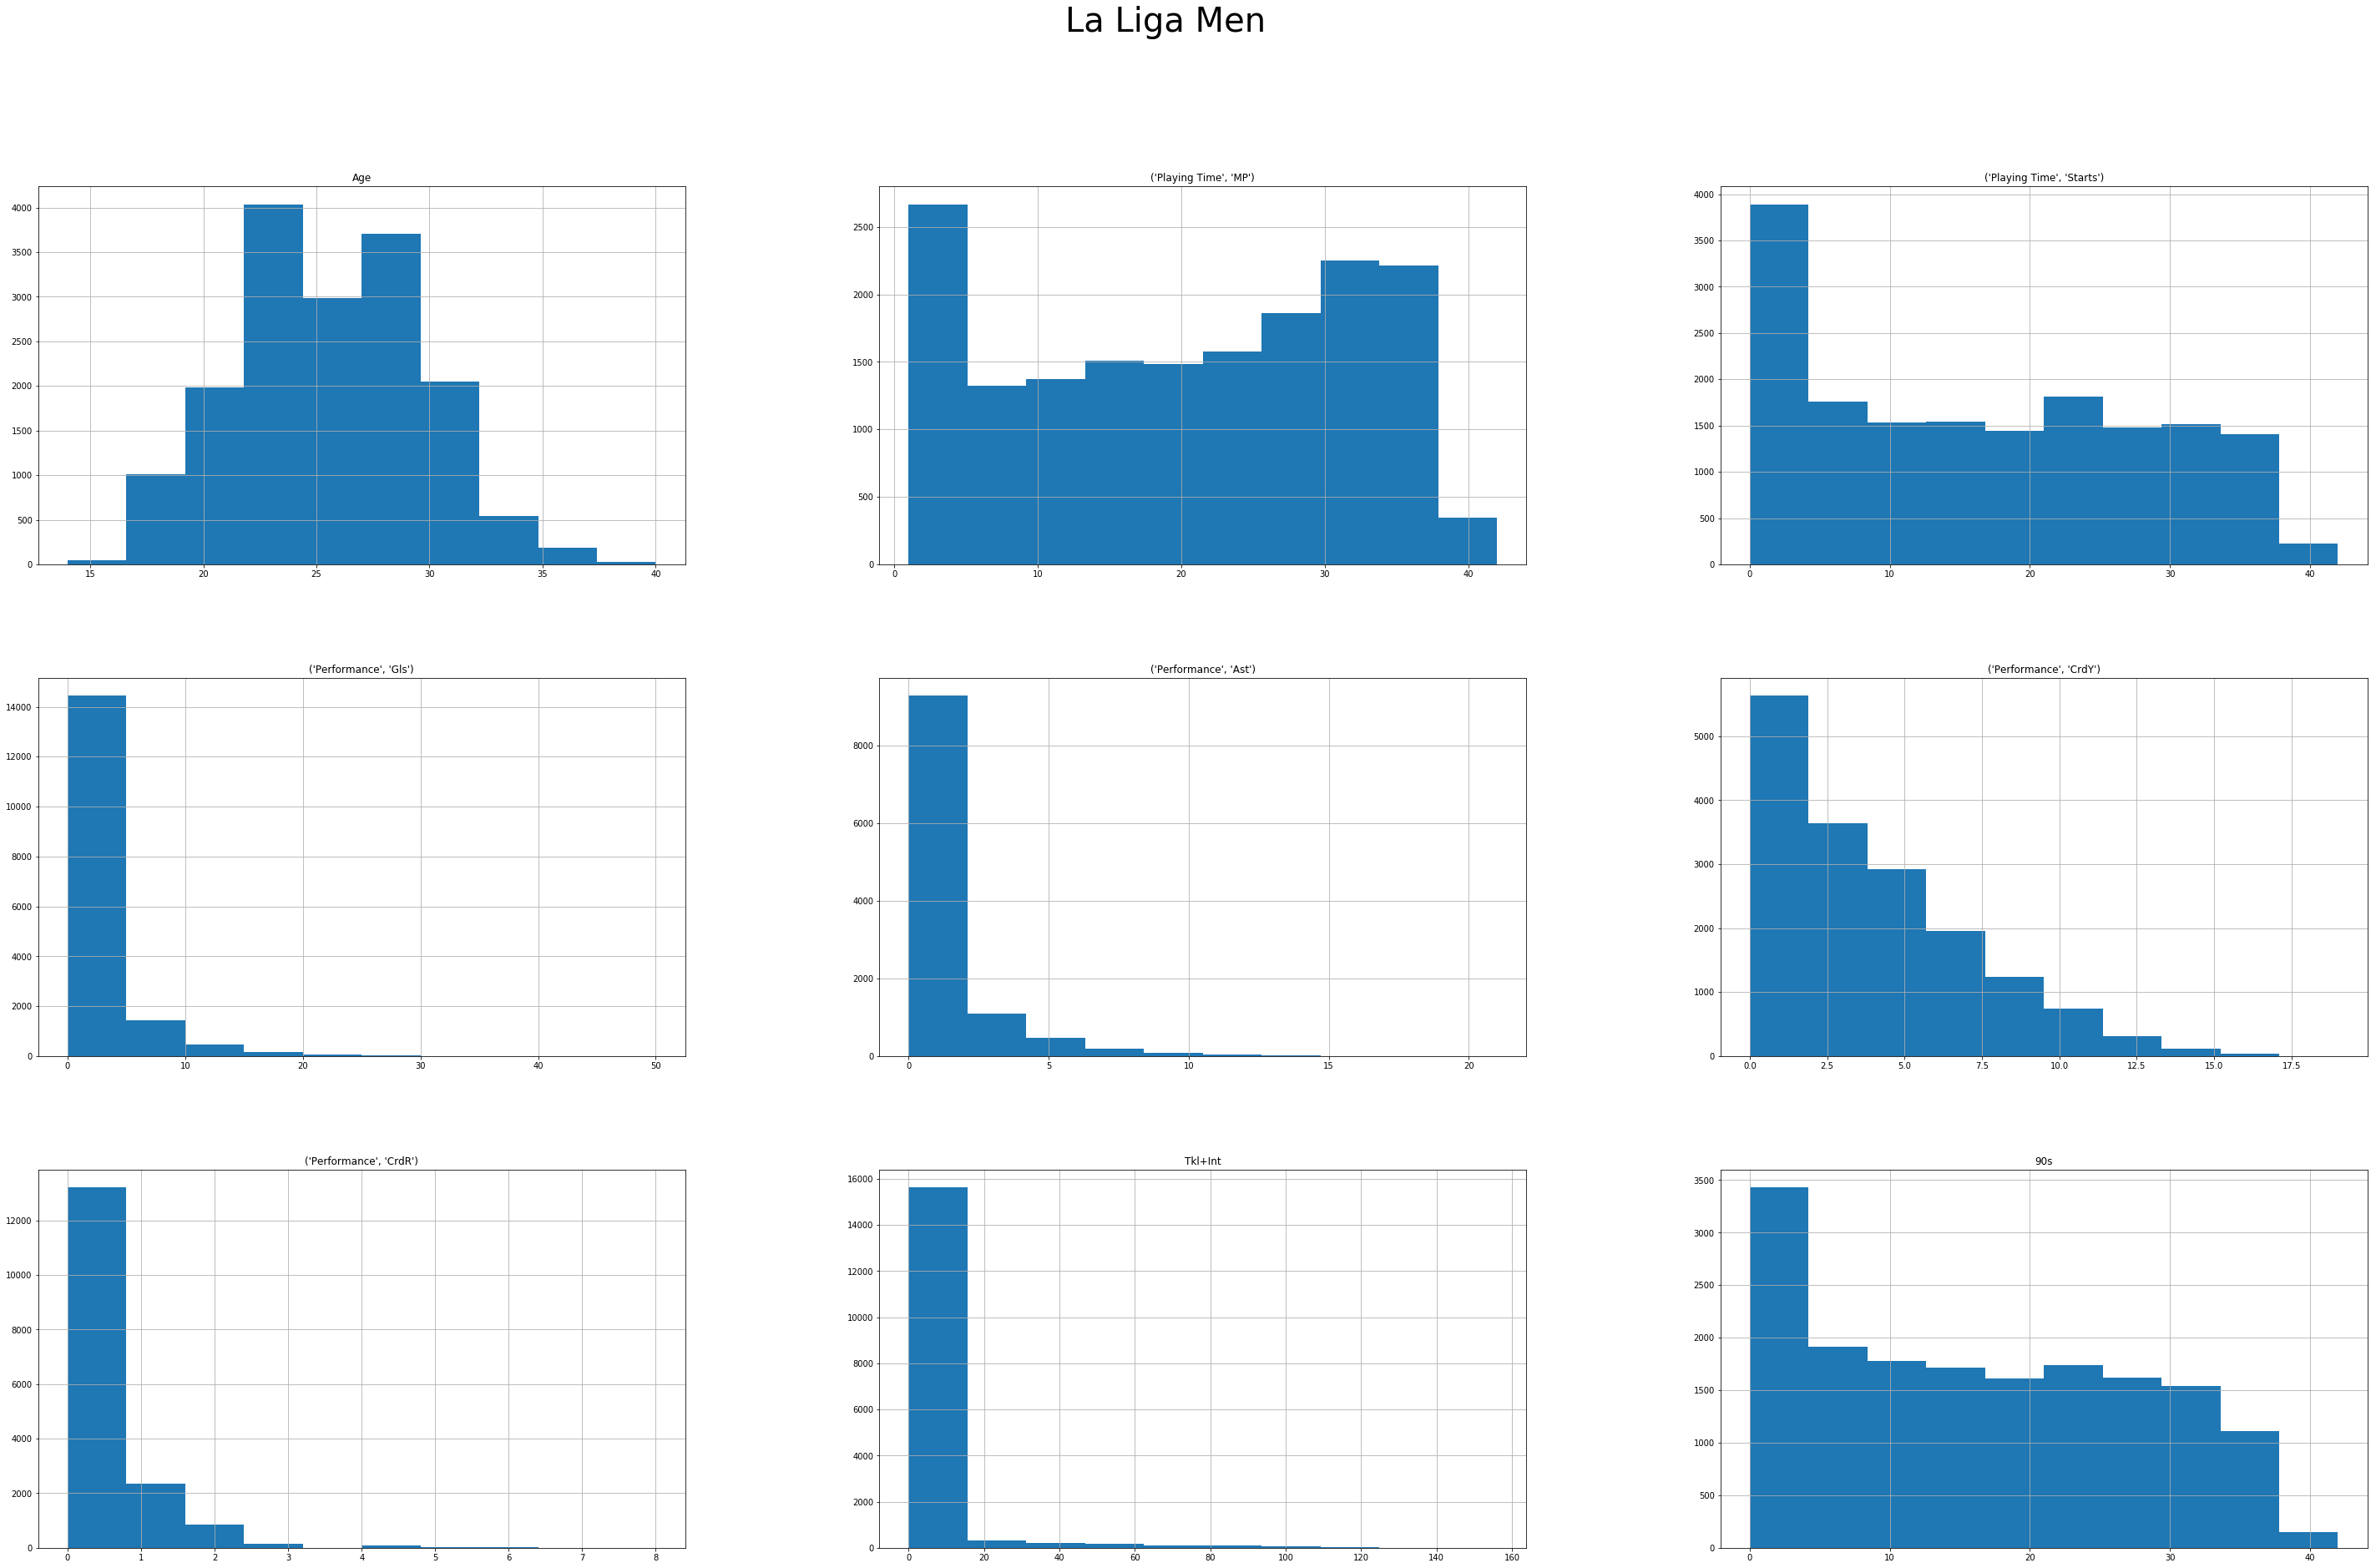

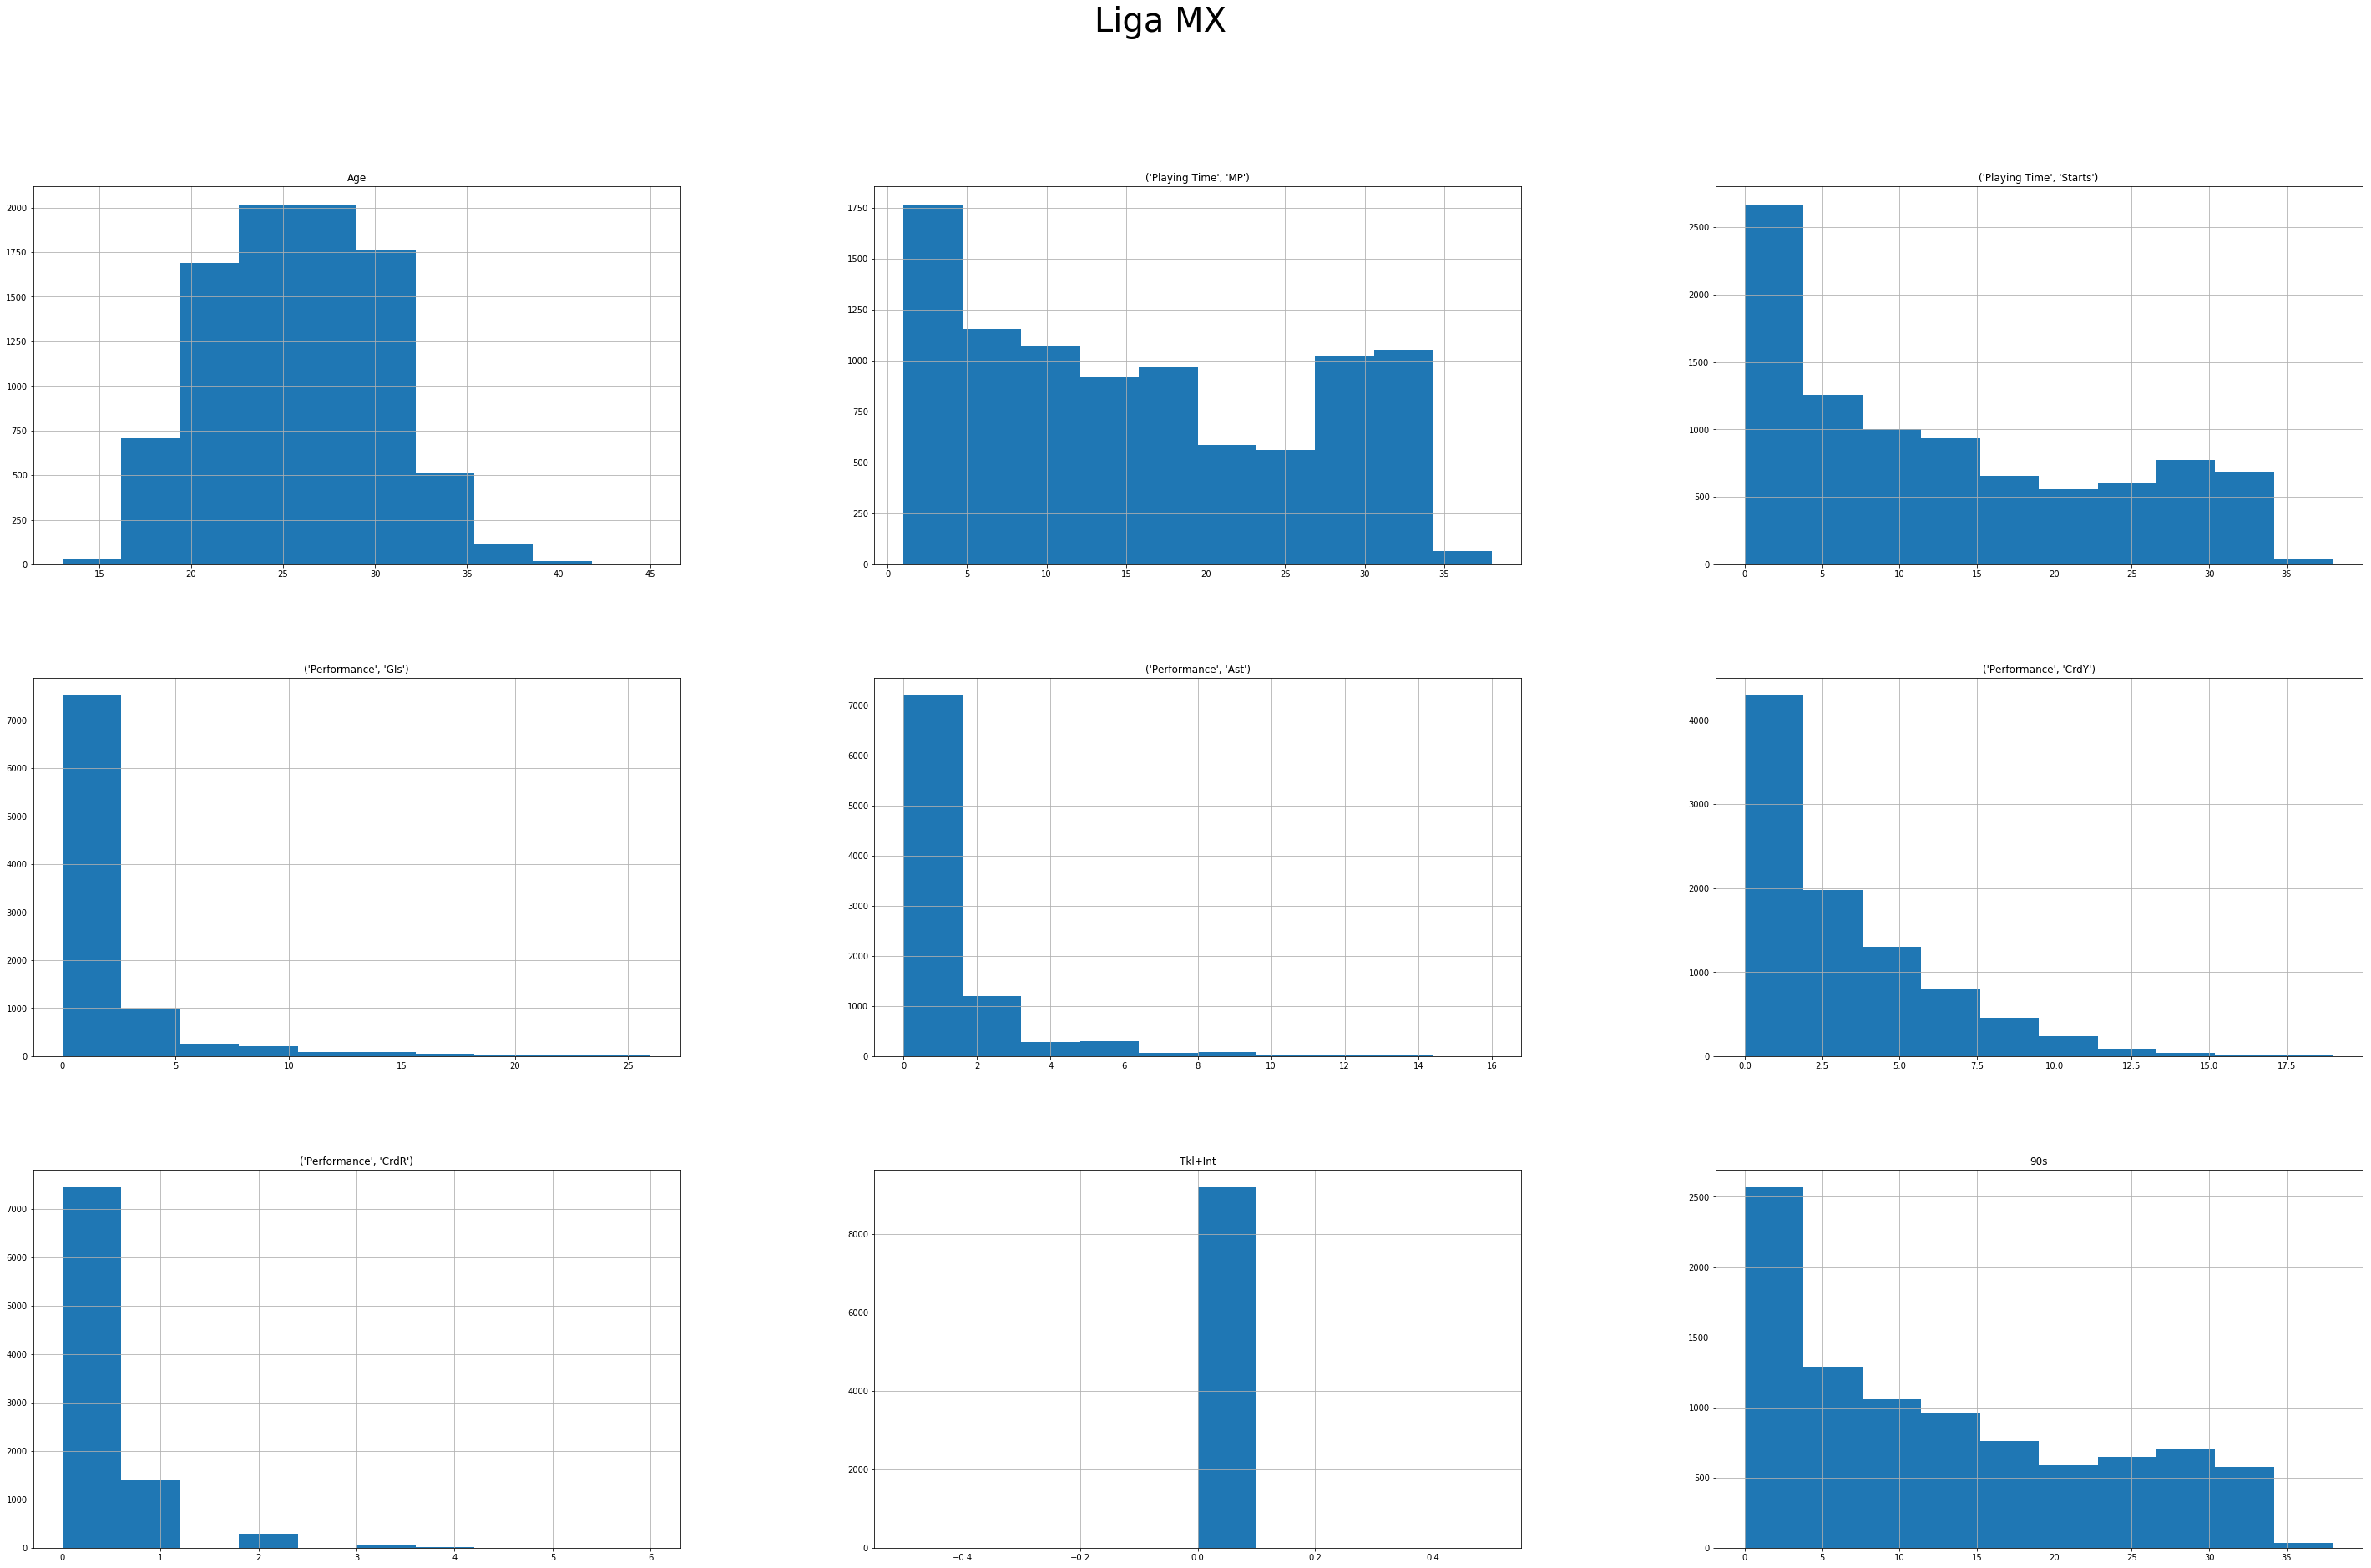

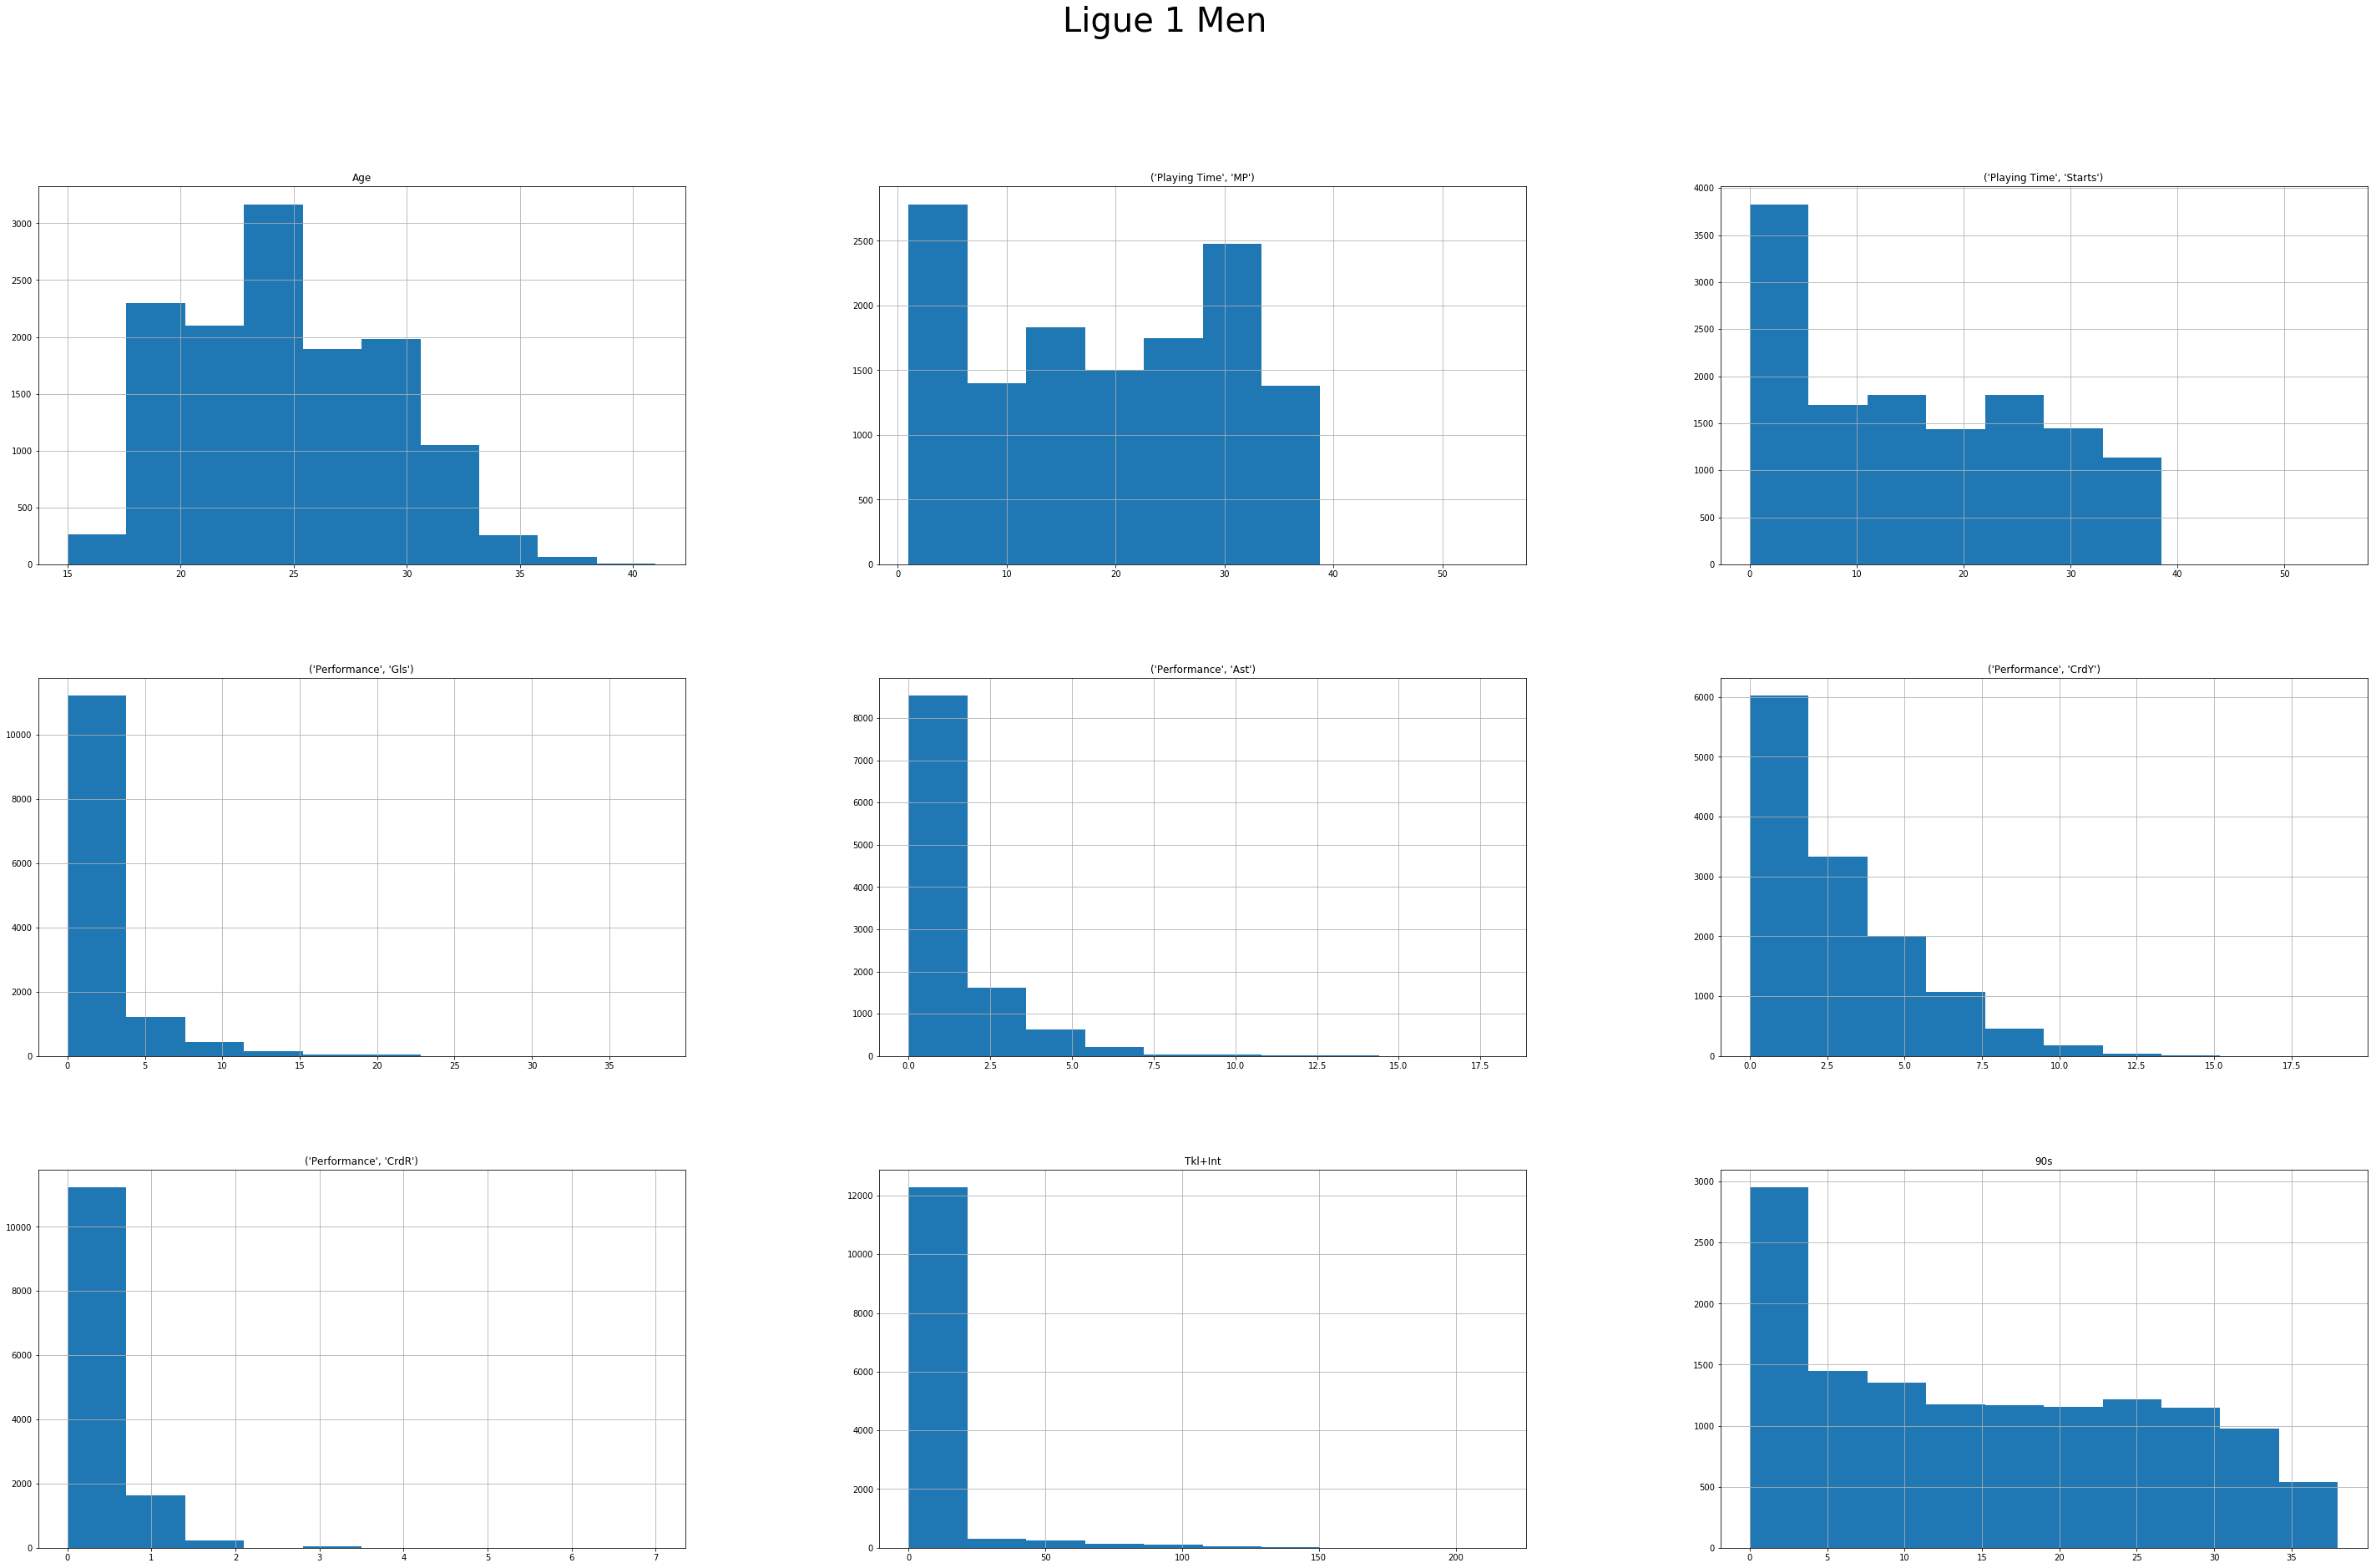

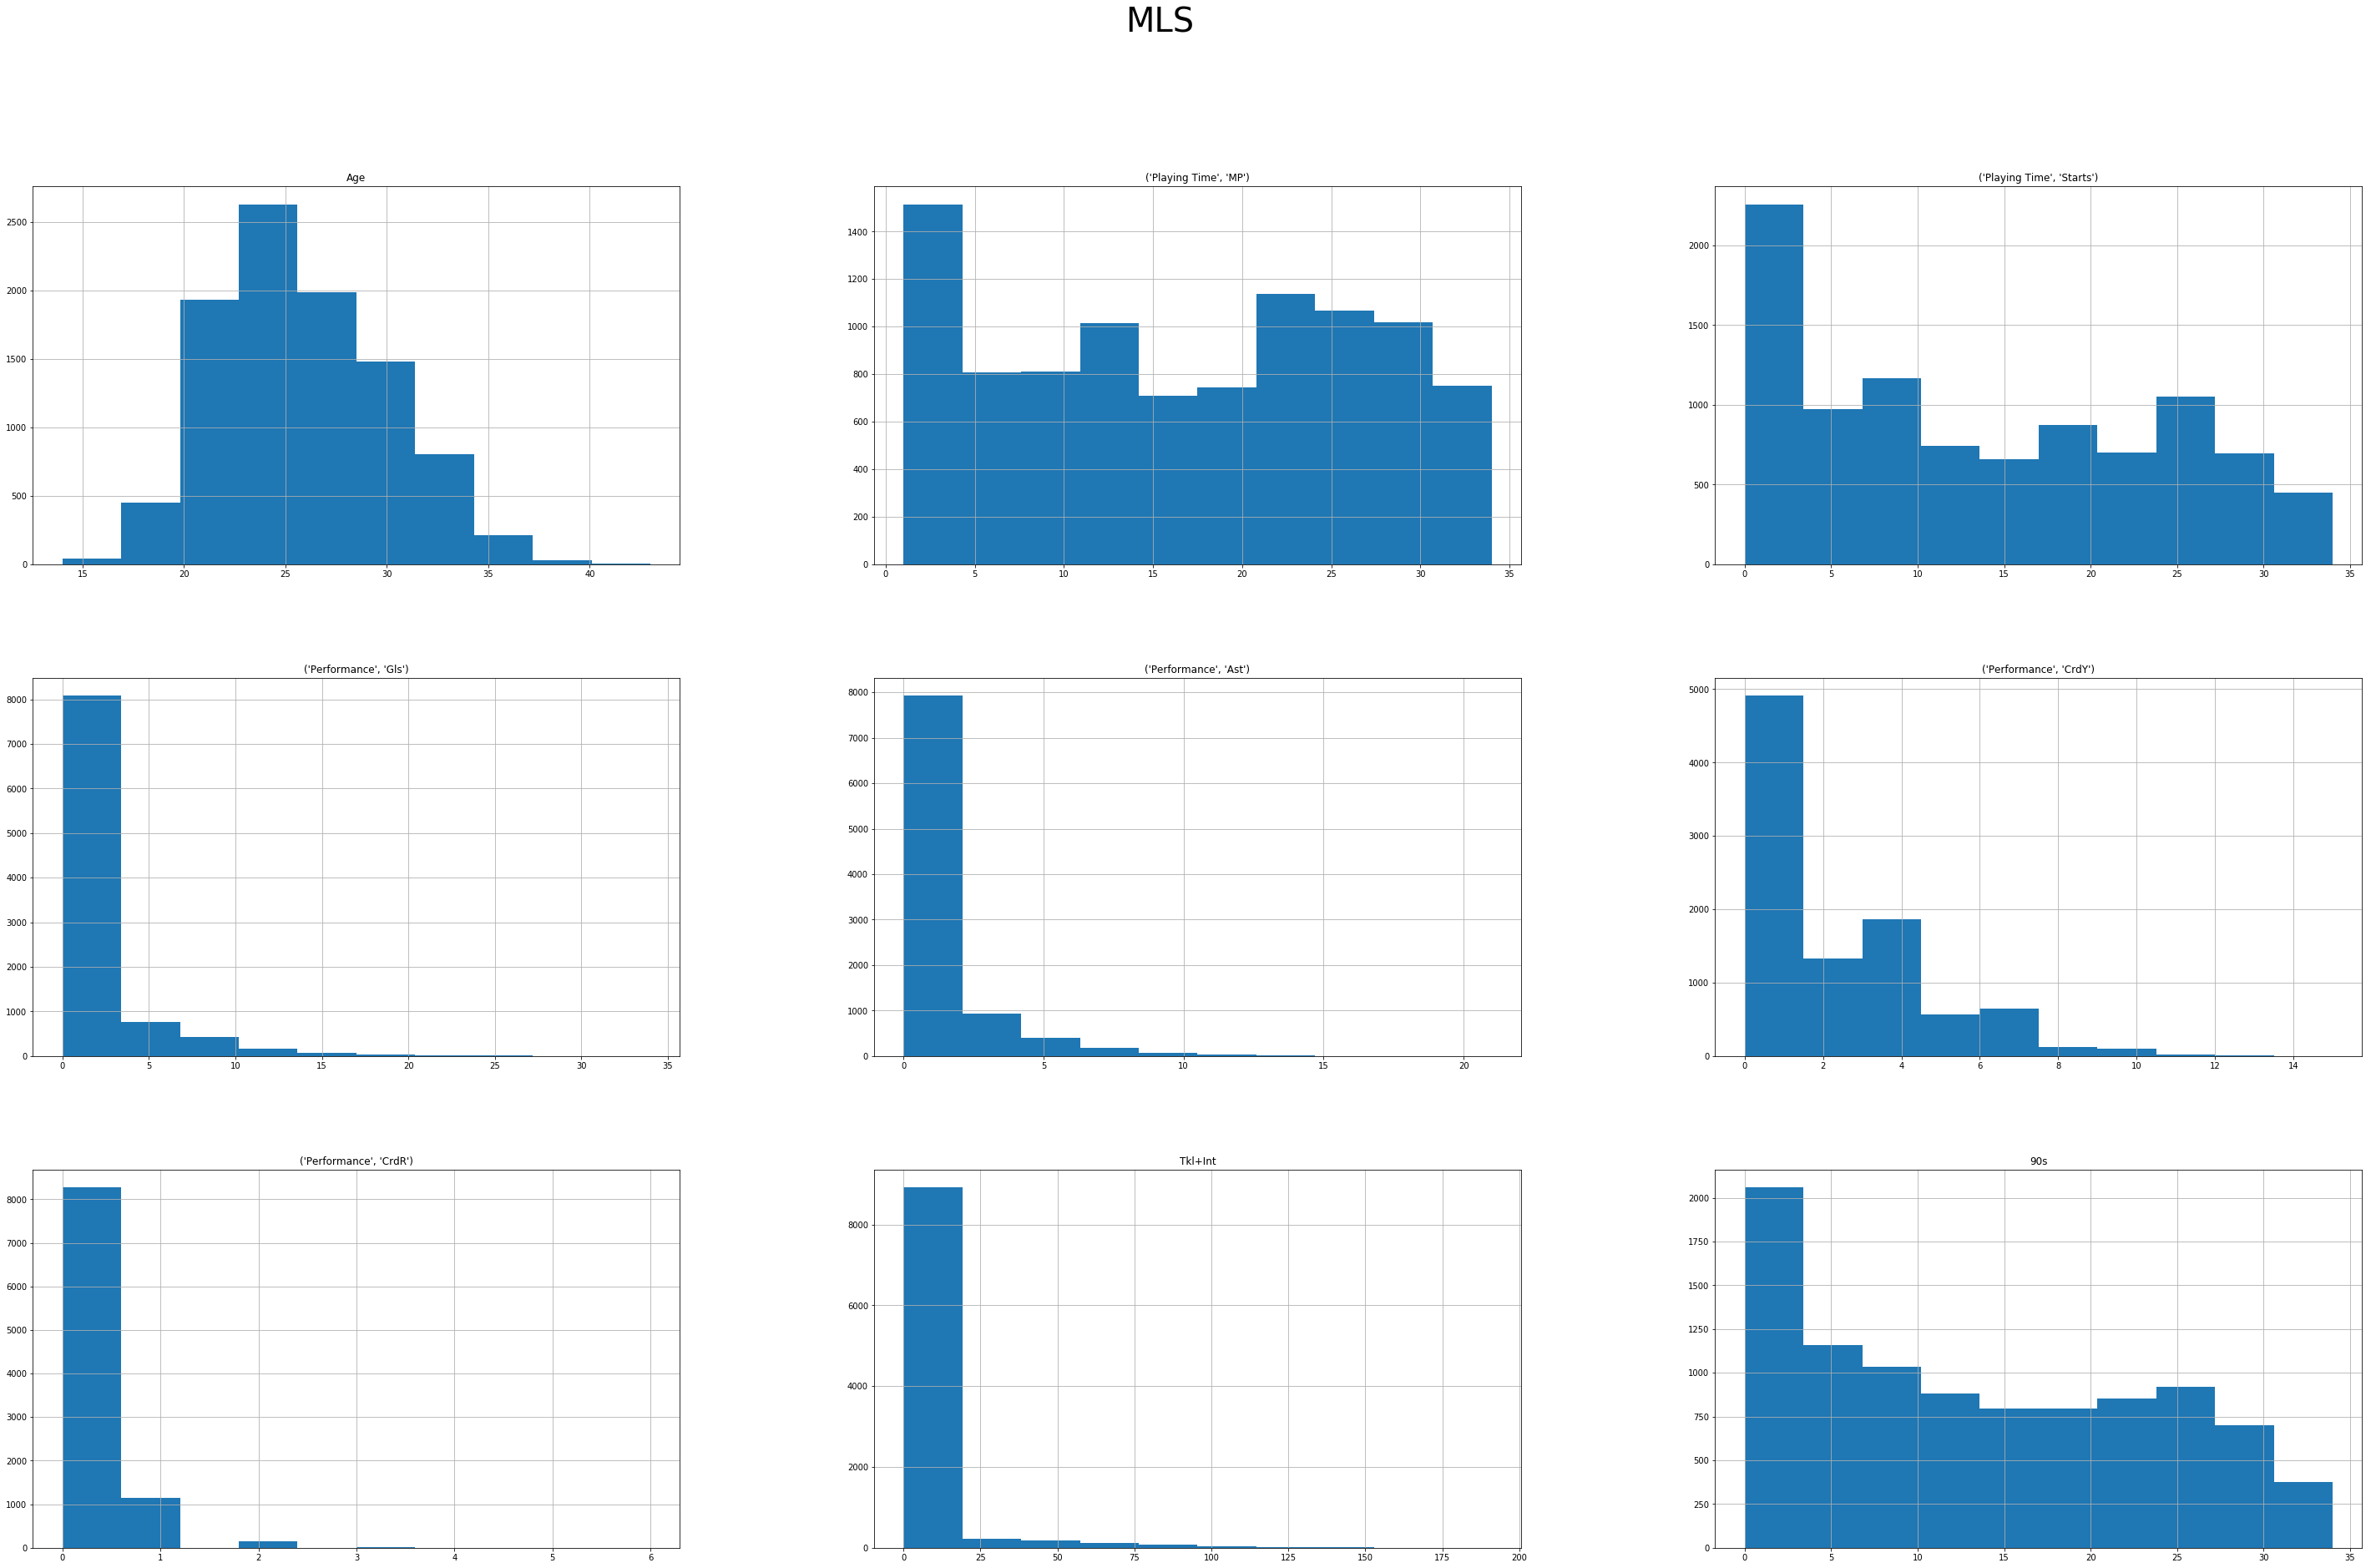

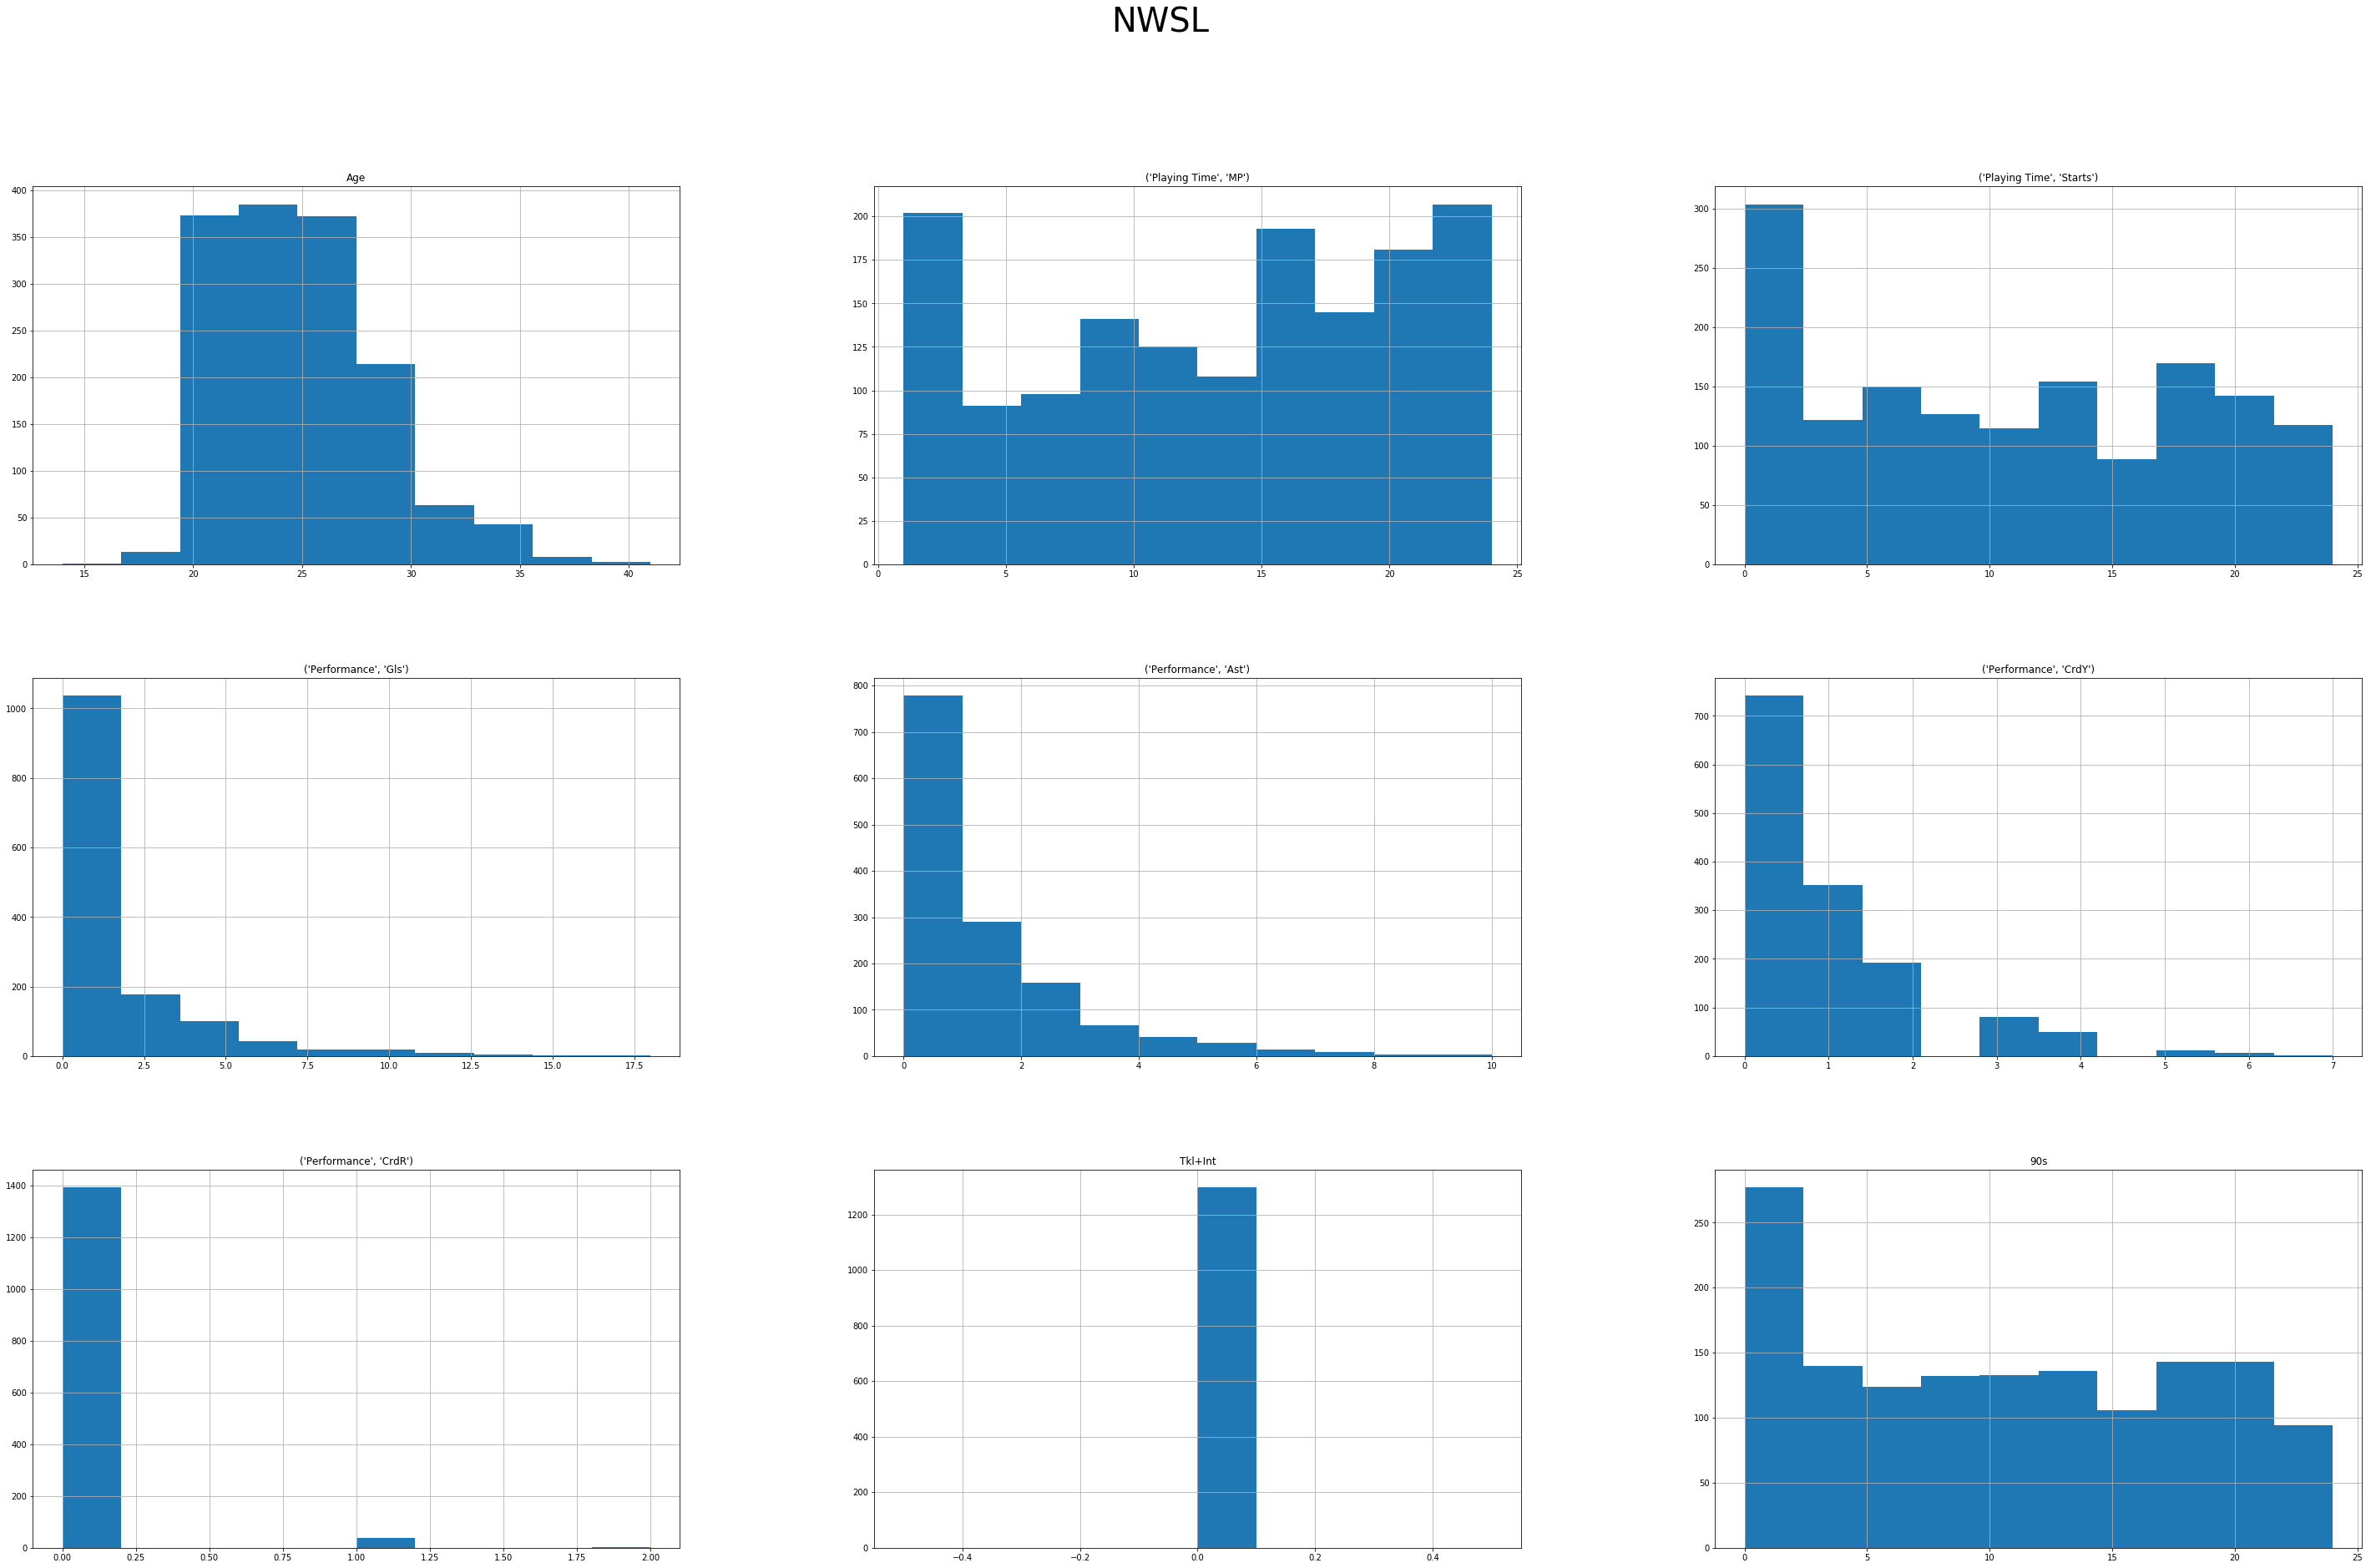

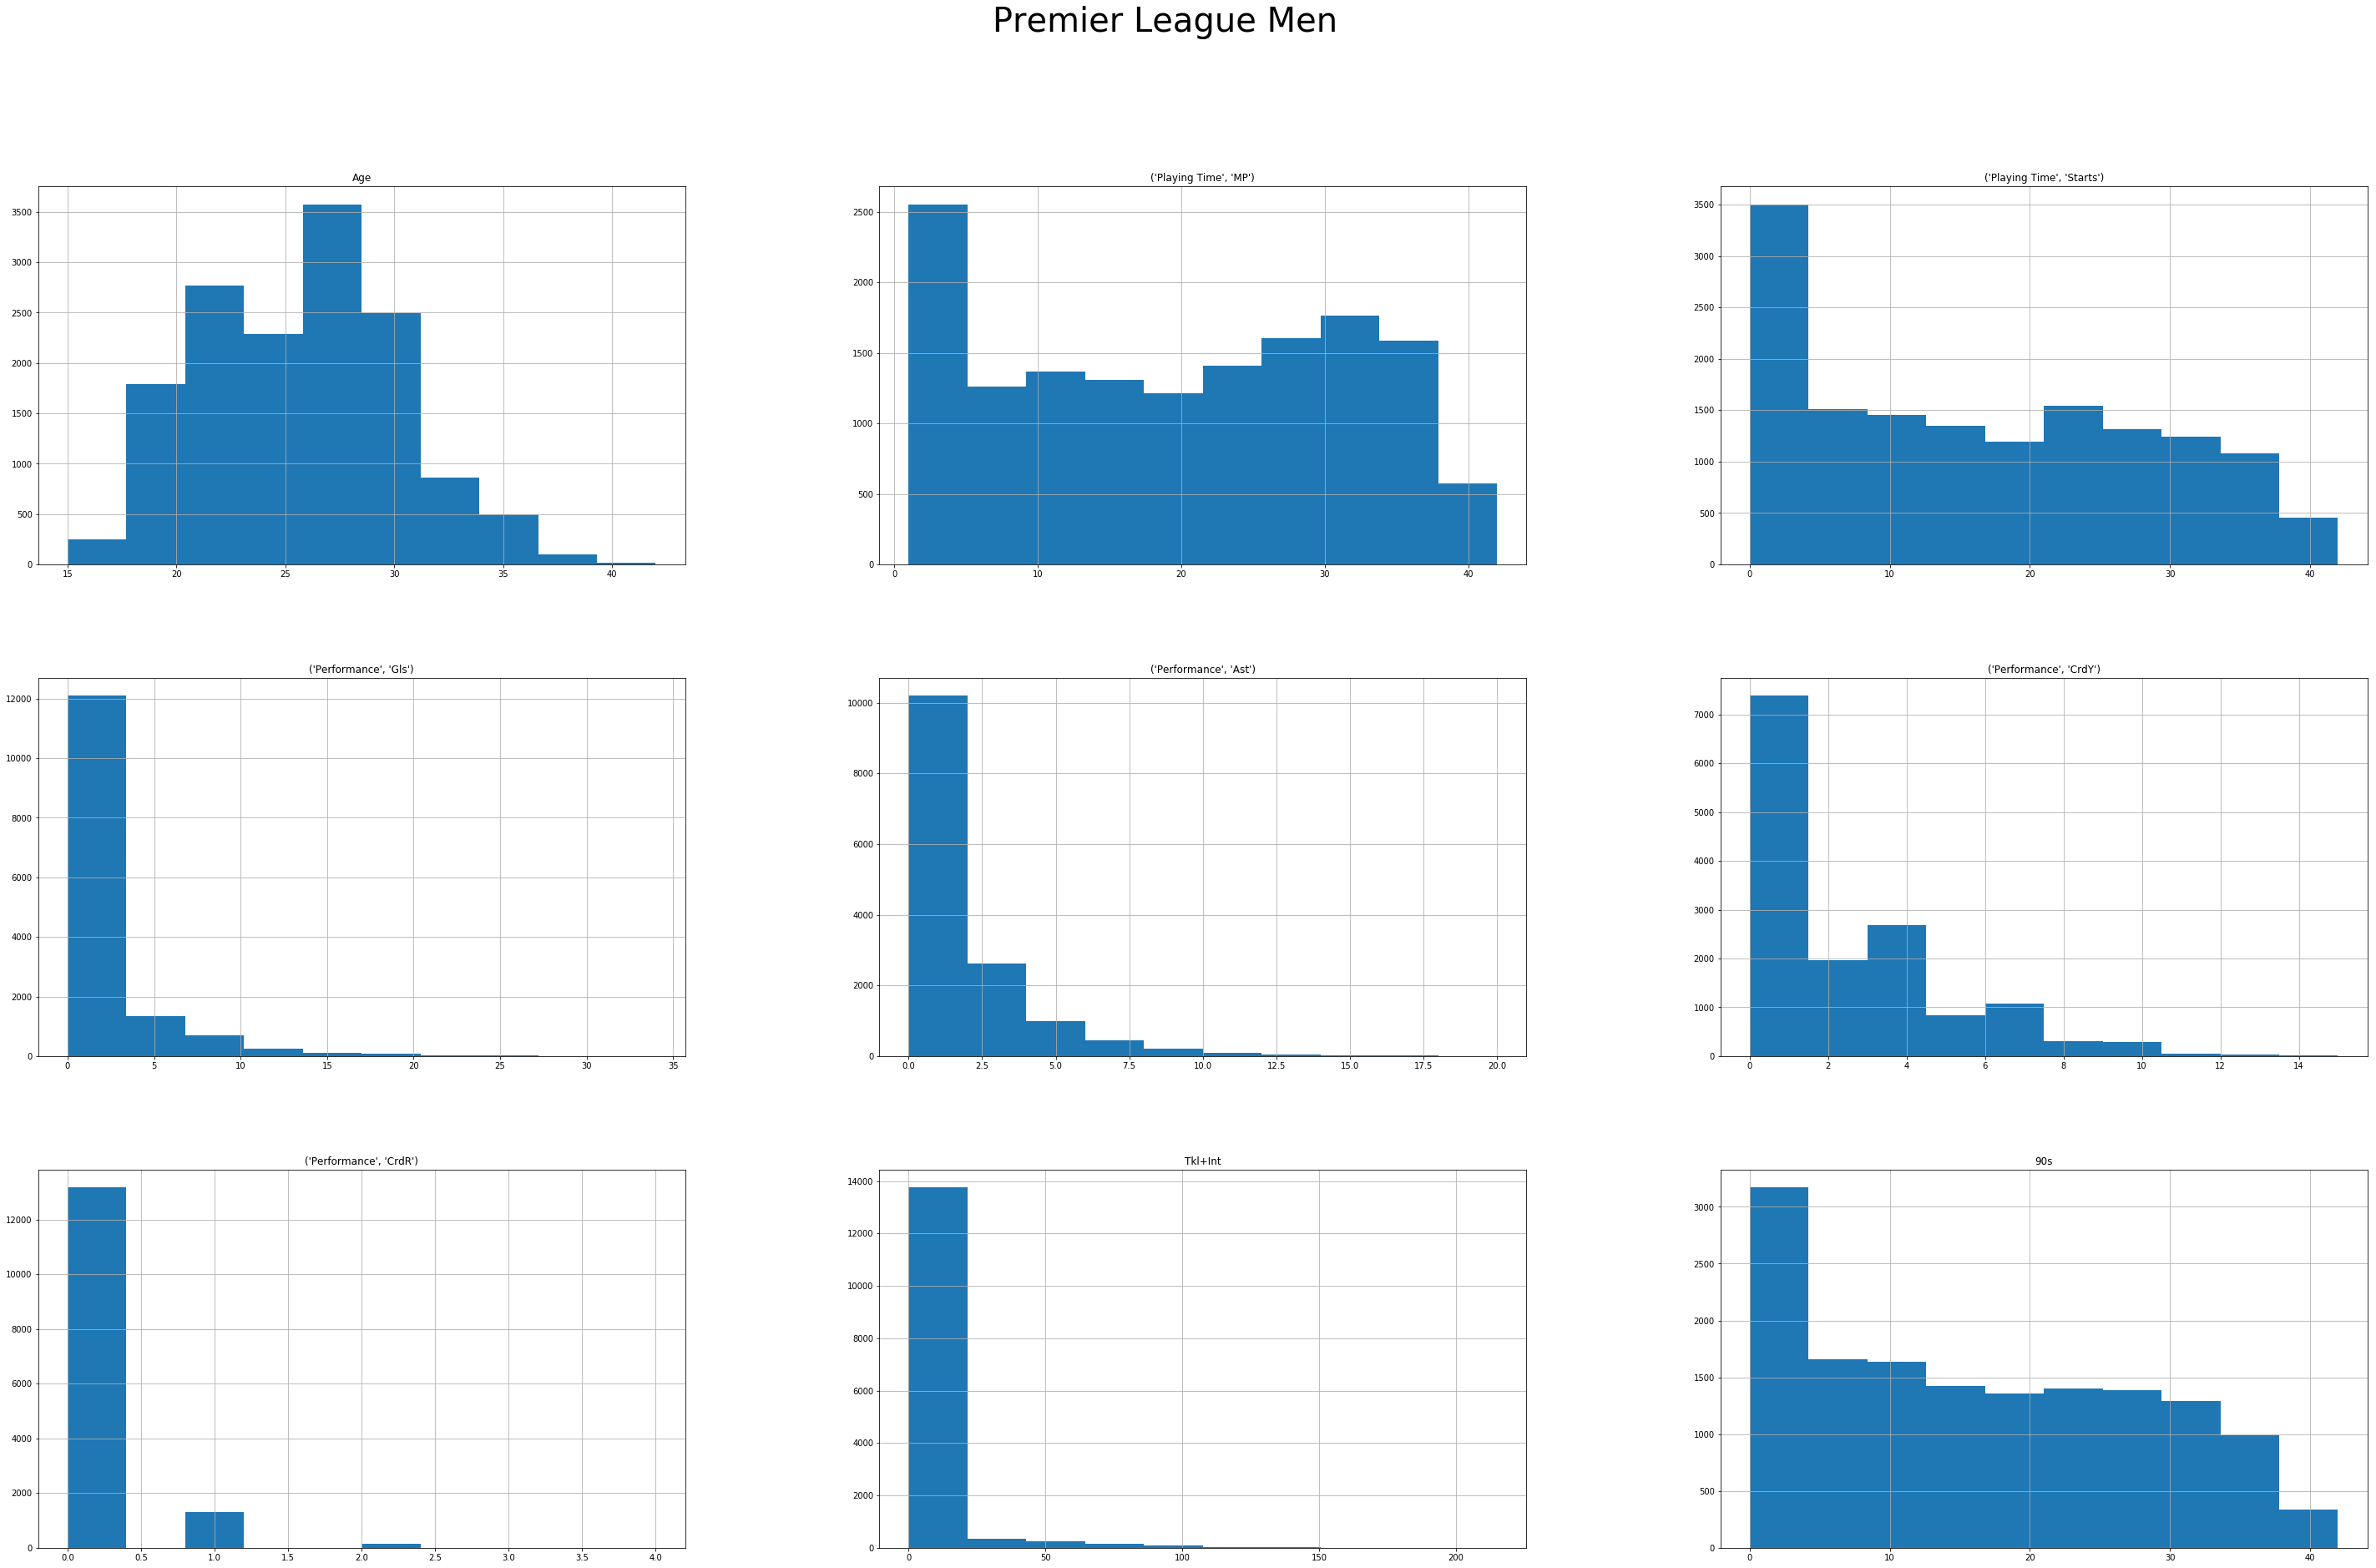

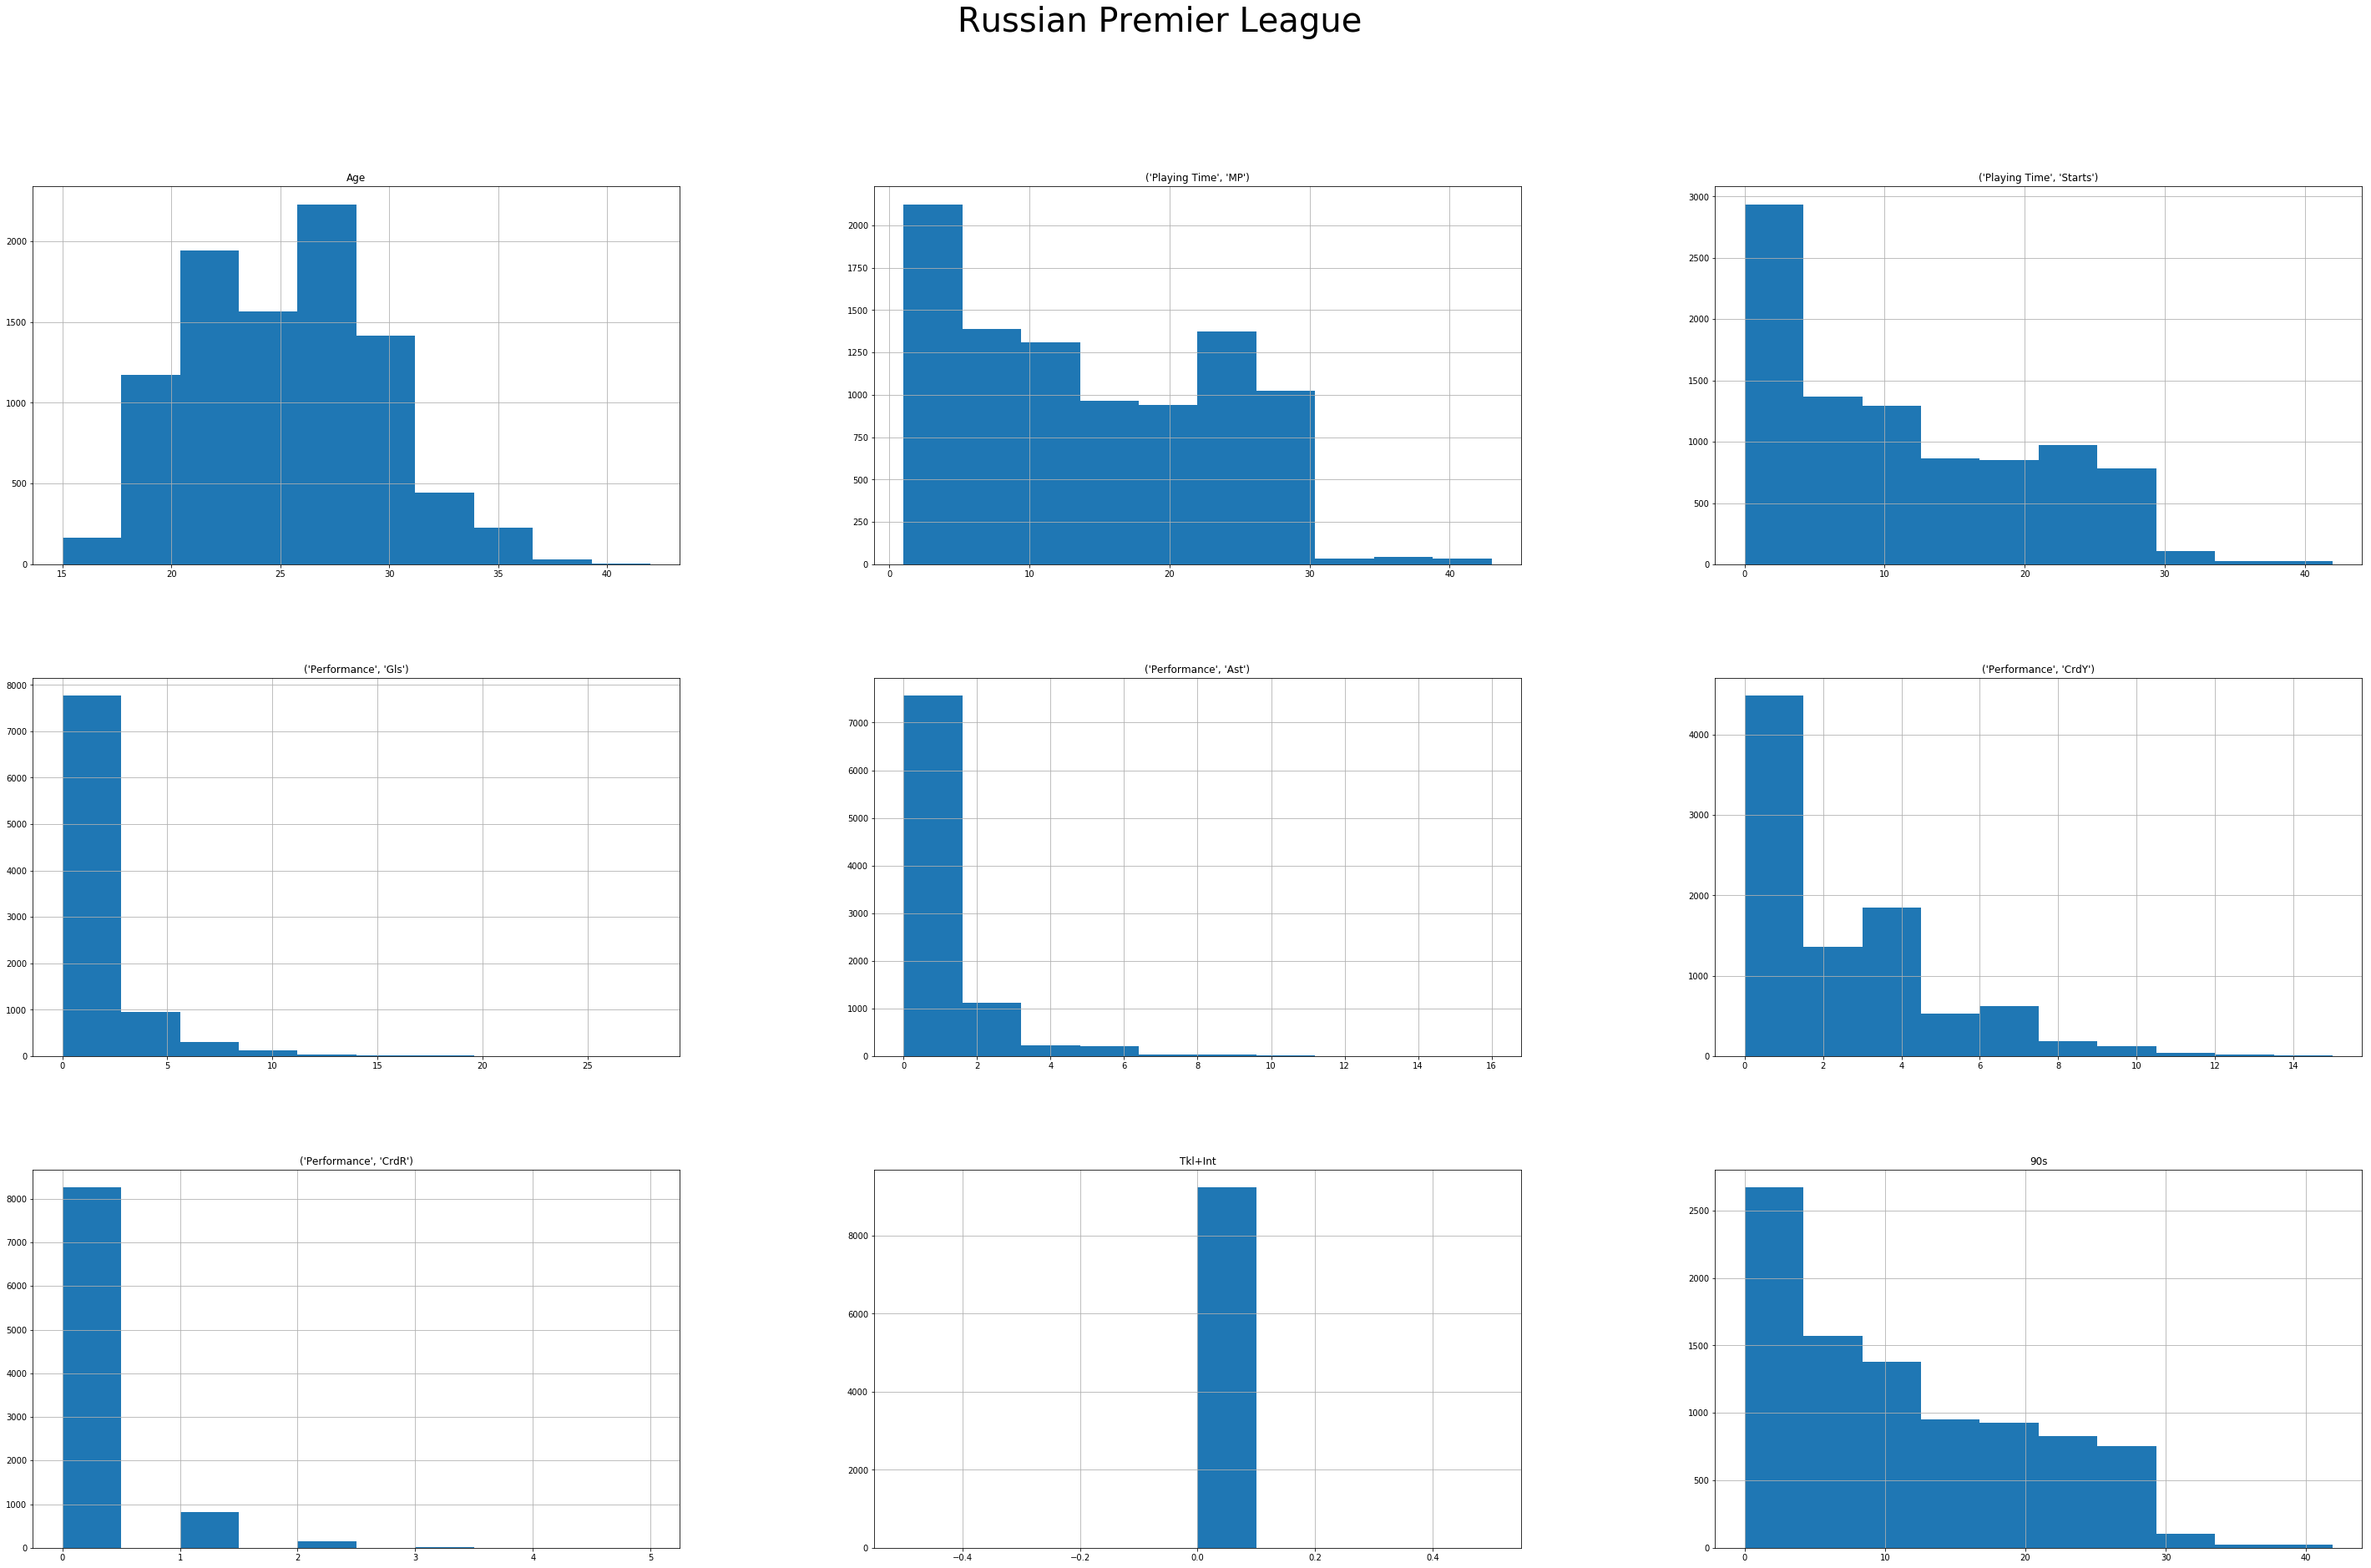

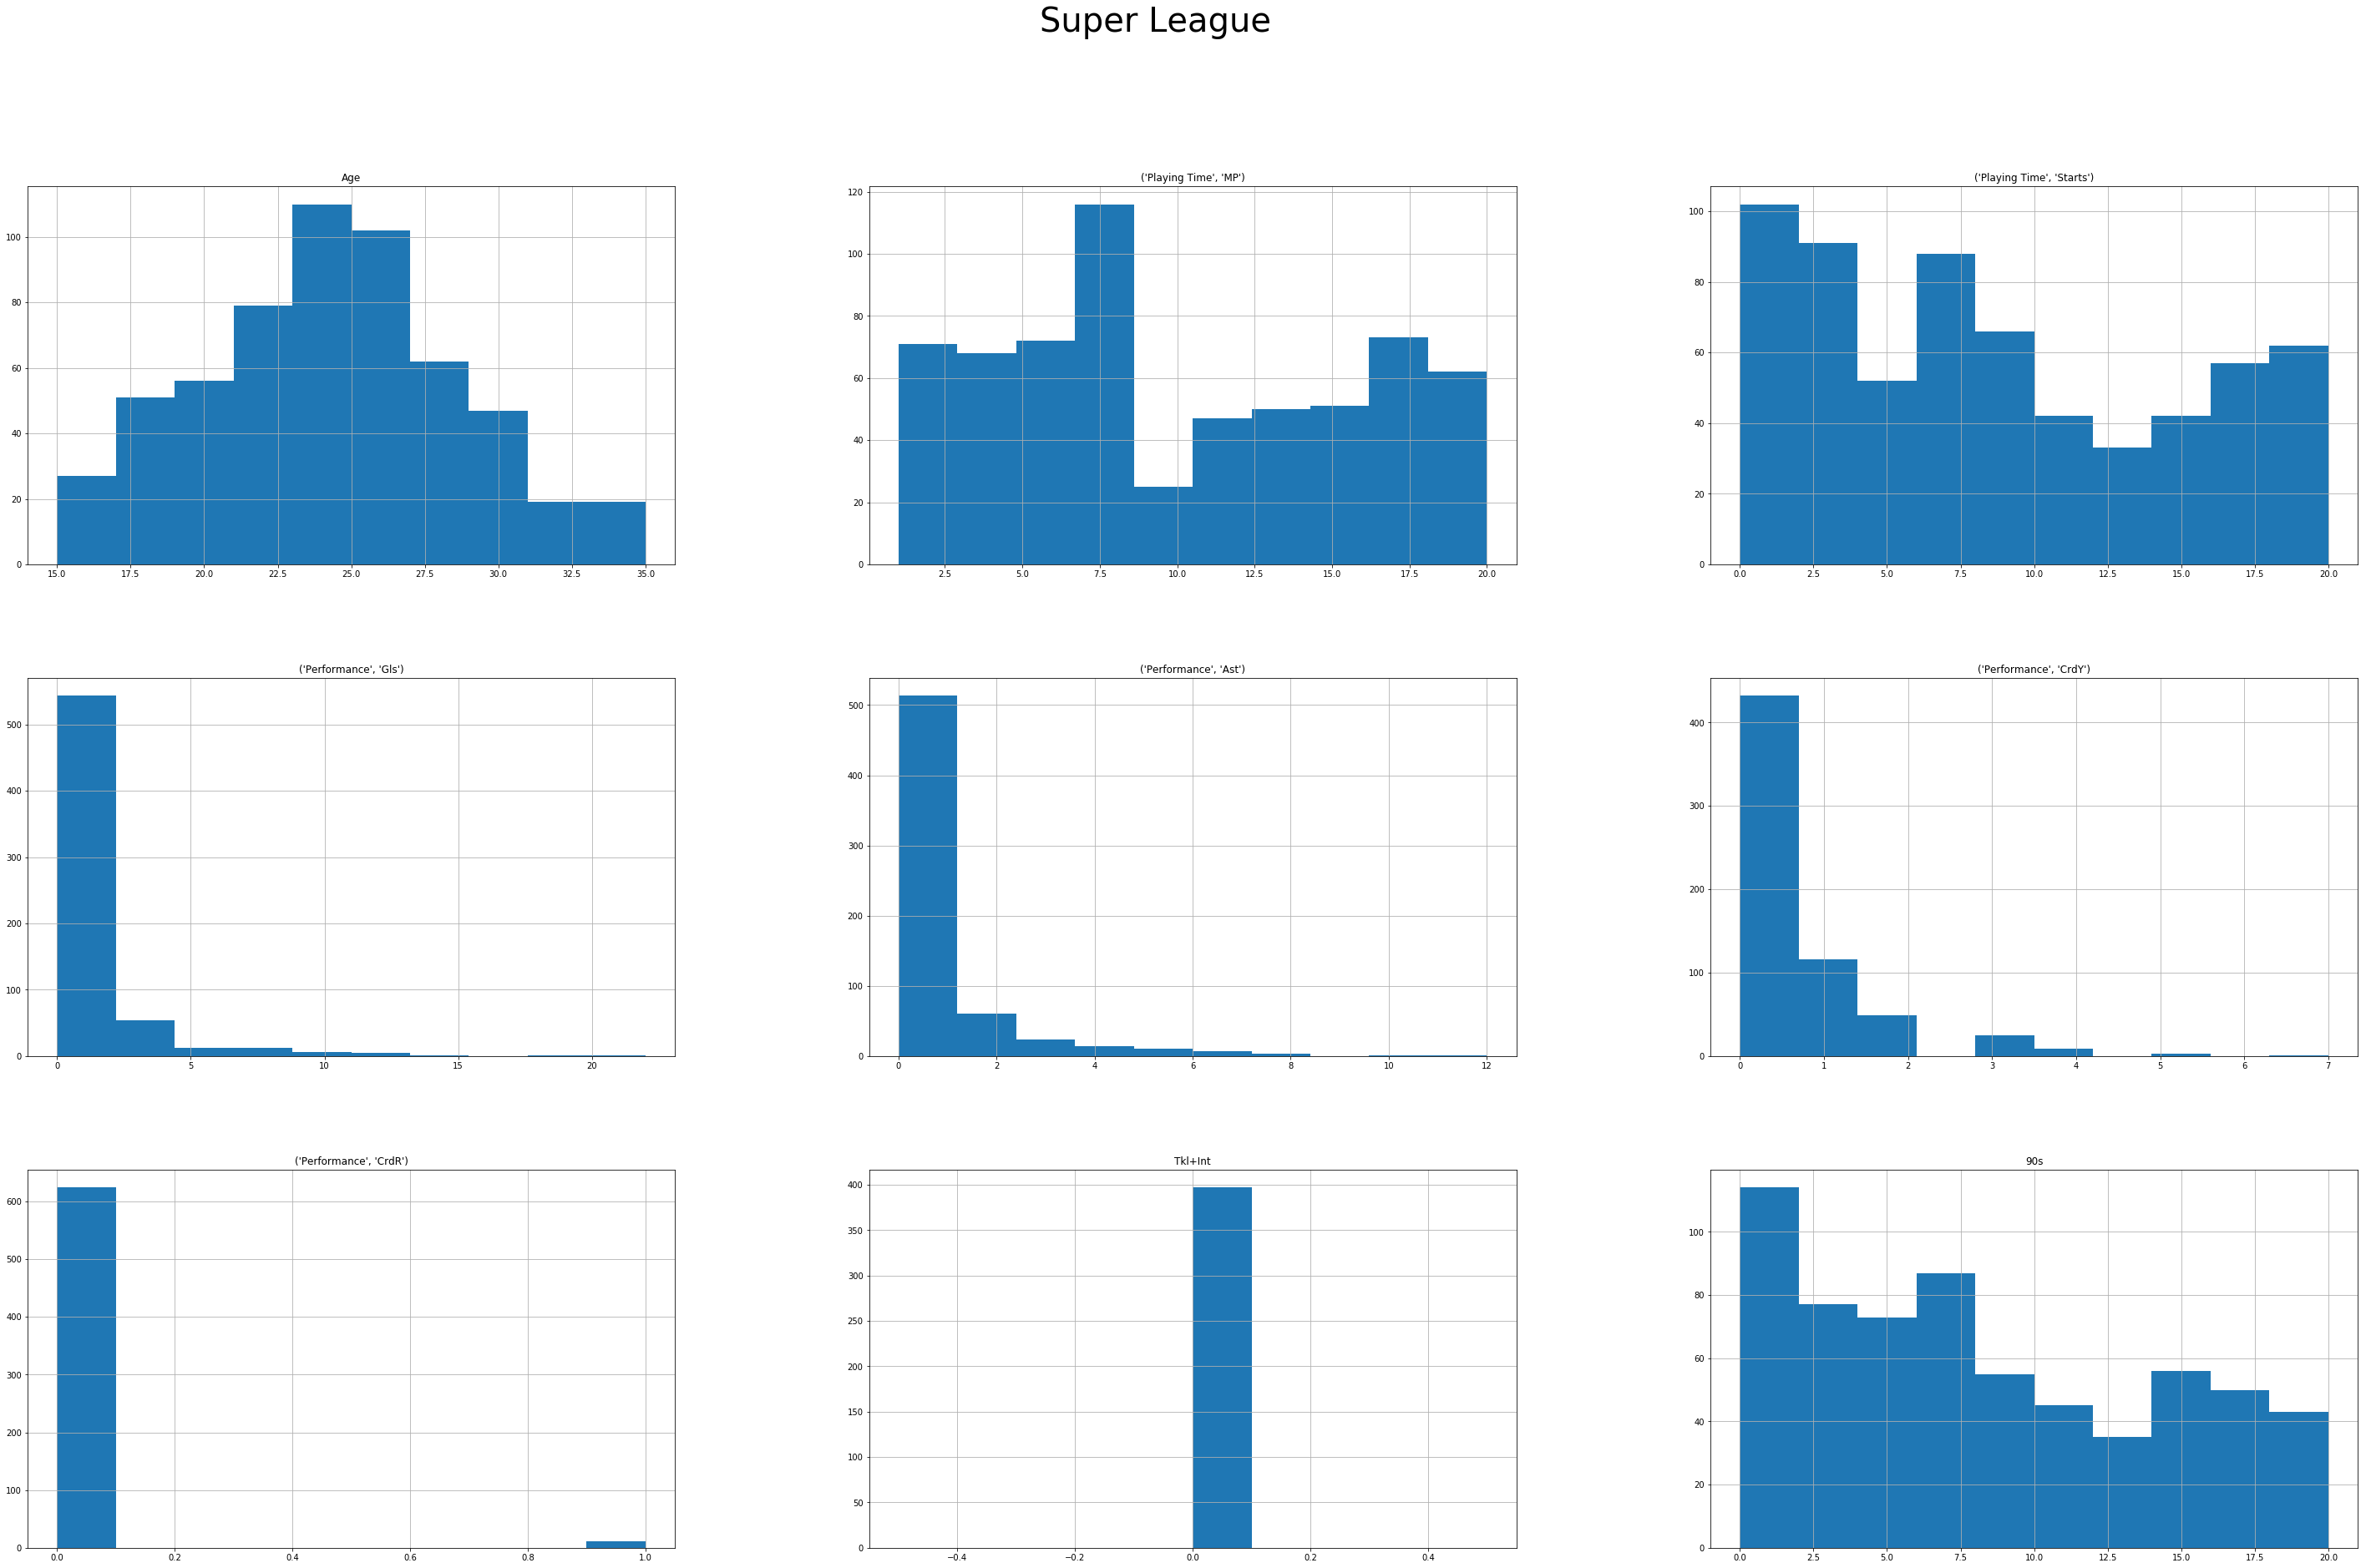

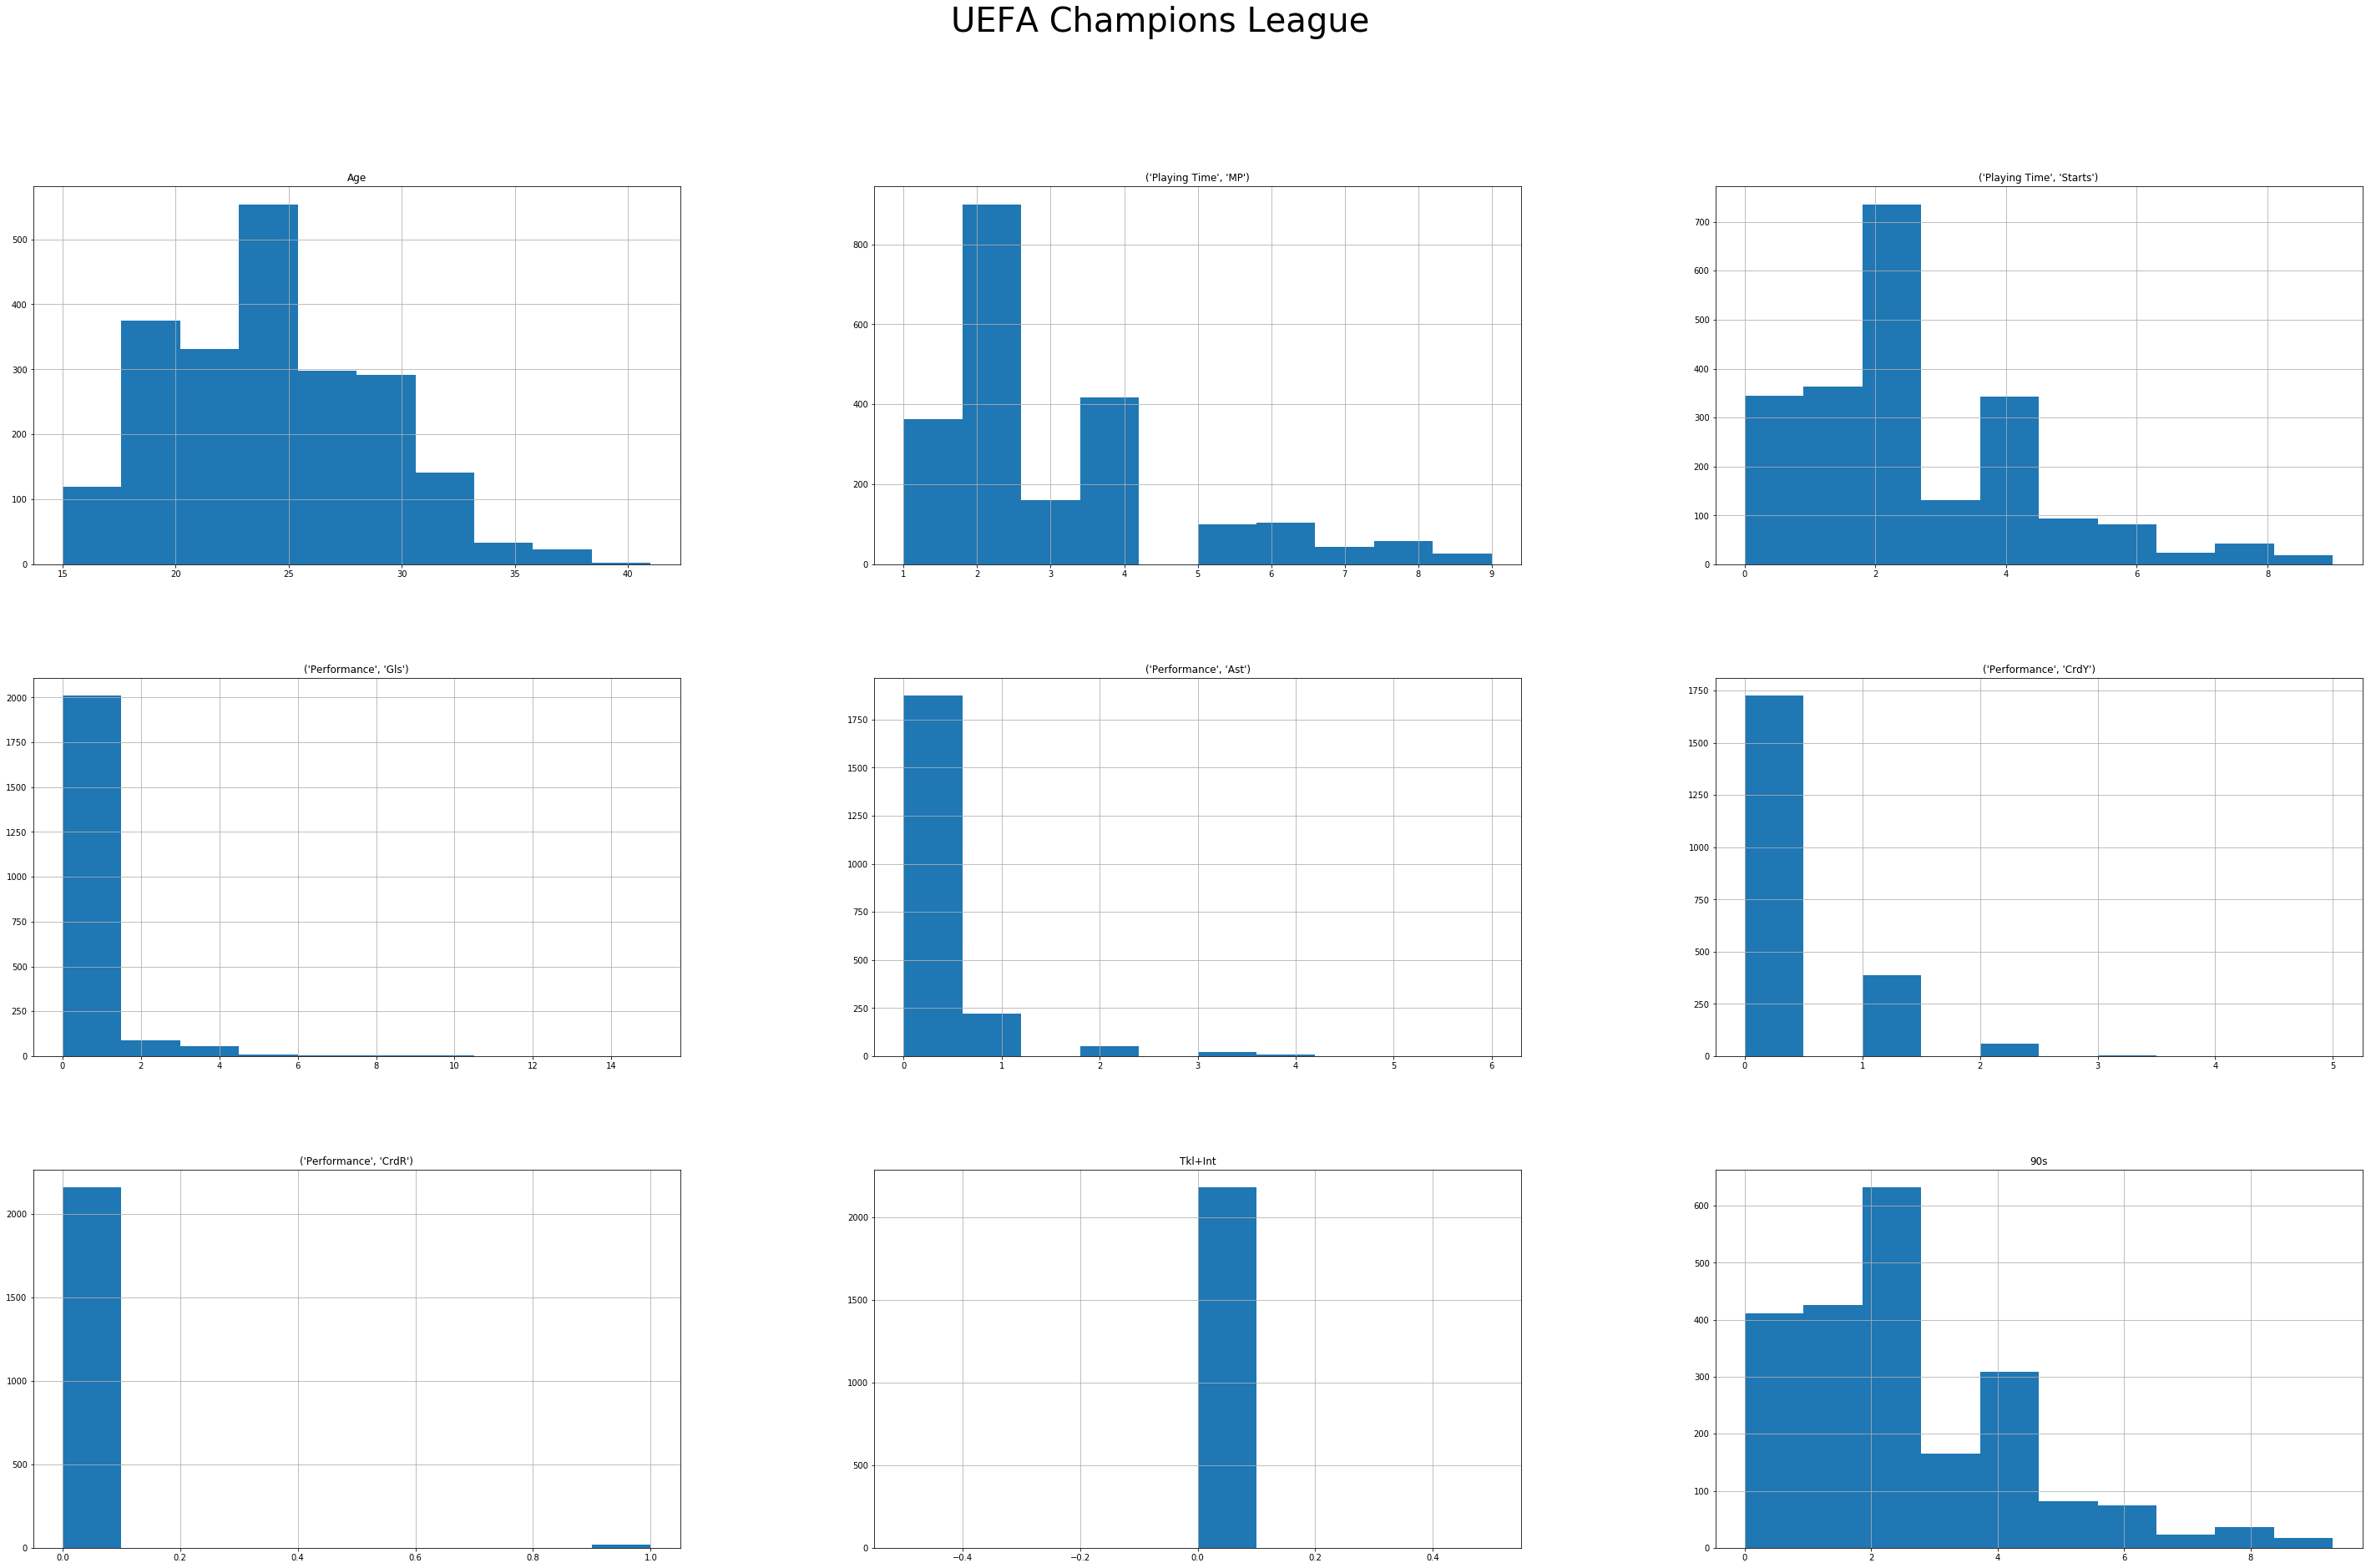

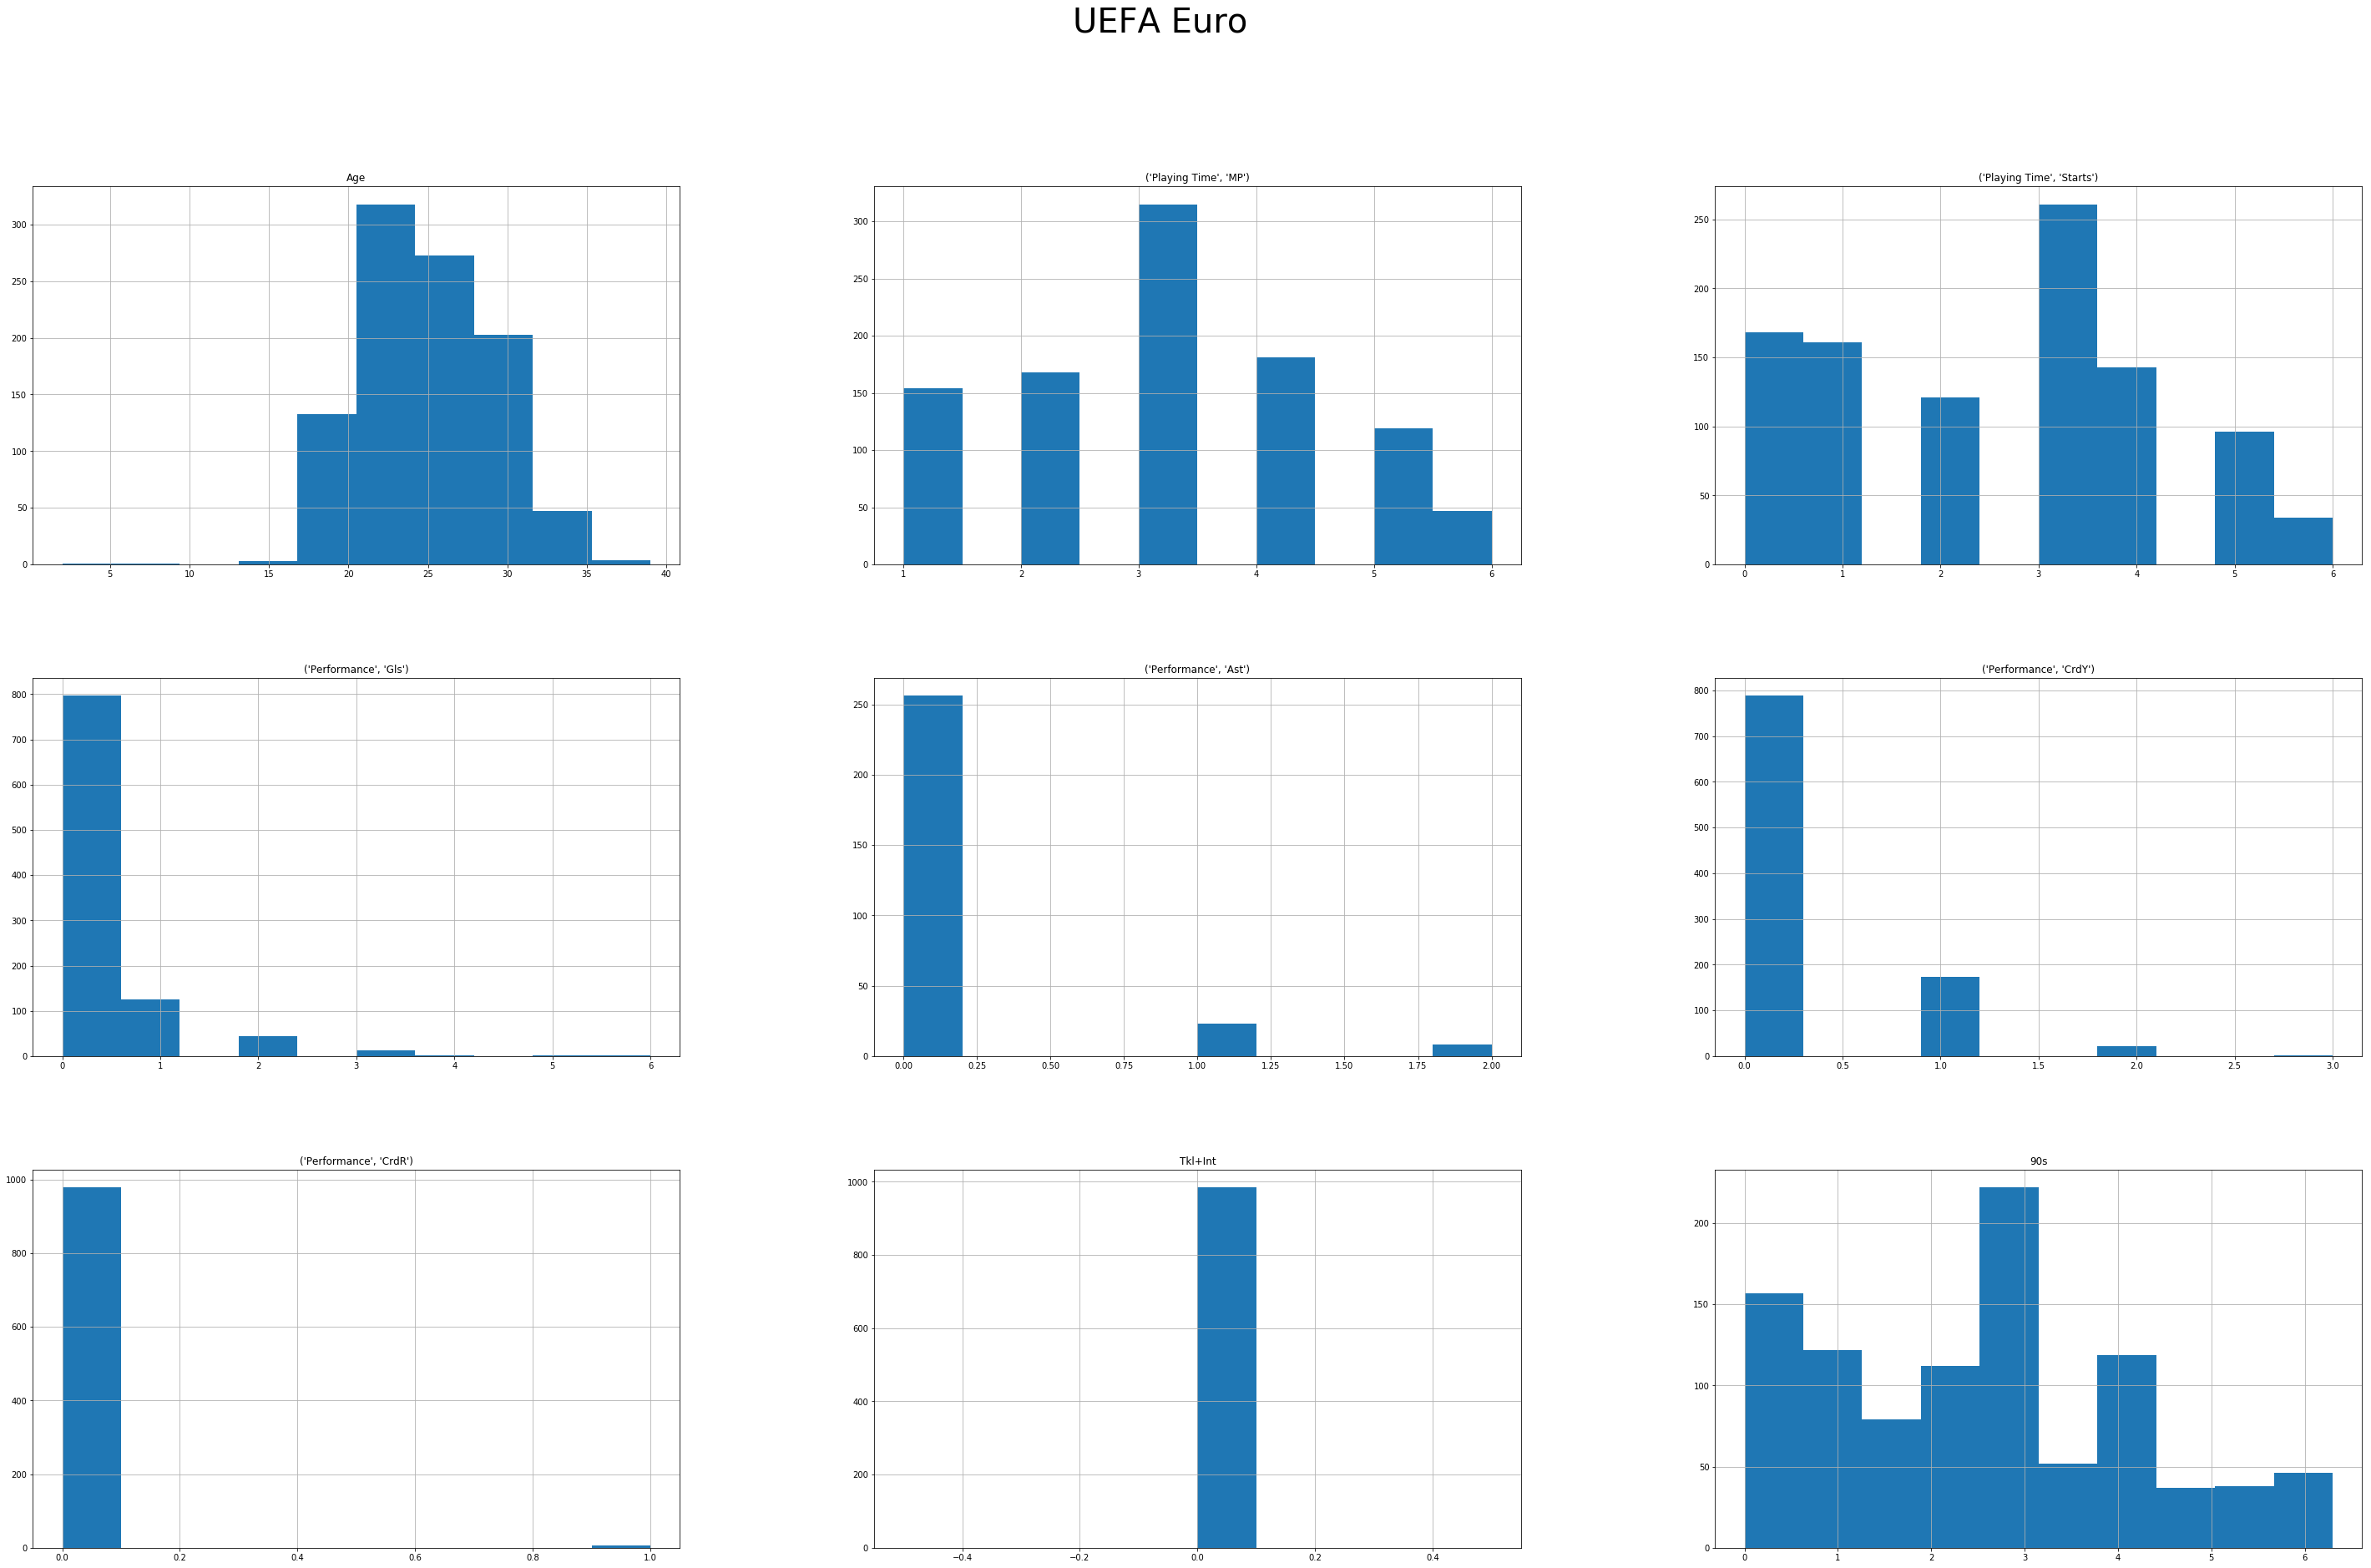

In [10]:
## Visualizes distribution for a list of attributes across a single categorical parameter (league, nation, position etc.)

def distrib(df, attributes, category):
    temp_list = attributes.copy()
    temp_list.append(category)
    a = df[temp_list].groupby(category)
    for name, group in a:
        group.hist(figsize=(50, 30))
        plt.suptitle(name, fontsize=40)
        
distrib(combined, top_attributes, 'League')
    

# CLUSTERING TRIAL

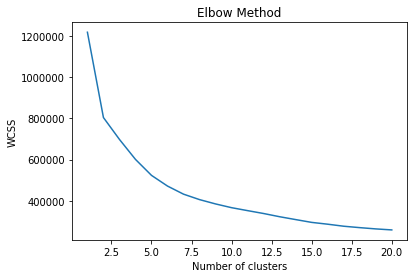

In [11]:
## ELBOW METHOD (TAKES 2 ish Minutes to run)
scaler = StandardScaler()
scaled_features = scaler.fit_transform(combined[top_attributes].fillna(0))

wcss = []

for i in range(1, 21):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(scaled_features)
    wcss.append(kmeans.inertia_)

plt.plot(range(1, 21), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [12]:
## Get Clustering Results
kmeans = KMeans(n_clusters = 7, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
kmeans.fit(scaled_features)
clusters = kmeans.labels_


(array([12727., 27774.,     0., 10270.,     0., 28438.,  2724.,     0.,
        33201., 20097.]),
 array([0. , 0.6, 1.2, 1.8, 2.4, 3. , 3.6, 4.2, 4.8, 5.4, 6. ]),
 <a list of 10 Patch objects>)

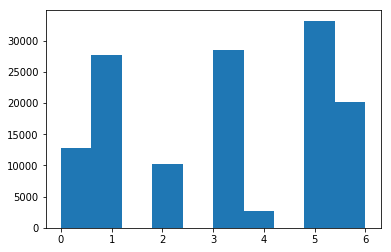

In [13]:
## Get Size of each cluster
combined['clusters'] = clusters
plt.hist(clusters)

In [14]:
## Get average for top attributes across each cluster
temp = top_attributes.copy()
temp.append('clusters')
combined[temp].groupby('clusters').agg('mean')

,Age,"('Playing Time', 'MP')","('Playing Time', 'Starts')","('Performance', 'Gls')","('Performance', 'Ast')","('Performance', 'CrdY')","('Performance', 'CrdR')",Tkl+Int,90s
clusters,,,,,,,,,
0,26.087740,25.487860,22.728923,1.724680,1.147897,5.196904,1.298264,0.304567,22.193768
1,28.774897,6.899798,4.333957,0.357326,0.220460,0.708568,0.049614,0.508503,4.504507
2,25.687555,31.331061,27.627325,9.246933,5.397473,3.813827,0.141313,1.128293,26.914460
3,25.104752,20.179935,14.911383,1.757117,1.118045,2.376144,0.007672,0.832484,15.020771
4,25.892070,27.122614,23.926579,1.866006,1.925110,4.694934,0.224670,70.819016,23.556902
5,20.712091,5.823951,2.810994,0.279891,0.166987,0.510956,0.030923,0.381059,3.129527
6,26.657807,31.204409,29.368562,1.551028,1.177075,4.795193,0.004230,0.044740,28.921516


In [18]:
from sklearn.metrics import pairwise_distances_argmin_min
closest, _ = pairwise_distances_argmin_min(kmeans.cluster_centers_, scaled_features)

In [19]:
closest

array([  6715, 125327,  15619, 131674,  66891,  28606,  18535],
      dtype=int64)

In [53]:
combined.iloc[closest][['Player', 'Pos', 'Squad']+top_attributes].reset_index().drop(['index'],axis=1)

,Player,Pos,Squad,Age,"('Playing Time', 'MP')","('Playing Time', 'Starts')","('Performance', 'Gls')","('Performance', 'Ast')","('Performance', 'CrdY')","('Performance', 'CrdR')",Tkl+Int,90s
0,Sven Kums,MF,Gent,26.0,26,24.0,1.0,1.0,5.0,1.0,0.0,22.2
1,Maxwell,DF,Barcelona,29.0,7,4.0,0.0,0.0,1.0,0.0,0.0,4.7
2,Mike Havenaar,FW,Vitesse,26.0,32,28.0,10.0,5.0,3.0,0.0,0.0,27.1
3,Lisa Evans,"DF,MF",Arsenal,25.0,18,15.0,2.0,1.0,2.0,0.0,0.0,14.7
4,Felipe,MF,Vancouver,27.0,29,24.0,1.0,2.0,4.0,0.0,72.0,24.5
5,Dmitri Vadimovich Golubev,DF,Samara,20.0,6,3.0,0.0,0.0,1.0,0.0,0.0,3.1
6,Mark Looms,DF,Heracles Almelo,26.0,30,29.0,1.0,1.0,5.0,0.0,0.0,28.2


In [41]:
rst = combined[['Player', 'Pos', 'Age', 'Gender'] + temp].copy()
rst.head()

,Player,Pos,Age,Gender,Age,"('Playing Time', 'MP')","('Playing Time', 'Starts')","('Performance', 'Gls')","('Performance', 'Ast')","('Performance', 'CrdY')","('Performance', 'CrdR')",Tkl+Int,90s,clusters
0,Idrus Abdulahi,DF,15.0,M,15.0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.1,5
1,Yarad Abetew,DF,20.0,M,20.0,1,1.0,0.0,0.0,0.0,0.0,0.0,0.5,5
2,Matt Acton,GK,27.0,M,27.0,5,5.0,0.0,0.0,0.0,0.0,0.0,5.0,1
3,Mohamed Adam,"FW,MF",18.0,M,18.0,19,5.0,1.0,1.0,2.0,0.0,0.0,6.7,5
4,Rahmat Akbari,MF,19.0,M,19.0,5,2.0,0.0,0.0,0.0,0.0,0.0,2.2,5


In [51]:
for cluster in sorted(list(rst['clusters'].unique())):
    print('cluster:', cluster)
    c_stats = rst[rst['clusters']==cluster]
    print(c_stats['Pos'].value_counts(normalize=True))
    #c_stats['Pos'].value_counts(normalize=True).plot.barh().figure.savefig('cluster{0}_EDA1.jpg'.format(cluster))
    print('---------')

cluster: 0
DF       0.413363
MF       0.251066
DF,MF    0.132838
FW       0.074633
FW,MF    0.055363
GK       0.039488
DF,FW    0.011846
MF,FW    0.011689
MF,DF    0.007819
DF,GK    0.001343
GK,MF    0.000237
FW,DF    0.000158
FW,GK    0.000158
Name: Pos, dtype: float64
---------
cluster: 1
DF       0.259565
MF       0.238225
FW       0.177355
GK       0.128043
FW,MF    0.080109
DF,MF    0.076558
MF,FW    0.018877
DF,FW    0.009638
MF,DF    0.009565
FW,DF    0.000797
GK,MF    0.000471
DF,GK    0.000471
FW,GK    0.000326
Name: Pos, dtype: float64
---------
cluster: 2
FW       0.383041
MF       0.257310
FW,MF    0.254386
MF,FW    0.039766
DF,MF    0.036452
DF       0.015010
DF,FW    0.010721
MF,DF    0.002339
GK,MF    0.000487
FW,DF    0.000390
GK       0.000097
Name: Pos, dtype: float64
---------
cluster: 3
MF       0.256989
DF       0.246386
FW       0.169088
FW,MF    0.120136
DF,MF    0.099813
GK       0.053971
MF,FW    0.030502
DF,FW    0.011911
MF,DF    0.009684
GK,MF    0.000495
DF

In [ ]:
rst['Pos'].plot.hist()